# 2022-1 제 1회 인사이콘 : HR Analytics - How to reduce Employee Turnover?

## Dataset
1. **WA_Fn-UseC_-HR-Employee-Attrition.csv**
- HR 데이터가 담겨있는 데이터셋입니다. **해당 파일의 데이터를 이용해서 EDA 및 Feature Engineering을 진행합니다.**
2. **WA_Fn-UseC_-HR-Employee-Attrition.xlsx**
- sheet 1: HR 데이터의 가독성을 위해 정리된 시트입니다. csv 파일과 동일한 내용입니다.
- sheet 2(Variable Dictionary): 각 변수들에 대한 설명이 담겨있습니다.

## General Guideline:

주어진 HR 데이터를 통해 **종업원 퇴사의 주된 원인을 탐색 및 시각화하여, 경영진에게 인사이트 및 문제에 대한 해결방안을 도출하는** case 입니다.

권장하는 진행 순서는 다음과 같습니다.

1. **EDA + Feature Engineering**
- 데이터에 대한 EDA 및 Feature Engineering을 진행하여 활용할 Feature들을 확정합니다. 
2. **Interpretation**
- Employee Turnover에 영향을 미치는 변인과 그 관계를 탐색 및 해석합니다.
3. **Insight**
- 분석 결과를 바탕으로 인사이트를 도출하여, 경영진에게 Employee Turnover 제고 전략을 제시합니다.
4. **presentation**
- 주피터 노트북 or 노션 페이지로 자료를 정리 및 발표합니다.

# 라이브러리 및 파일 불러오기

## Library 호출 & Load Data

In [1]:
# 필요한 라이브러리 불러오기
# 데이터 핸들링을 위한 라이브러리
import numpy as np
import pandas as pd

# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')  # matplotlib style 설정

# 문법 변경에 의한 경고를 무시
import warnings

warnings.filterwarnings('ignore')

# matplotlib 시각화 결과를 jupyter notebook에서 바로 볼 수 있게 해주는 command
%matplotlib inline

In [2]:
data = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        2  ...                        1             80   
1                        3  ...                        4             80   
2                        4  ...                        2             80   
3                        4  ...                        3             80   
4                        1  ...                        4             80   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 33 columns]

## 데이터 정제

In [3]:
# TotalWorkingYears 변수에서 YearsAtCompany를 빼 BeforeWorkingYears 변수 생성
data.loc[:,'BeforeWorkingYears']=data.TotalWorkingYears-data.YearsAtCompany
data.drop(['TotalWorkingYears'], axis=1, inplace=True)
data.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        2  ...                        1             80   
1                        3  ...                        4             80   
2                        4  ...                        2             80   
3                        4  ...                        3             80   
4                        1  ...                        4             80   

   StockOptionLevel  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 0                      0               1               6   
1                 1                      3               3              10   
2                 0                      3               3               0   
3                 0                      3               3               8   
4                 1                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                  4                        0                     5   
1                  7                        1                     7   
2                  0                        0                     0   
3                  7                        3                     0   
4                  2                        2                     2   

   BeforeWorkingYears  
0                   2  
1                   0  
2                   7  
3                   0  
4                   4  

[5 rows x 33 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [5]:
# Attrition 1=1, NO=0
data.loc[data.Attrition=='Yes','Attrition']=1
data.loc[data.Attrition=='No','Attrition']=0
data['Attrition']=data['Attrition'].astype('float')

In [6]:
data.head(5)

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41        1.0      Travel_Rarely       1102                   Sales   
1   49        0.0  Travel_Frequently        279  Research & Development   
2   37        1.0      Travel_Rarely       1373  Research & Development   
3   33        0.0  Travel_Frequently       1392  Research & Development   
4   27        0.0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        2  ...                        1             80   
1                        3  ...                        4             80   
2                        4  ...                        2             80   
3                        4  ...                        3             80   
4                        1  ...                        4             80   

   StockOptionLevel  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 0                      0               1               6   
1                 1                      3               3              10   
2                 0                      3               3               0   
3                 0                      3               3               8   
4                 1                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                  4                        0                     5   
1                  7                        1                     7   
2                  0                        0                     0   
3                  7                        3                     0   
4                  2                        2                     2   

   BeforeWorkingYears  
0                   2  
1                   0  
2                   7  
3                   0  
4                   4  

[5 rows x 33 columns]

In [7]:
data.describe()

Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TrainingTimesLastYear  WorkLifeBalance  \
count       1470.000000            1470.000000      1470.000000   
mean           0.793878               2.799320         2.761224   
std            0.852077               1.289271         0.706476   
min            0.000000               0.000000         1.000000   
25%            0.000000               2.000000         2.000000   
50%            1.000000               3.000000         3.000000   
75%            1.000000               3.000000         3.000000   
max            3.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.000000   
mean         7.008163            4.229252                 2.187755   
std          6.126525            3.623137                 3.222430   
min          0.000000            0.000000                 0.000000   
25%          3.000000            2.000000                 0.000000   
50%          5.000000            3.000000                 1.000000   
75%          9.000000            7.000000                 3.000000   
max         40.000000           18.000000                15.000000   

       YearsWithCurrManager  BeforeWorkingYears  
count           1470.000000         1470.000000  
mean               4.123129            4.271429  
std                3.568136            6.179783  
min                0.000000            0.000000  
25%                2.000000            0.000000  
50%                3.000000            2.000000  
75%                7.000000            5.000000  
max               17.000000           33.000000  

[8 rows x 26 columns]

In [8]:
#결측값 및 이상치 확인
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
BeforeWorkingYears          0
dtype: int

# EDA

- 퇴사의 원인을 알아보는 EDA, 목표는 경영진에게 퇴사의 원인에 대한 INSIGHT를 제공하고 
- 해결방안을 제시해야 한다.
- 1. 자발적 이직을 막는 것
> 통제할 수 있는 변인으로 해결 할 수 있다.

- 2. turnover 할 수 있는 사람을 뽑지 않는 것 
> 사람을 뽑기 전에 알 수 있는 데이터(교육수준)로 알 수 있을 거 같다. 

- columns 을 분류할 수 있을 거 같다. 경영진이 control 가능한 변수, 경영진이 control 할 수 없는 변수. 
- control 할 수 있는것
> 퇴사 여부, 출장 빈도, 일급, 부서, 직무수준, 직무역할 

- control 할 수 없는것
> 교육 수준, 교육 분야

- 업무 환경 만족도, 직무 만족도,  > 너무 당연함 

- 3. 핵심인재와 다른 그룹과의 비교.
> 핵심인재의 자발적 이직 관리가 회사의 경영진 그룹에서 가장 중요함. 핵심적 인재의 특징 > 다른 그룹과 비교
> 핵심인재를 어떻게 정의 할 수 있을까?
> 1. 임금상승률이 높은 사람들로 간접적으로 알 수 있을것이라 생각 

In [9]:
# 그래프 서식 설정
parameters = {
    'axes.titlesize': 25,
    'axes.labelsize': 20,
    'ytick.labelsize': 20
}
plt.rcParams.update(parameters)

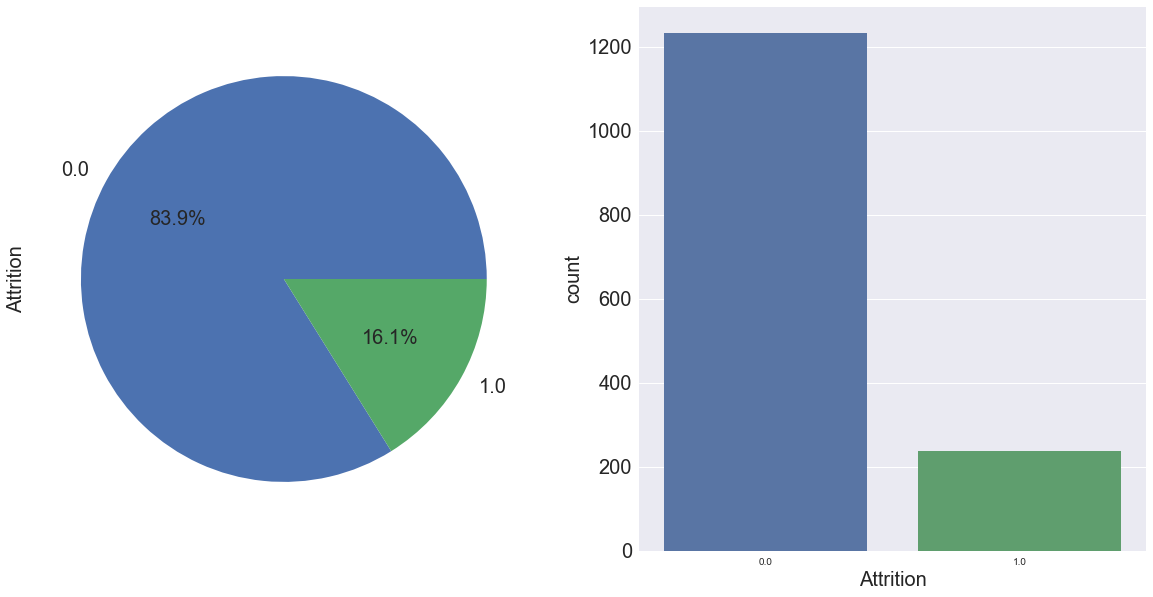

In [10]:

f, ax= plt.subplots(1,2,figsize=(20,10))

data['Attrition'].value_counts().plot.pie(autopct='%1.1f%%',
                                         ax=ax[0],
                                         fontsize=20)

sns.countplot("Attrition", data=data, ax=ax[1])
plt.show()



회사원 중 퇴사자 비율은 16.1%로 237명<br> 재직 비율은 83.9%로 1233명이다.

## Age

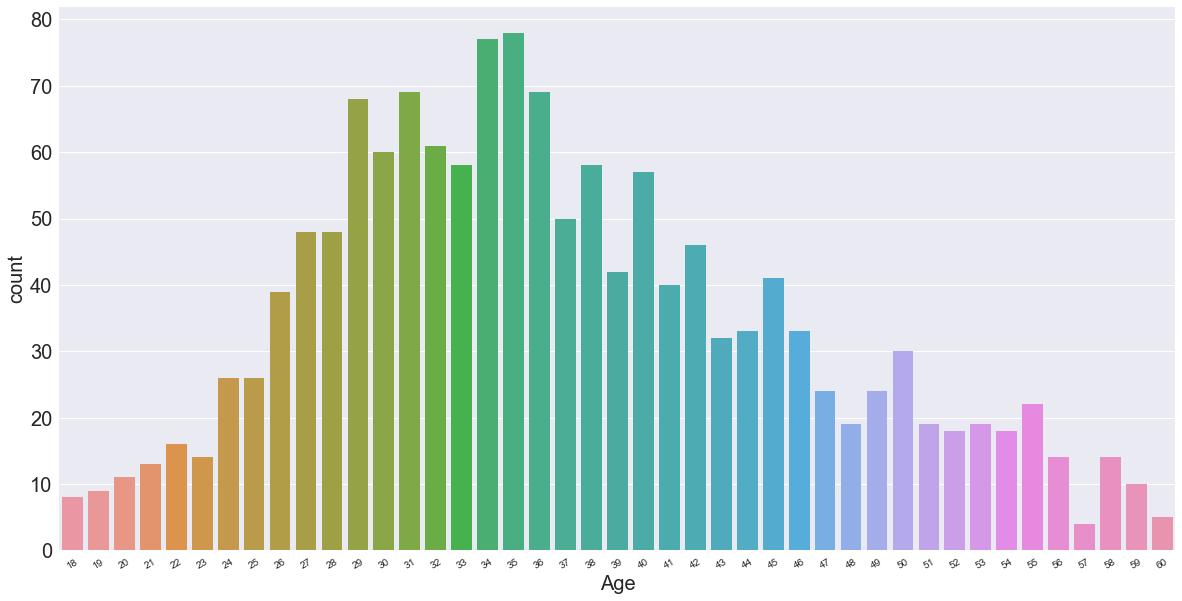

In [11]:
# age 분포 확인
plt.figure(figsize=(20,10))
sns.countplot(data=data,x='Age')
plt.xticks(rotation=30)
plt.show()

In [14]:
# age_band 만들기
data['Age_band'] = 0
data.loc[data['Age'] <= 25, 'Age_band'] = 0
data.loc[(data['Age'] > 25) & (data['Age'] <= 33), 'Age_band'] = 1
data.loc[(data['Age'] > 33) & (data['Age'] <= 41), 'Age_band'] = 2
data.loc[(data['Age'] > 41) & (data['Age'] <= 49), 'Age_band'] = 3
data.loc[data['Age'] > 49, 'Age_band'] = 4
data.head(5)

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41        1.0      Travel_Rarely       1102                   Sales   
1   49        0.0  Travel_Frequently        279  Research & Development   
2   37        1.0      Travel_Rarely       1373  Research & Development   
3   33        0.0  Travel_Frequently       1392  Research & Development   
4   27        0.0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... StandardHours  StockOptionLevel  \
0                        2  ...            80                 0   
1                        3  ...            80                 1   
2                        4  ...            80                 0   
3                        4  ...            80                 0   
4                        1  ...            80                 1   

   TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                      0                1              6                   4   
1                      3                3             10                   7   
2                      3                3              0                   0   
3                      3                3              8                   7   
4                      3                3              2                   2   

  YearsSinceLastPromotion  YearsWithCurrManager  BeforeWorkingYears  Age_band  
0                       0                     5                   2         2  
1                       1                     7                   0         3  
2                       0                     0                   7         2  
3                       3                     0                   0         1  
4                       2                     2                   4         1  

[5 rows x 34 columns]

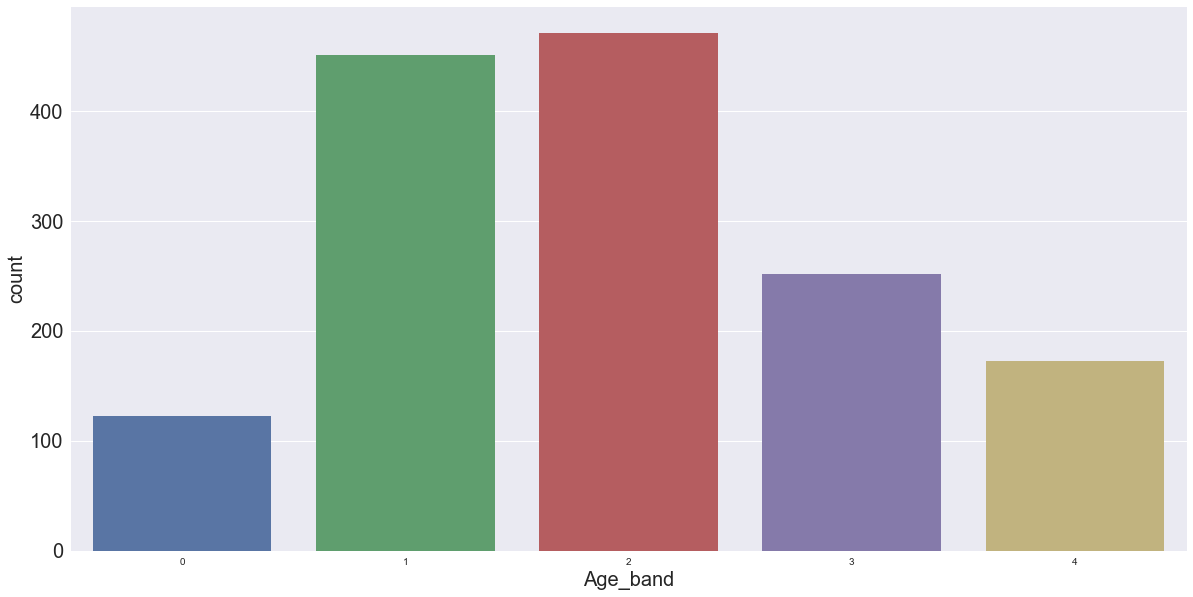

In [15]:
# band별 분포 확인
plt.figure(figsize=(20,10))
sns.countplot(data=data,x='Age_band')
plt.show()

<AxesSubplot:xlabel='Age_band', ylabel='count'>

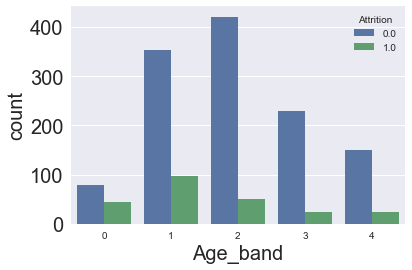

In [16]:
# age_band별 퇴사 인원
sns.countplot('Age_band', hue='Attrition', data=data)

In [17]:
pd.crosstab(data.Attrition,
            data.Age_band, margins=True).style.background_gradient(
                cmap='summer_r')

- age band 1의 퇴사자 수가 많다

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

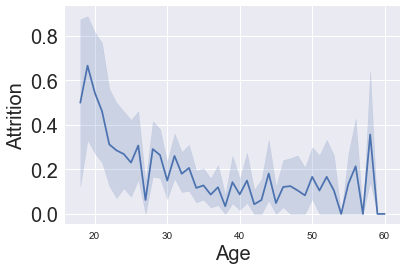

In [18]:
sns.lineplot('Age', 'Attrition', data=data)

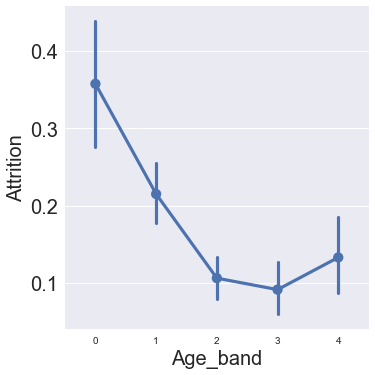

In [19]:
sns.factorplot(x='Age_band', y='Attrition',  data=data)
plt.show()

In [20]:
print('Age_band 0의 퇴사율: ', data[data.Age_band==0].Attrition.mean())
print('Age_band 1의 퇴사율: ', data[data.Age_band==1].Attrition.mean())
print('Age_band 2의 퇴사율: ', data[data.Age_band==2].Attrition.mean())
print('Age_band 3의 퇴사율: ', data[data.Age_band==3].Attrition.mean())
print('Age_band 4의 퇴사율: ', data[data.Age_band==4].Attrition.mean())

Age_band 0의 퇴사율:  0.35772357723577236
Age_band 1의 퇴사율:  0.21507760532150777
Age_band 2의 퇴사율:  0.10615711252653928
Age_band 3의 퇴사율:  0.09126984126984126
Age_band 4의 퇴사율:  0.1329479768786127


- age band 0과 1의 퇴사율이 높다

- age band 1과 2, 즉 <b>26세 ~ 41세</b>가 가장 많은 수를 차지한다.
- 그 중 퇴사자가 가장 많은 구간은 <b>age_band 1(26세~33세)</b>이다.
- 인원 대비 퇴사율이 높은 구간은 <b>age_band 0(18세~25세)와 1(26세-33세)</b>이다.
- <b>age_band 1(26세~33세)</b>는 퇴사자 수도 많고 퇴사율도 높다 -> 집중관리 대상

### Age + 다른 피쳐

<AxesSubplot:xlabel='Education', ylabel='Age'>

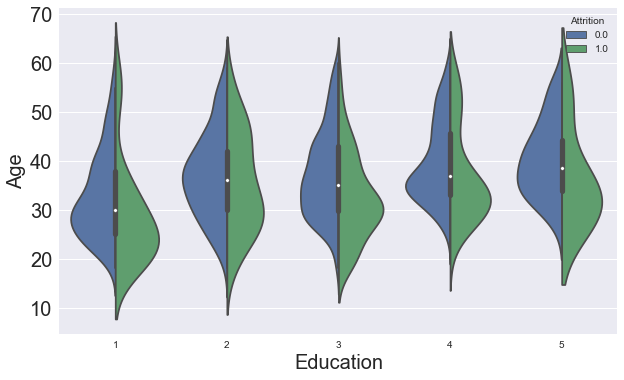

In [21]:
# Education
plt.figure(figsize=(10,6))
sns.violinplot('Education', 'Age', hue='Attrition', data=data, split=True)

- education에 관계 없이 나이가 많을수록 퇴사를 많이 함

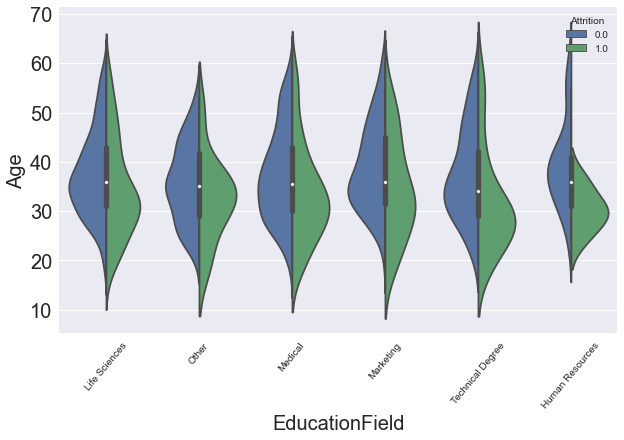

In [22]:
# Education Field
plt.figure(figsize=(10,6))
sns.violinplot('EducationField', 'Age', hue='Attrition', data=data, split=True)
plt.xticks(rotation=50)
plt.show()

- 마찬가지로 age가 낮을수록 퇴사 많음! 
- 그리고 medical, Technical, medical이 특히 그럼

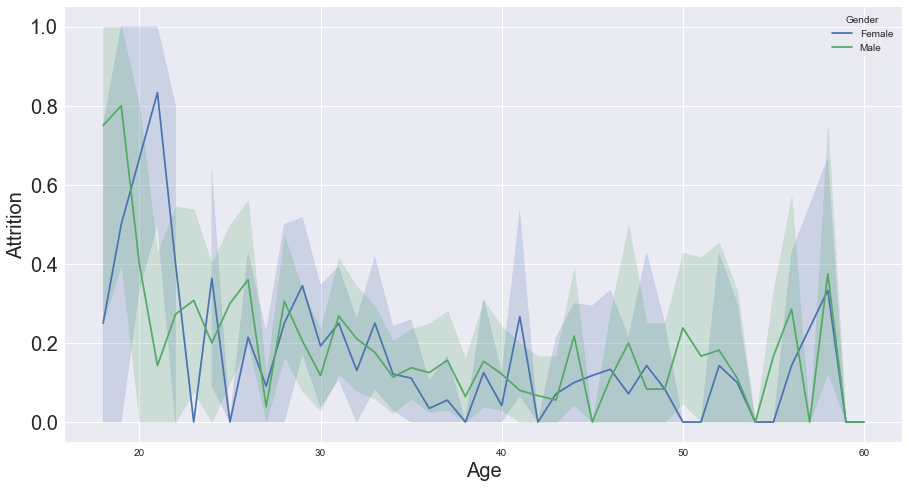

In [23]:
# Gender
plt.figure(figsize=(15,8))
sns.lineplot('Age', 'Attrition', hue='Gender', data=data)
plt.show()

- 역시 나이가 어릴수록 퇴사율↑ 외에는 큰 의미 없어보임

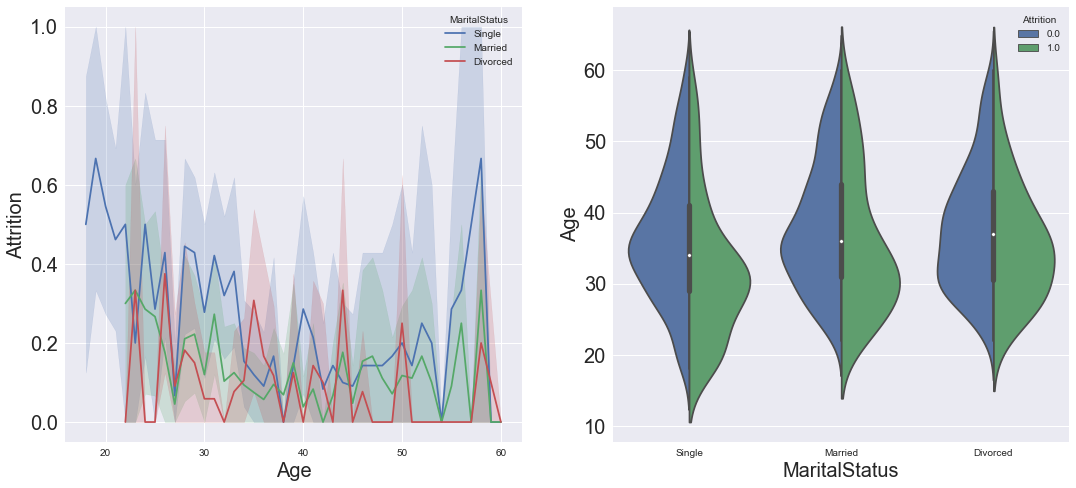

In [24]:
# Marital Status
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.lineplot('Age', 'Attrition', hue='MaritalStatus', data=data, ax=ax[0])
sns.violinplot('MaritalStatus', 'Age', hue='Attrition', data=data, split=True, ax=ax[1])
plt.show()

<AxesSubplot:xlabel='Age_band', ylabel='count'>

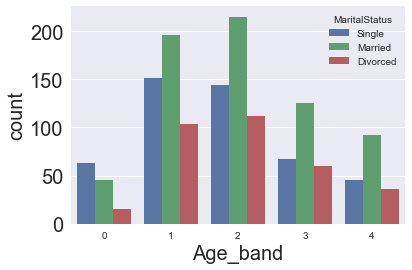

In [25]:
sns.countplot('Age_band', hue='MaritalStatus', data=data)

- 특히 single & 어린 사람들이 퇴사율이 높음

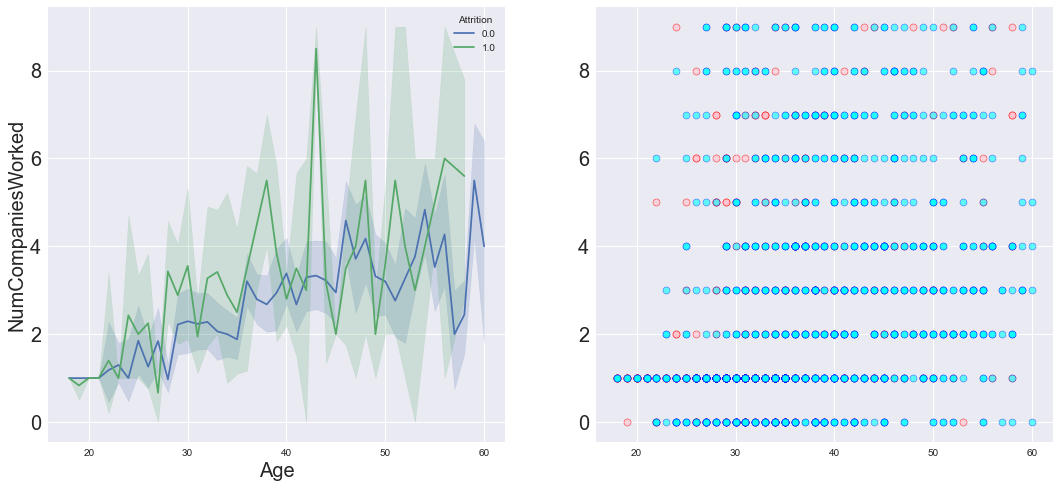

In [26]:
# NumCompaniesWorked
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.lineplot('Age', 'NumCompaniesWorked', hue='Attrition', data=data, ax=ax[0])
plt.scatter(data.loc[data.Attrition==1,'Age'], data.loc[data.Attrition==1,'NumCompaniesWorked'], c = 'pink', alpha = 0.6, 
            linewidths = 0.7, edgecolors = 'red', label = '퇴사')
plt.scatter(data.loc[data.Attrition==0,'Age'], data.loc[data.Attrition==0,'NumCompaniesWorked'], c = 'cyan', alpha = 0.6, 
            linewidths = 0.5, edgecolors = 'blue', label = '재직')
plt.show()

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Age'>

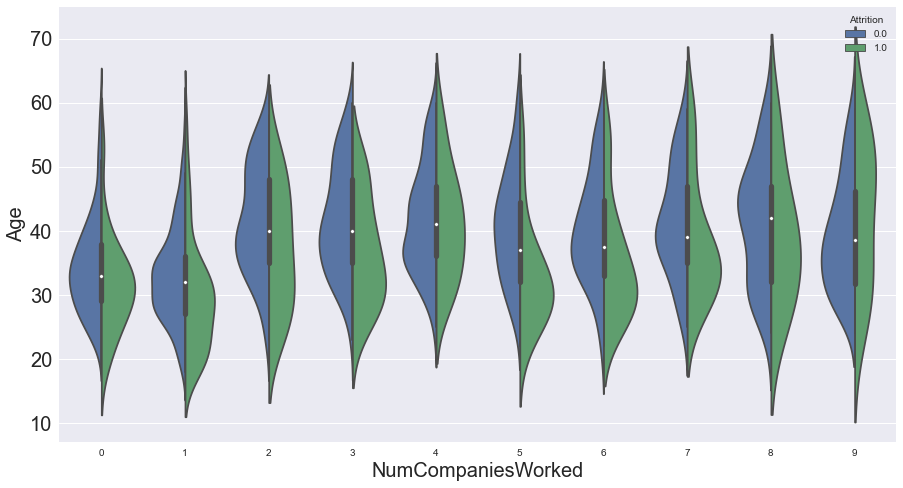

In [27]:
plt.figure(figsize=(15,8))
sns.violinplot('NumCompaniesWorked', 'Age', hue='Attrition', data=data, split=True)

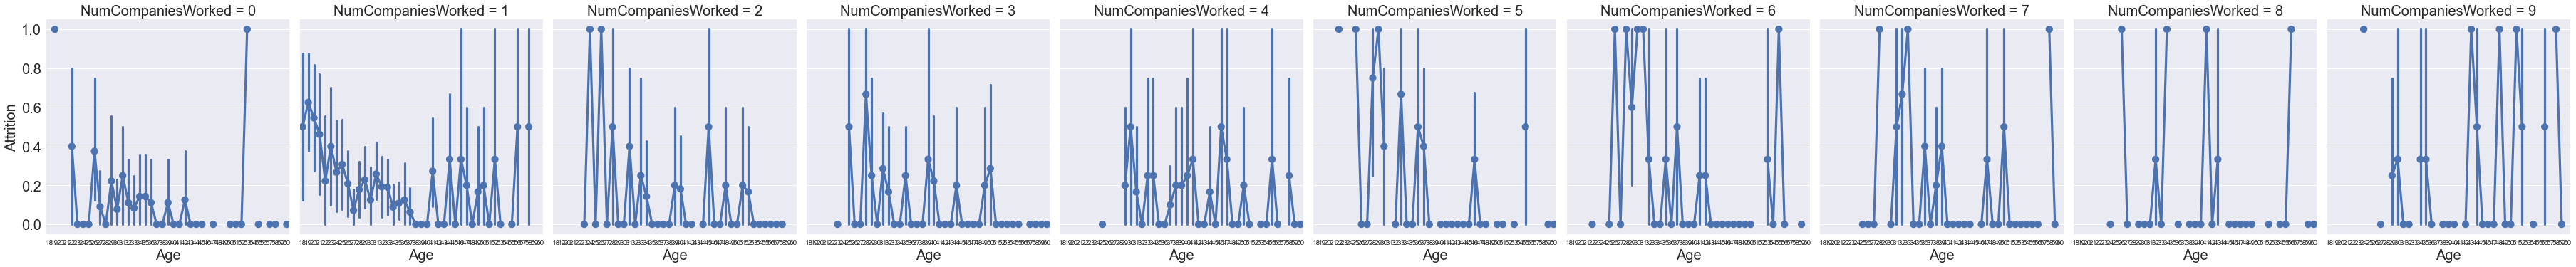

In [28]:
sns.factorplot('Age', 'Attrition', col='NumCompaniesWorked', data=data)

- 많은 회사를 다녀본 사람들이 퇴사를 많이 함
- 여기에 age는 큰 의미 없는 듯

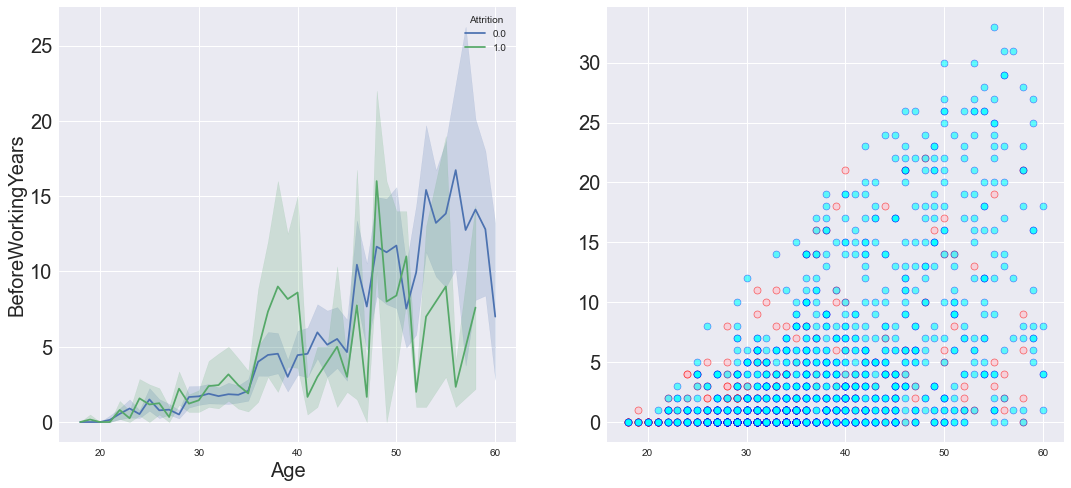

In [29]:
# BeforeWorkingYears
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.lineplot('Age', 'BeforeWorkingYears', hue='Attrition', data=data, ax=ax[0])
plt.scatter(data.loc[data.Attrition==1,'Age'], data.loc[data.Attrition==1,'BeforeWorkingYears'], c = 'pink', alpha = 0.6, 
            linewidths = 0.7, edgecolors = 'red', label = '퇴사')
plt.scatter(data.loc[data.Attrition==0,'Age'], data.loc[data.Attrition==0,'BeforeWorkingYears'], c = 'cyan', alpha = 0.6, 
            linewidths = 0.5, edgecolors = 'blue', label = '재직')

Text(0, 0.5, 'BeforeWorkingYears')

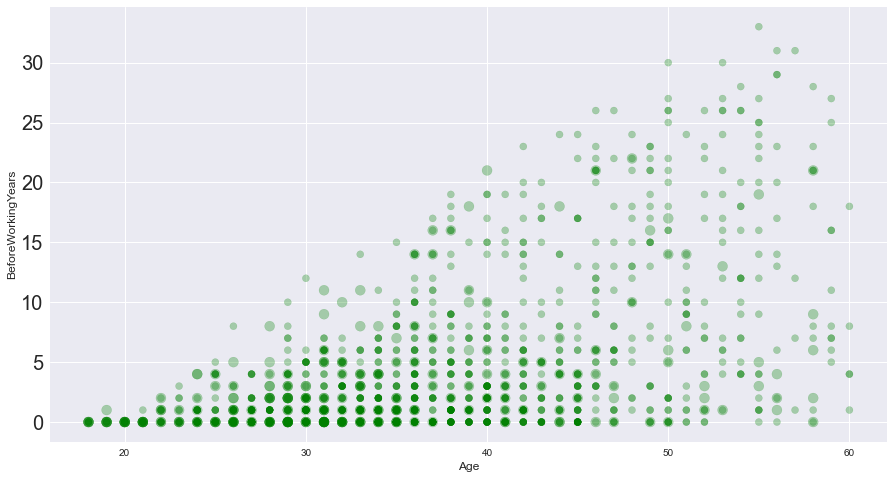

In [30]:
plt.figure(figsize=(15,8))
plt.scatter(data['Age'], # x축
            data['BeforeWorkingYears'], # y축
            s = (data['Attrition']+1)*50, # 사이즈
            c = 'green', # 색깔(고정)
            alpha = 0.3) # 투명도
plt.xlabel('Age', size = 12)
plt.ylabel('BeforeWorkingYears', size = 12)

## Education

1: 'Below College'   2: 'College'   3: 'Bachelor'   4: 'Master'   5: 'Doctor'

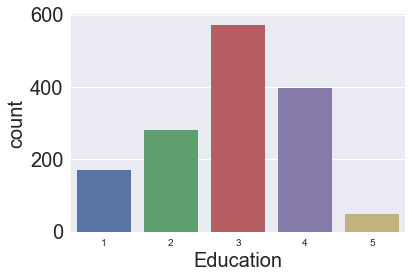

In [31]:
# 분포 확인
sns.countplot(data=data, x='Education')
plt.show()

- 학/석사 인원이 많음

<AxesSubplot:xlabel='Education', ylabel='count'>

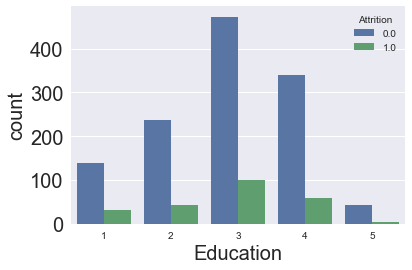

In [32]:
# 교육수준 별 퇴사 여부
sns.countplot('Education', hue='Attrition', data=data)

In [33]:
pd.crosstab(data.Attrition,
            data.Education, margins=True).style.background_gradient(
                cmap='summer_r')

- 교육수준이 학사인 사람들이 많이 퇴사했다.

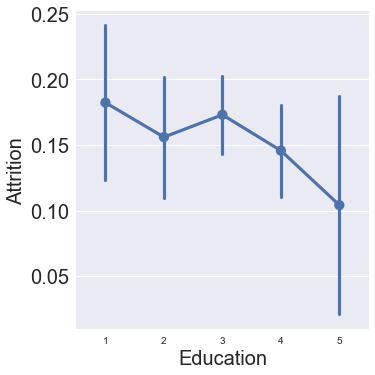

In [34]:
sns.factorplot(x='Education', y='Attrition',  data=data)
plt.show()

In [35]:
print('Below College의 퇴사율: ', data[data.Education==1].Attrition.mean())
print('College의 퇴사율: ', data[data.Education==2].Attrition.mean())
print('Bachelor의 퇴사율: ', data[data.Education==3].Attrition.mean())
print('Master의 퇴사율: ', data[data.Education==4].Attrition.mean())
print('Doctor의 퇴사율: ', data[data.Education==5].Attrition.mean())

Below College의 퇴사율:  0.18235294117647058
College의 퇴사율:  0.15602836879432624
Bachelor의 퇴사율:  0.17307692307692307
Master의 퇴사율:  0.1457286432160804
Doctor의 퇴사율:  0.10416666666666667


- 대학생 이하, 학사의 교육수준을 가진 사람들의 퇴사율이 높다
- 그러나 비율차이가 크지 않음

### Education + 다른 피쳐

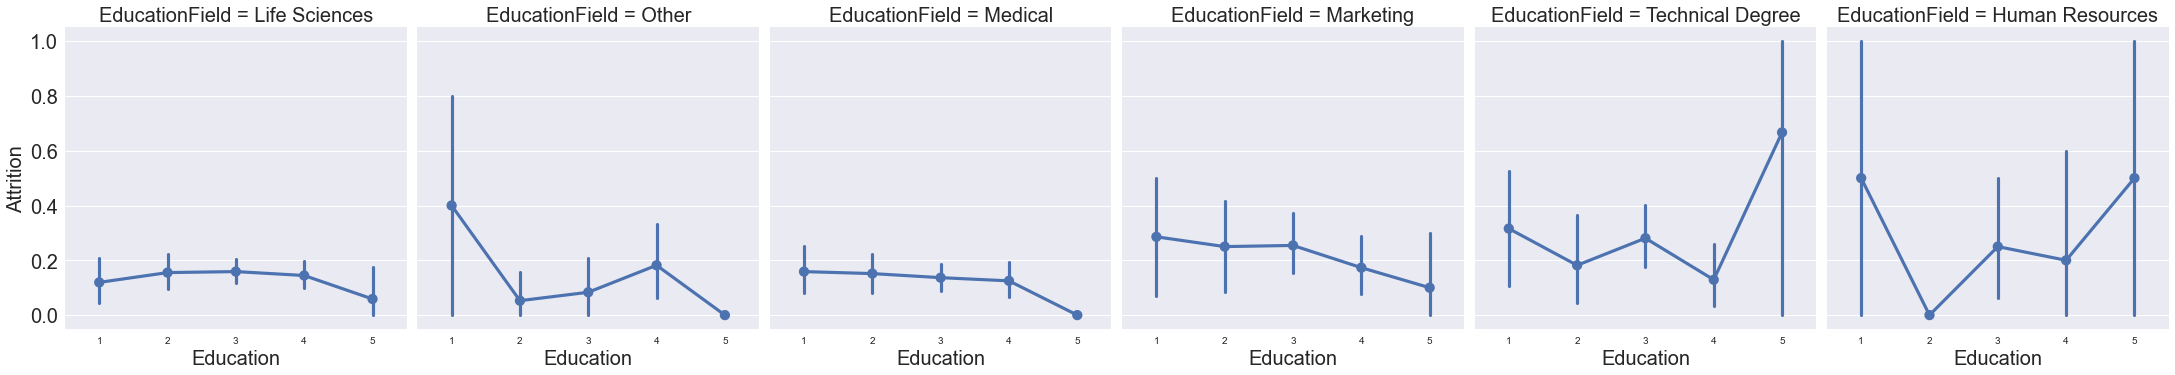

In [36]:
# Education Field
sns.factorplot('Education', 'Attrition', col='EducationField', data=data)

- Technical과 HR은 박사학위인 사람들의 퇴사율이 높다
- 그 이외에는 큰 관련성 없어보임

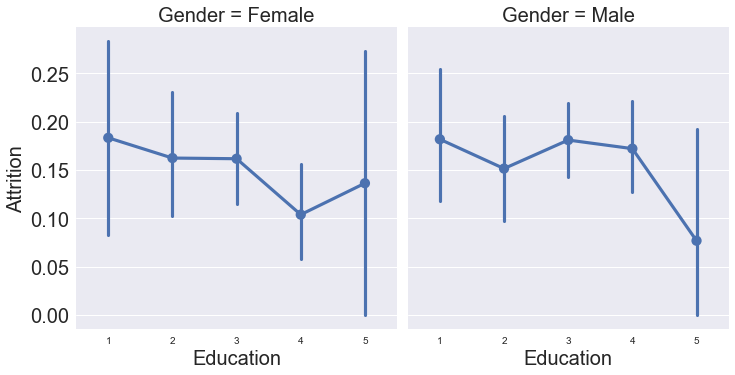

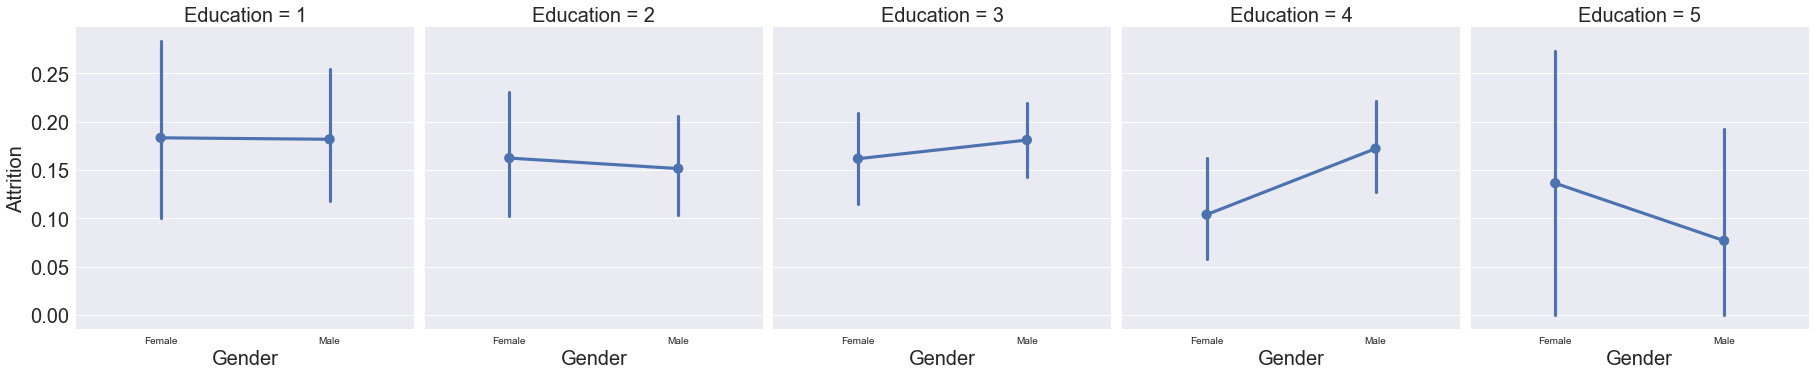

In [37]:
# Gender
sns.factorplot('Education', 'Attrition', col='Gender', data=data)
sns.factorplot('Gender', 'Attrition', col='Education', data=data)

- 남녀 상관 없이 저학력자들이 퇴사율 높음
- 석사학위는 남성이, 박사학위는 여성이 퇴사율이 더 높음

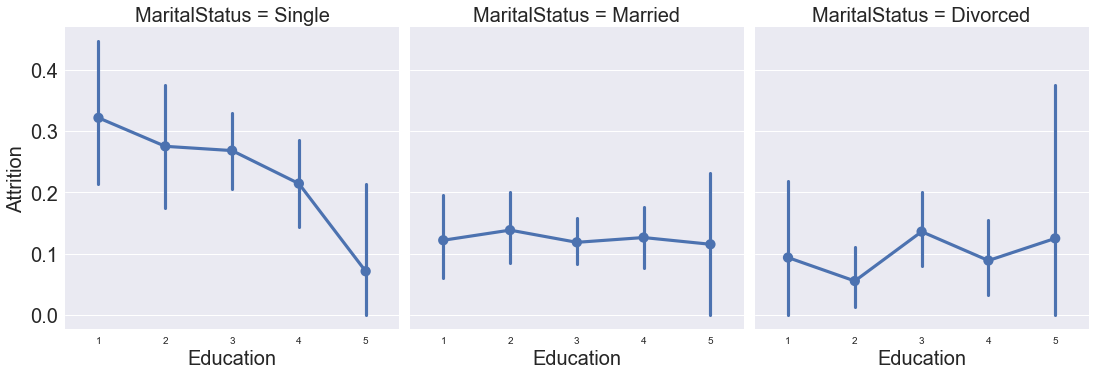

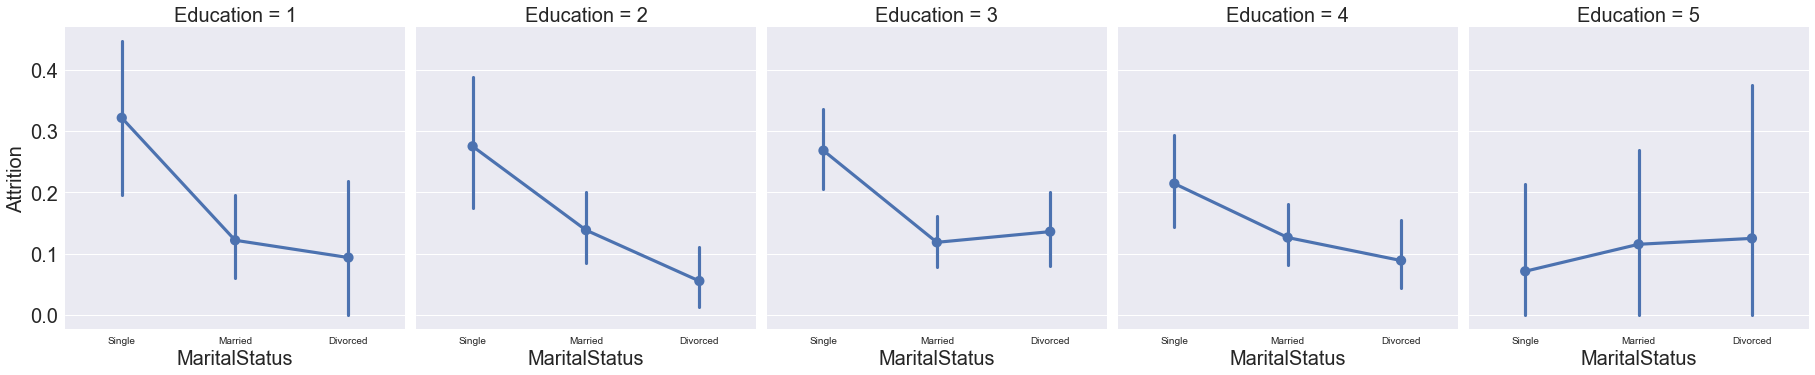

In [38]:
# MaritalStatus
sns.factorplot('Education', 'Attrition', col='MaritalStatus', data=data)
sns.factorplot('MaritalStatus', 'Attrition', col='Education', data=data)

- 대부분의 학력에서 single이 퇴사율 높음
- 특히 저학력 & single이 상대적으로 퇴사율 매우 높음
- married와 Divorced는 상대적으로 안정적 => 이것은 이들이 연령대가 높은 것과 관련 있는 것일듯

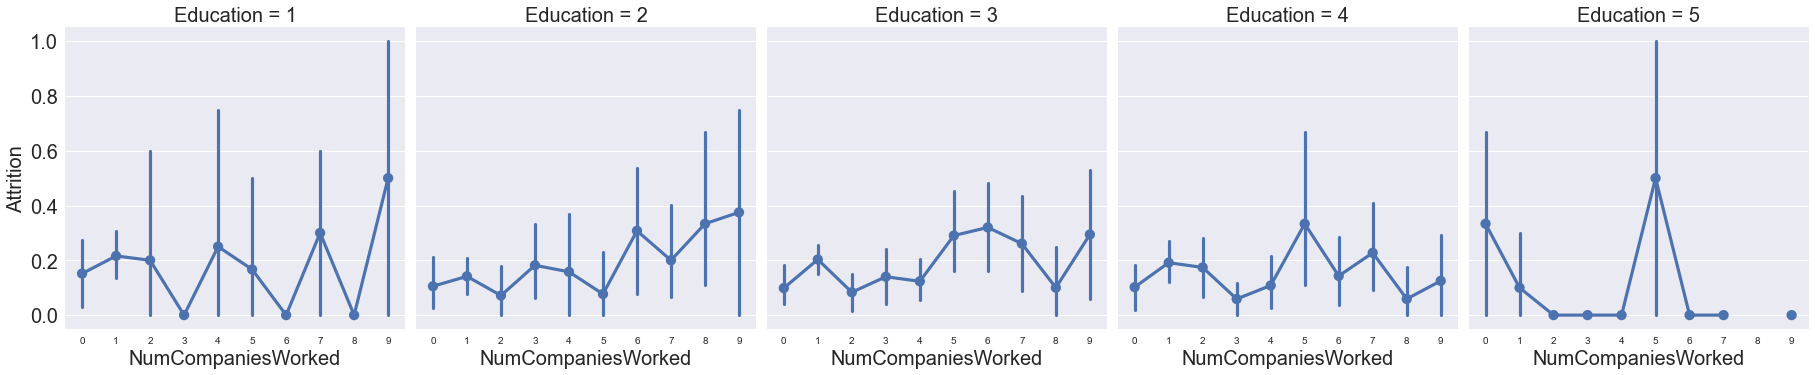

In [39]:
# NumCompaniesWorked
sns.factorplot('NumCompaniesWorked', 'Attrition', col='Education', data=data)

- 대학 이하의 학력 & 다녔던 회사 수↑인 사람들의 퇴사율이 높음

In [40]:
# BeforeWorkingYears_band 만들기
data['BeforeWorkingYears_band'] = 0
data.loc[data['BeforeWorkingYears'] <= 5, 'BeforeWorkingYears_band'] = 0
data.loc[(data['BeforeWorkingYears'] > 5) & (data['BeforeWorkingYears'] <= 10), 'BeforeWorkingYears_band'] = 1
data.loc[(data['BeforeWorkingYears'] > 10) & (data['BeforeWorkingYears'] <= 15), 'BeforeWorkingYears_band'] = 2
data.loc[(data['BeforeWorkingYears'] > 15) & (data['BeforeWorkingYears'] <= 20), 'BeforeWorkingYears_band'] = 3
data.loc[(data['BeforeWorkingYears'] > 20) & (data['BeforeWorkingYears'] <= 25), 'BeforeWorkingYears_band'] = 4
data.loc[data['BeforeWorkingYears'] > 25, 'BeforeWorkingYears_band'] = 5
data.head(5)

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41        1.0      Travel_Rarely       1102                   Sales   
1   49        0.0  Travel_Frequently        279  Research & Development   
2   37        1.0      Travel_Rarely       1373  Research & Development   
3   33        0.0  Travel_Frequently       1392  Research & Development   
4   27        0.0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... StockOptionLevel  TrainingTimesLastYear  \
0                        2  ...                0                      0   
1                        3  ...                1                      3   
2                        4  ...                0                      3   
3                        4  ...                0                      3   
4                        1  ...                1                      3   

   WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                1               6                  4   
1                3              10                  7   
2                3               0                  0   
3                3               8                  7   
4                3               2                  2   

   YearsSinceLastPromotion YearsWithCurrManager  BeforeWorkingYears  Age_band  \
0                        0                    5                   2         2   
1                        1                    7                   0         3   
2                        0                    0                   7         2   
3                        3                    0                   0         1   
4                        2                    2                   4         1   

   BeforeWorkingYears_band  
0                        0  
1                        0  
2                        1  
3                        0  
4                        0  

[5 rows x 35 columns]

<AxesSubplot:xlabel='BeforeWorkingYears_band', ylabel='count'>

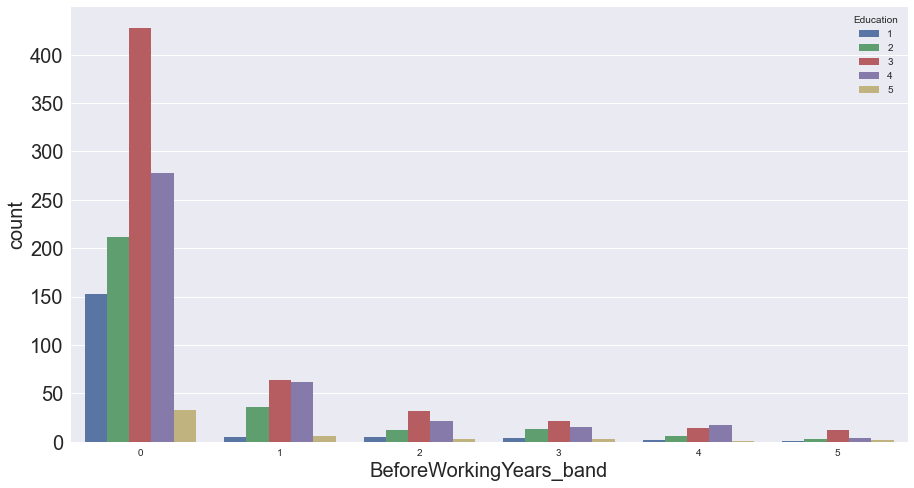

In [41]:
# BeforeWorkingYears
plt.figure(figsize=(15,8))
sns.countplot('BeforeWorkingYears_band', hue='Education', data=data)

- 전체적으로 분포는 비슷함

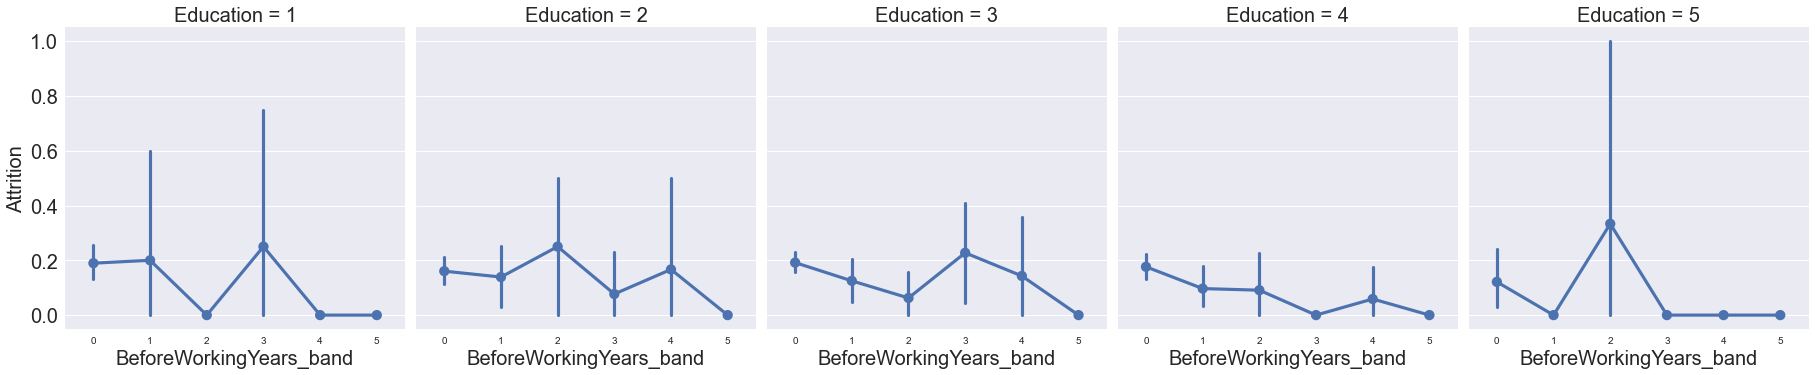

In [42]:
sns.factorplot('BeforeWorkingYears_band', 'Attrition', col='Education', data=data)

## Education Field

In [43]:
data.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

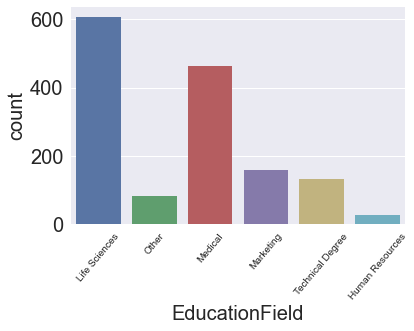

In [44]:
# 분포 확인
sns.countplot(data=data, x='EducationField')
plt.xticks(rotation=50)
plt.show()

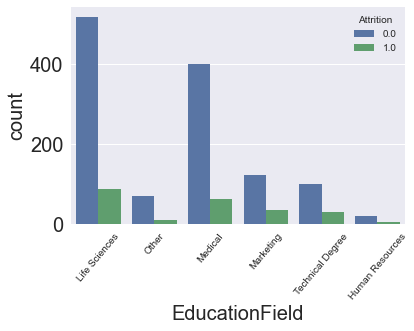

In [45]:
# 교육 분야 별 퇴사 여부
sns.countplot('EducationField', hue='Attrition', data=data)
plt.xticks(rotation=50)
plt.show()

In [46]:
pd.crosstab(data.Attrition,
            data.EducationField, margins=True).style.background_gradient(
                cmap='summer_r')

- 교육수준이 생명과학인 사람들이 많이 퇴사했다.

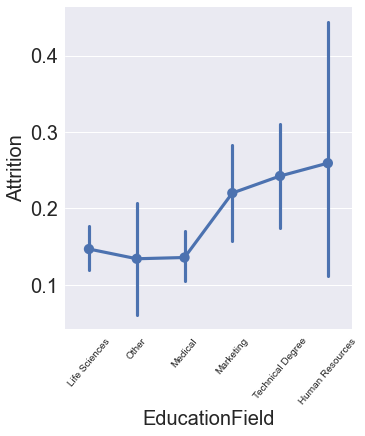

In [47]:
sns.factorplot(x='EducationField', y='Attrition',  data=data)
plt.xticks(rotation=50)
plt.show()

In [48]:
print('Human Resources의 퇴사율: ', data[data.EducationField=='Human Resources'].Attrition.mean())
print('Life Sciences의 퇴사율: ', data[data.EducationField=='Life Sciences'].Attrition.mean())
print('Marketing의 퇴사율: ', data[data.EducationField=='Marketing'].Attrition.mean())
print('Medical의 퇴사율: ', data[data.EducationField=='Medical'].Attrition.mean())
print('Technical Degree의 퇴사율: ', data[data.EducationField=='Technical Degree'].Attrition.mean())
print('Other의 퇴사율: ', data[data.EducationField=='Other'].Attrition.mean())

Human Resources의 퇴사율:  0.25925925925925924
Life Sciences의 퇴사율:  0.14686468646864687
Marketing의 퇴사율:  0.22012578616352202
Medical의 퇴사율:  0.13577586206896552
Technical Degree의 퇴사율:  0.24242424242424243
Other의 퇴사율:  0.13414634146341464


- HR, Technical Degree, Marketing의 퇴사율이 높다

### EducationField + 다른 피쳐

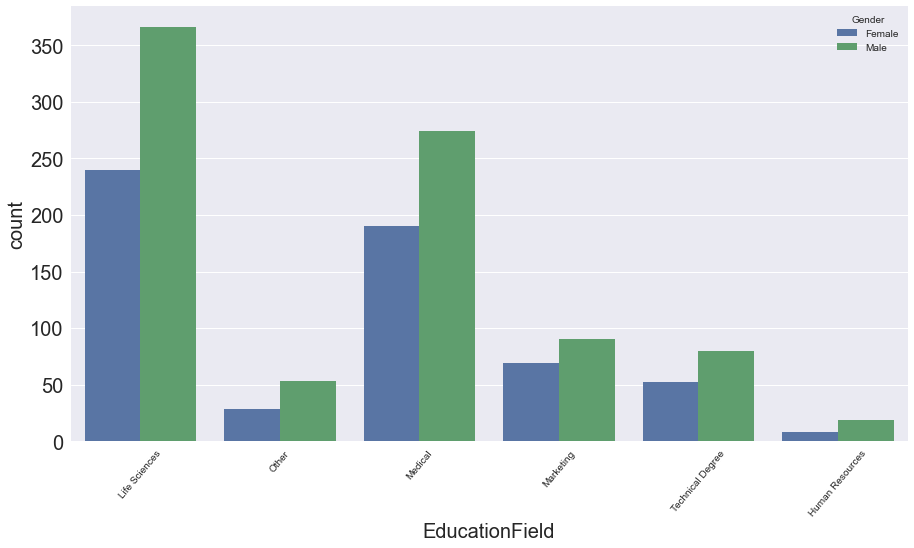

In [49]:
# Gender
plt.figure(figsize=(15,8))
sns.countplot('EducationField', hue='Gender', data=data)
plt.xticks(rotation=50)
plt.show()

- Life Sciences, Medical 제외하고는 전체적으로 분포 비슷함

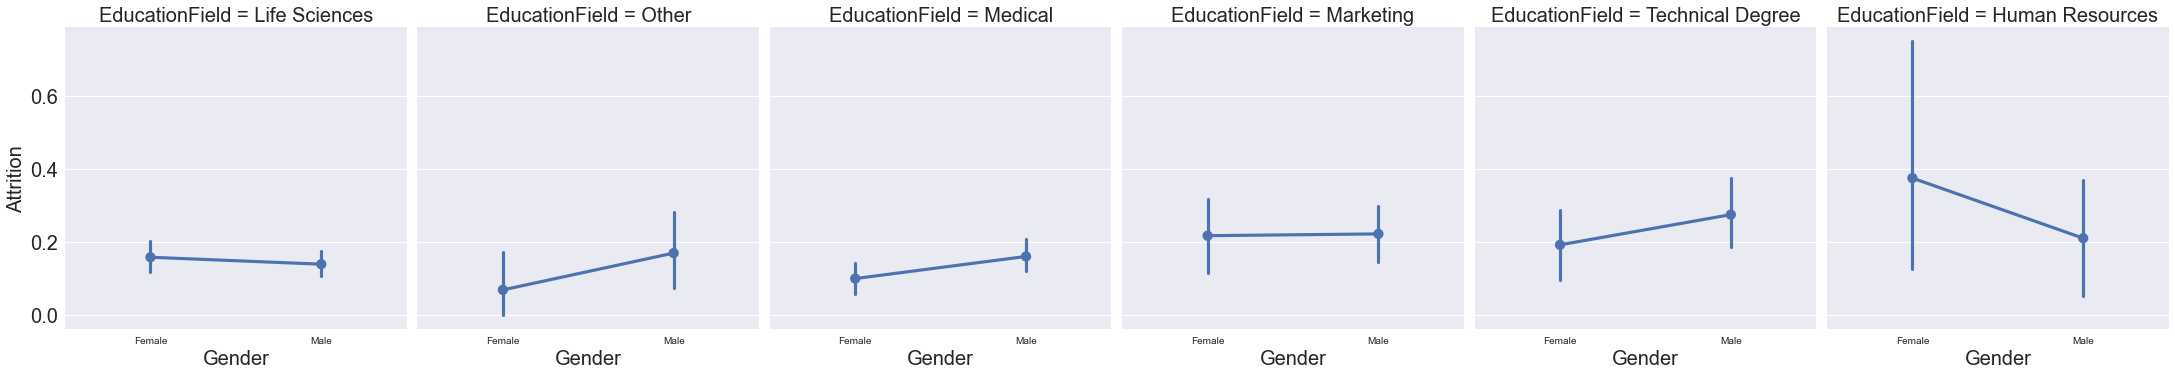

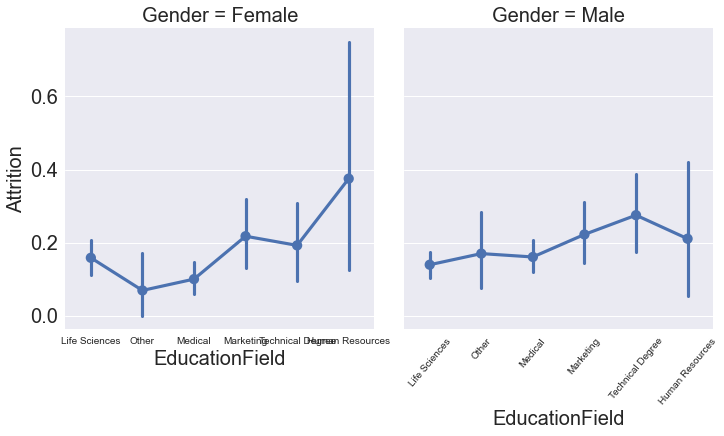

In [50]:
# Gender
sns.factorplot('Gender', 'Attrition', col='EducationField', data=data,ax=ax[0])
sns.factorplot('EducationField', 'Attrition', col='Gender', data=data,ax=ax[1])
plt.xticks(rotation=50)

plt.show()

- HR 여성의 퇴사율이 눈에 띄게 높음

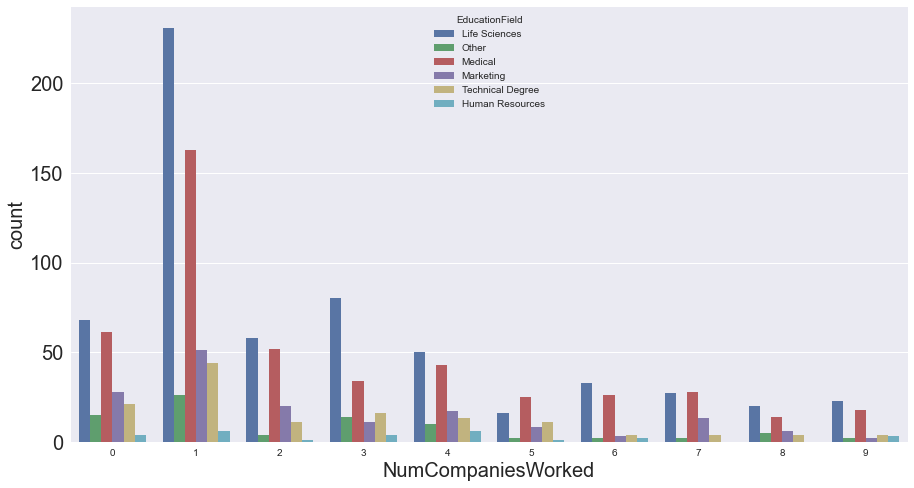

In [51]:
# NumCompaniesWorked
plt.figure(figsize=(15,8))
sns.countplot('NumCompaniesWorked', hue='EducationField', data=data)
plt.show()

- 분포 유사함
- 전에 다닌 회사가 하나인 생명과학, 의학 전공 사람들이 매우 많음

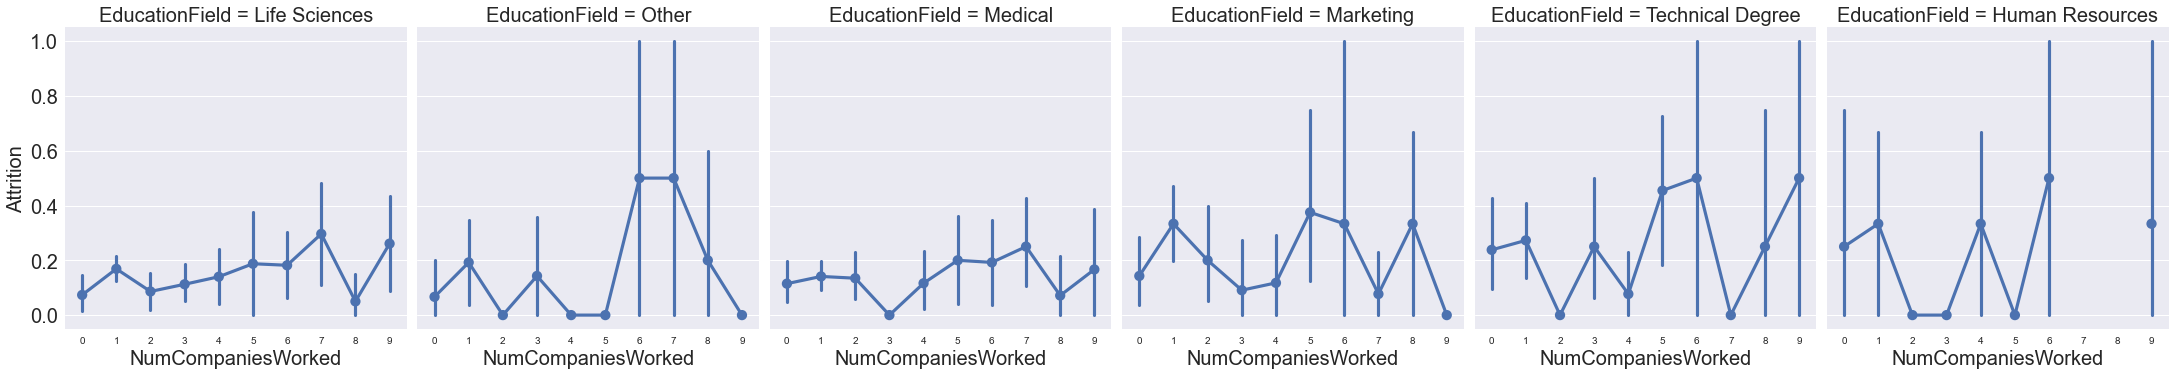

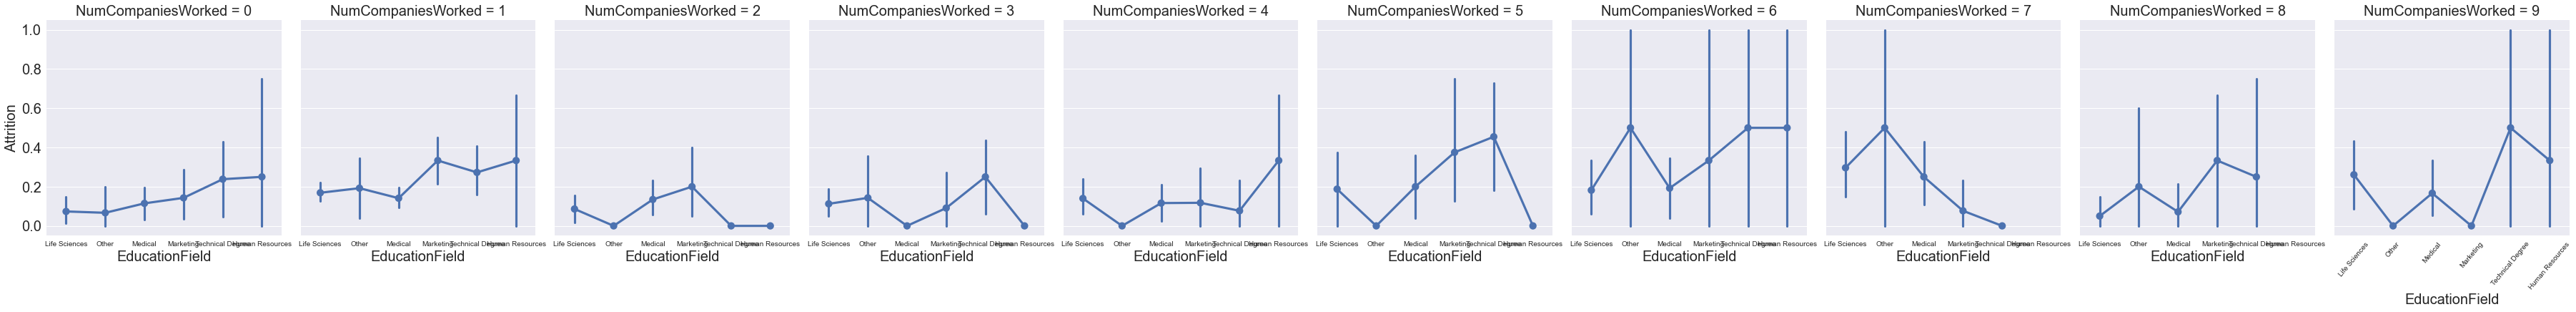

In [52]:
sns.factorplot('NumCompaniesWorked', 'Attrition', col='EducationField', data=data)
sns.factorplot('EducationField', 'Attrition', col='NumCompaniesWorked', data=data)
plt.xticks(rotation=50)
plt.show()

- 대부분의 전공들이 전에 다닌 회사 수가 많아질수록 퇴사율 높아짐

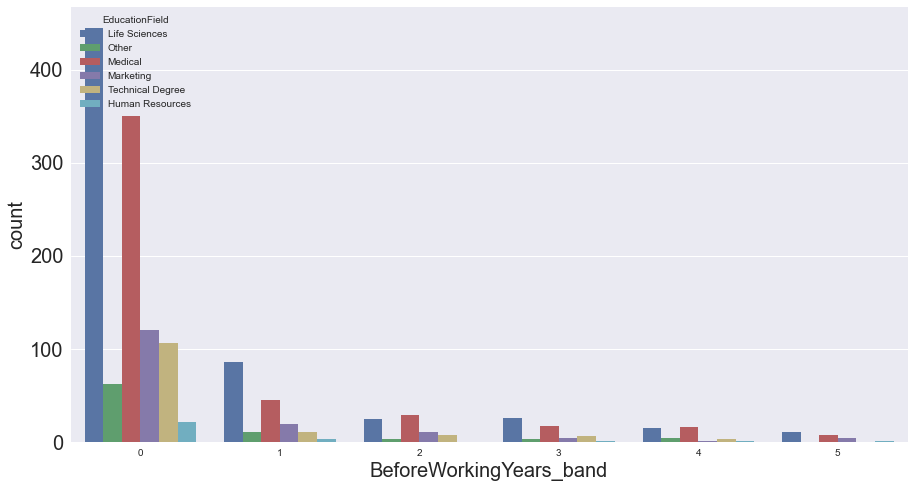

In [53]:
# BeforeWorkingYears
plt.figure(figsize=(15,8))
sns.countplot('BeforeWorkingYears_band', hue='EducationField', data=data)
plt.show()

- 마찬가지로 분포 유사

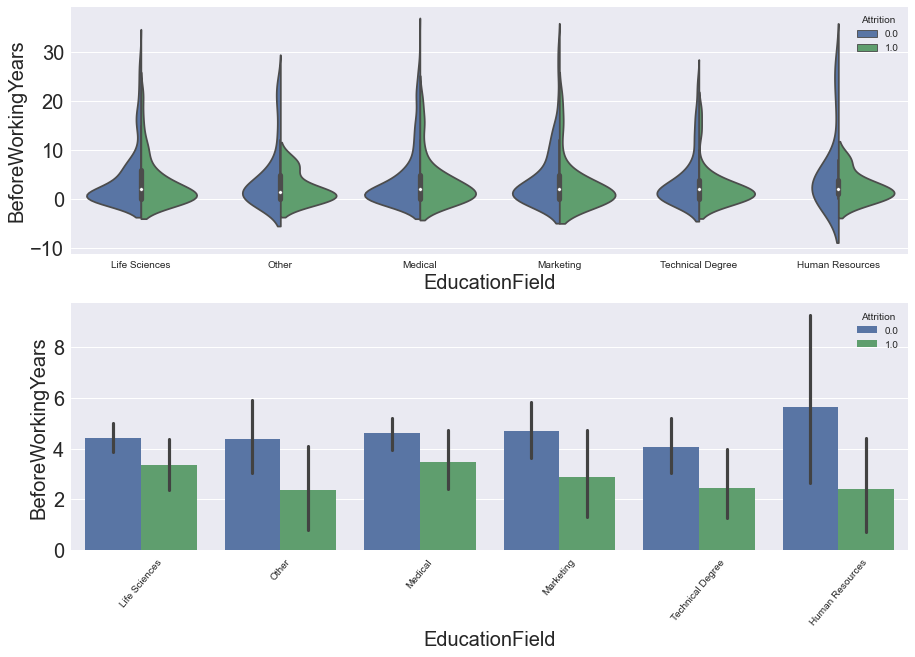

In [54]:
f, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.violinplot('EducationField', 'BeforeWorkingYears', hue='Attrition', data=data, split=True,ax=ax[0])
sns.barplot('EducationField', 'BeforeWorkingYears', hue='Attrition', data=data,ax=ax[1])
plt.xticks(rotation=50)
plt.show()

## Gender

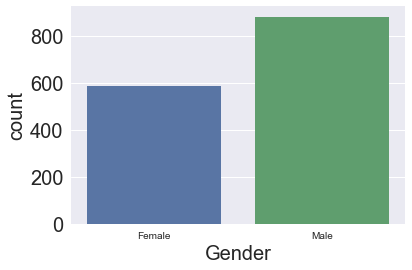

In [55]:
# 분포 확인
sns.countplot(data=data, x='Gender')
plt.show()

- 남성이 많음

<AxesSubplot:xlabel='Gender', ylabel='count'>

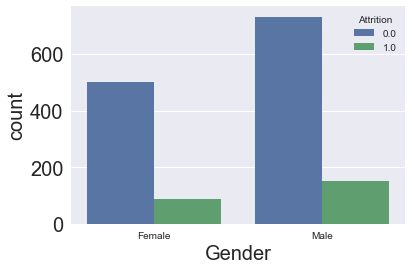

In [56]:
# 성별 별 퇴사 여부
sns.countplot('Gender', hue='Attrition', data=data)

In [57]:
pd.crosstab(data.Attrition,
            data.Gender, margins=True).style.background_gradient(
                cmap='summer_r')

- 남성이 많이 퇴사했다.

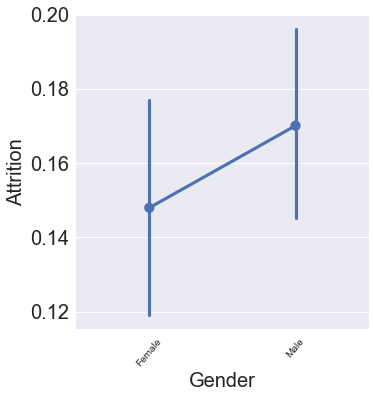

In [58]:
sns.factorplot(x='Gender', y='Attrition',  data=data)
plt.xticks(rotation=50)
plt.show()

In [59]:
print('남성의 퇴사율: ', data[data.Gender=='Male'].Attrition.mean())
print('여성의 퇴사율: ', data[data.Gender=='Female'].Attrition.mean())

남성의 퇴사율:  0.17006802721088435
여성의 퇴사율:  0.14795918367346939


- 차이 없음 / 별 의미 없는 듯

### Gender + 다른 피쳐

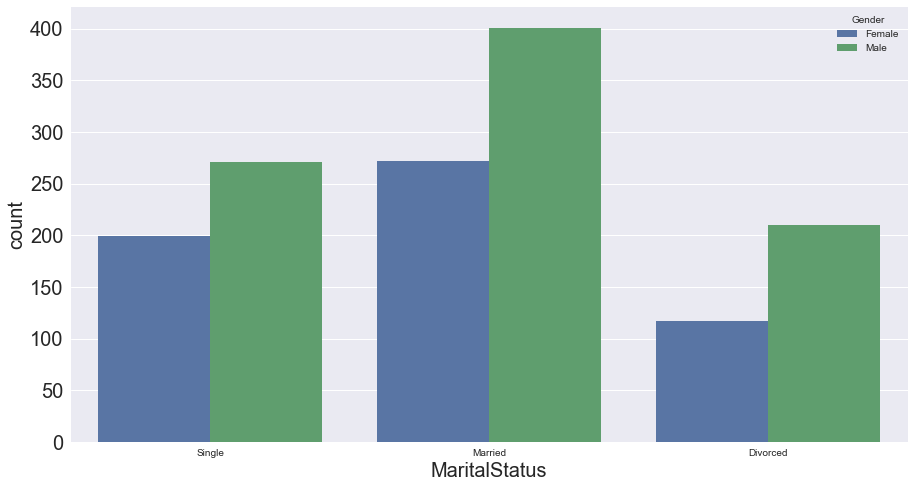

In [60]:
# MaritalStatus
plt.figure(figsize=(15,8))
sns.countplot('MaritalStatus', hue='Gender', data=data)
plt.show()

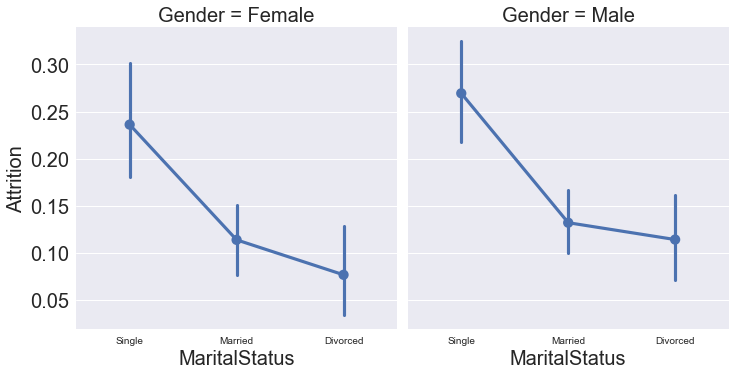

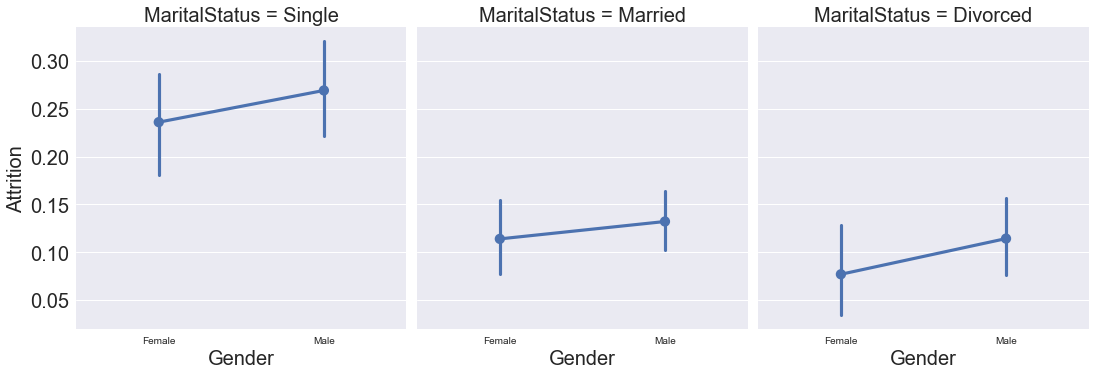

In [61]:
sns.factorplot('MaritalStatus', 'Attrition', col='Gender', data=data)
sns.factorplot('Gender', 'Attrition', col='MaritalStatus', data=data)
plt.show()

- 모든 결혼 상태에서 남성의 퇴사율이 높음
- 남성이며 single인 사람들의 퇴사율이 매우매우 높음

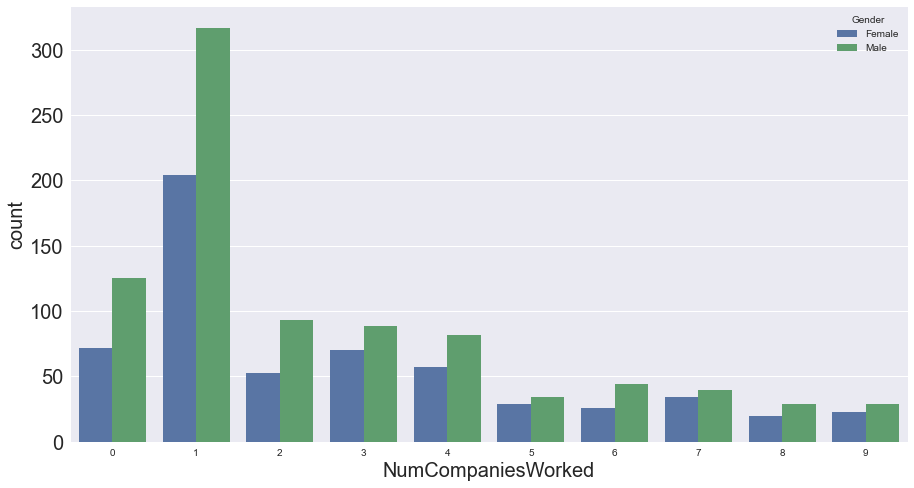

In [62]:
# NumCompaniesWorked
plt.figure(figsize=(15,8))
sns.countplot('NumCompaniesWorked', hue='Gender', data=data)
plt.show()

- 분포 비슷

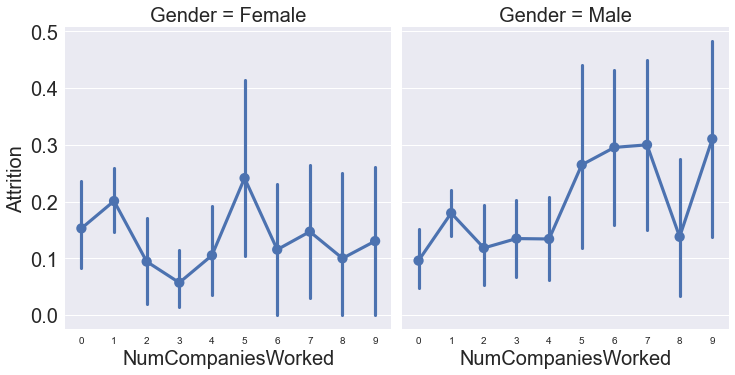

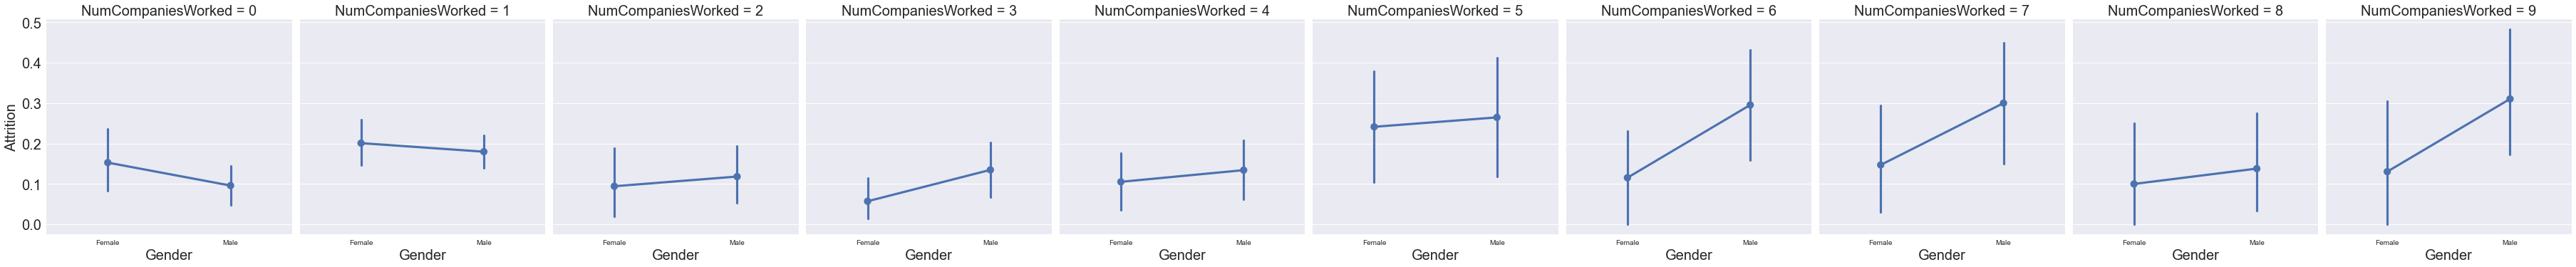

In [63]:
sns.factorplot('NumCompaniesWorked', 'Attrition', col='Gender', data=data)
sns.factorplot('Gender', 'Attrition', col='NumCompaniesWorked', data=data)
plt.show()

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Attrition'>

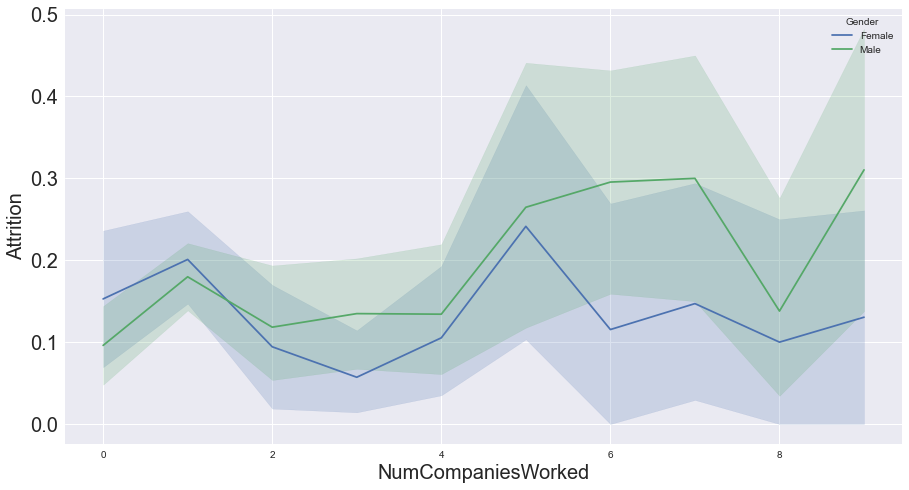

In [64]:
plt.figure(figsize=(15,8))
sns.lineplot('NumCompaniesWorked', 'Attrition', hue='Gender', data=data)

- 여성들은 재직했던 회사 수가 큰 상관이 없어 보이지만 남성들은 재직했던 회사 수가 많아질수록 퇴사율이 높아짐

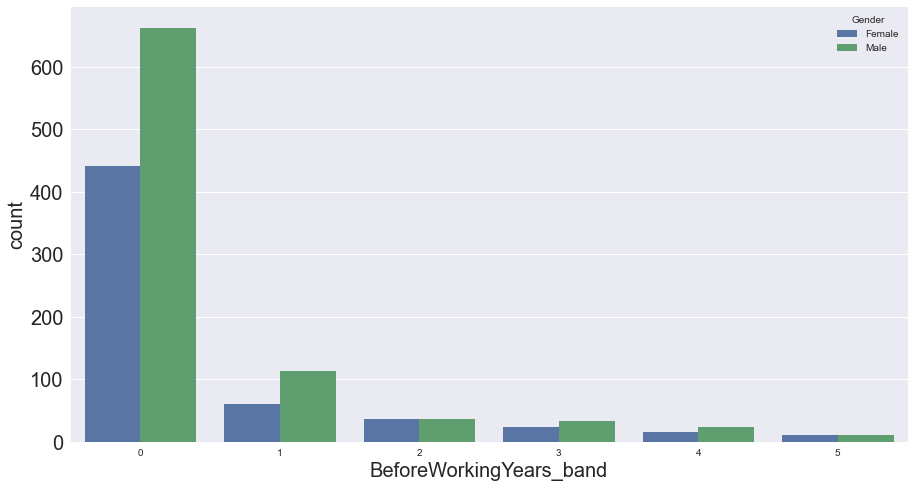

In [65]:
# BeforeWorkingYears
plt.figure(figsize=(15,8))
sns.countplot('BeforeWorkingYears_band', hue='Gender', data=data)
plt.show()

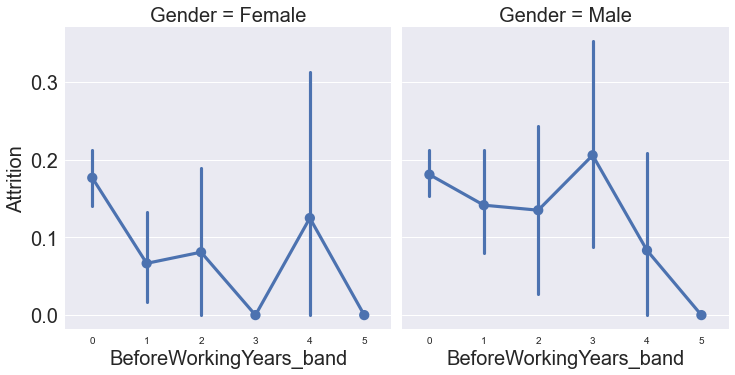

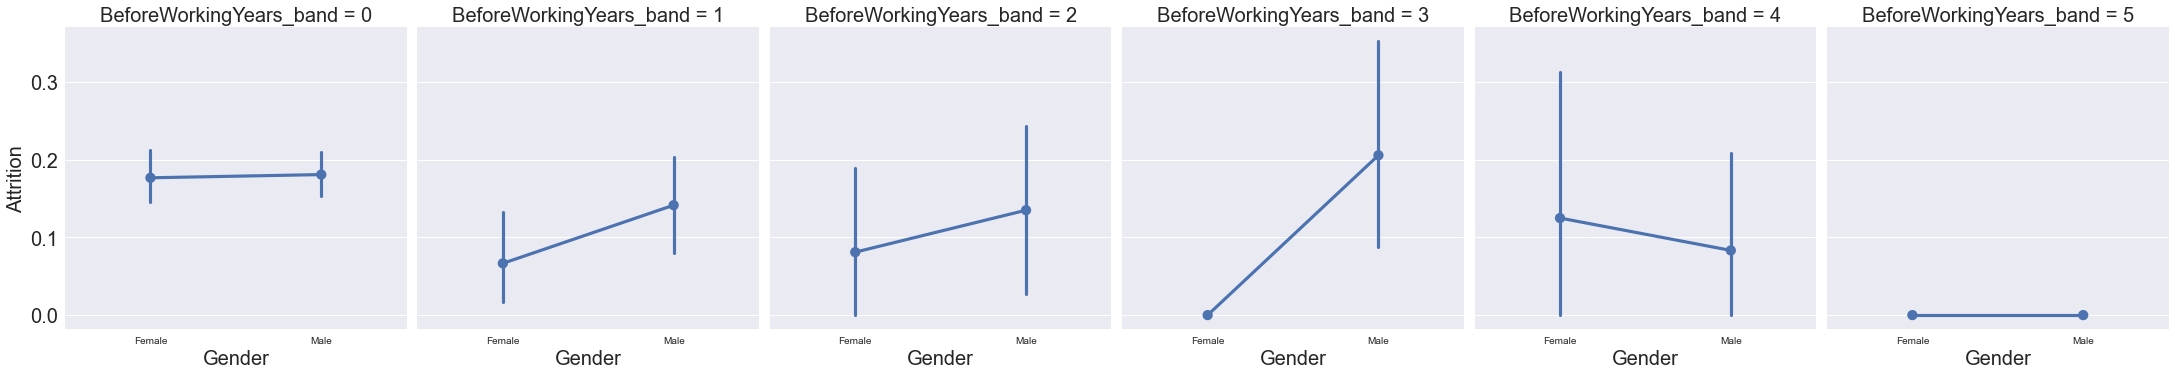

In [66]:
sns.factorplot('BeforeWorkingYears_band', 'Attrition', col='Gender', data=data)
sns.factorplot('Gender', 'Attrition', col='BeforeWorkingYears_band', data=data)
plt.show()

<AxesSubplot:xlabel='BeforeWorkingYears', ylabel='Attrition'>

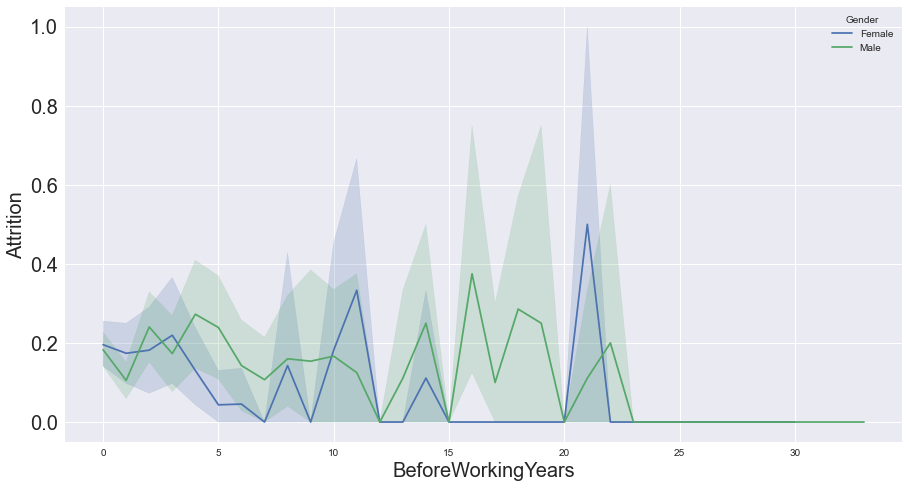

In [67]:
plt.figure(figsize=(15,8))
sns.lineplot('BeforeWorkingYears', 'Attrition', hue='Gender', data=data)

## Marital Status

In [68]:
data.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

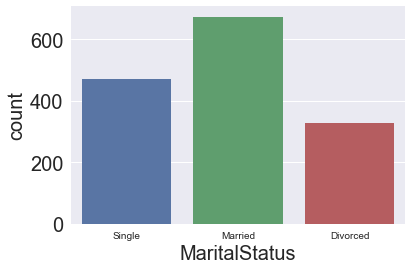

In [69]:
# 분포 확인
sns.countplot(data=data, x='MaritalStatus')
plt.show()

- 기혼자의 수가 많다

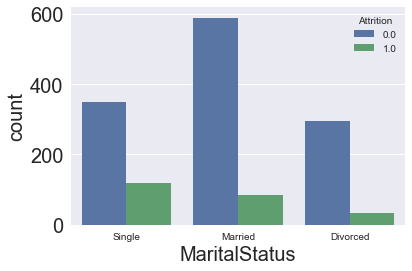

In [70]:
# 결혼상태 별 퇴사 여부
sns.countplot('MaritalStatus', hue='Attrition', data=data)
plt.show()

In [71]:
pd.crosstab(data.Attrition,
            data.MaritalStatus, margins=True).style.background_gradient(
                cmap='summer_r')

- 미혼의 퇴사 수가 가장 많다!!

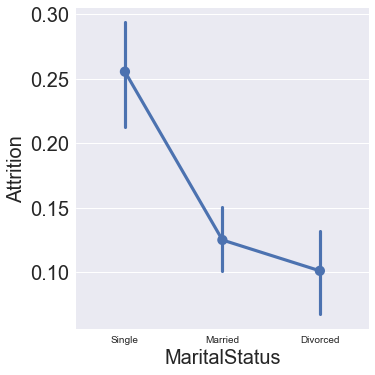

In [72]:
sns.factorplot(x='MaritalStatus', y='Attrition',  data=data)
plt.show()

In [73]:
print('미혼의 퇴사율: ', data[data.MaritalStatus=='Single'].Attrition.mean())
print('기혼의 퇴사율: ', data[data.MaritalStatus=='Married'].Attrition.mean())
print('이혼의 퇴사율: ', data[data.MaritalStatus=='Divorced'].Attrition.mean())

미혼의 퇴사율:  0.2553191489361702
기혼의 퇴사율:  0.12481426448736999
이혼의 퇴사율:  0.10091743119266056


- 미혼의 1/4이 퇴사함!!

### MaritalStatus + 다른 피쳐

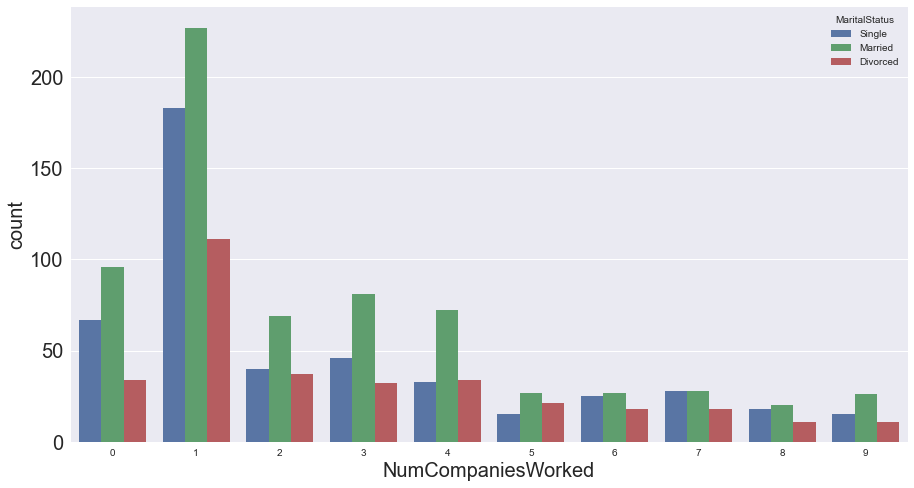

In [74]:
# NumCompaniesWorked
plt.figure(figsize=(15,8))
sns.countplot('NumCompaniesWorked', hue='MaritalStatus', data=data)
plt.show()

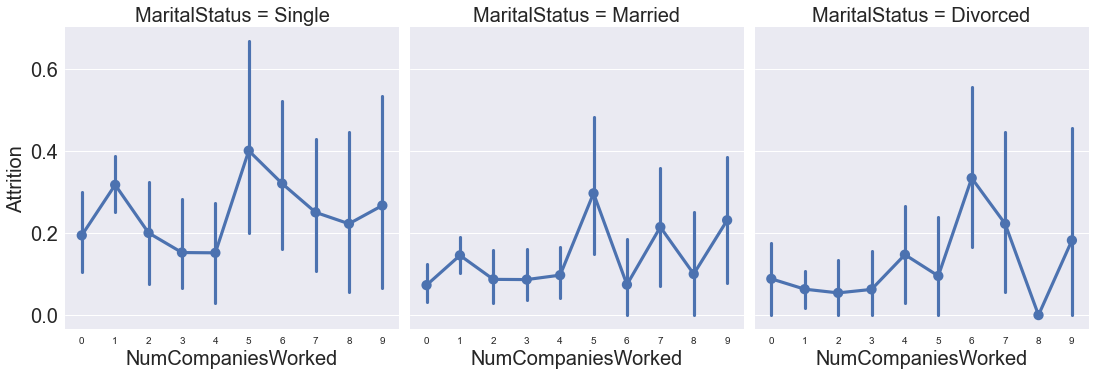

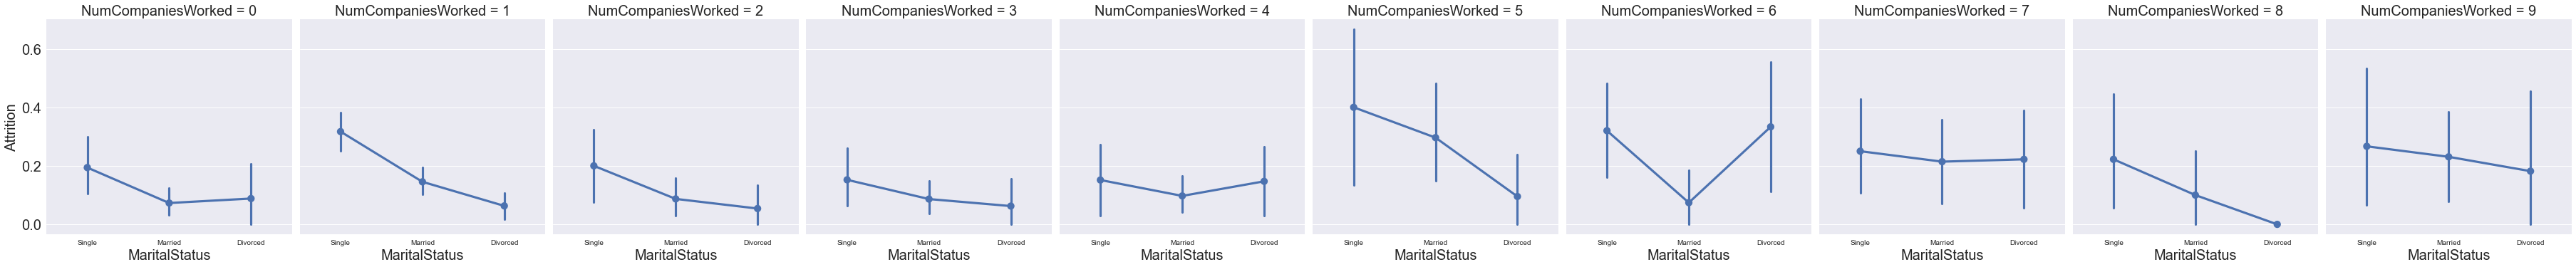

In [75]:
sns.factorplot('NumCompaniesWorked', 'Attrition', col='MaritalStatus', data=data)
sns.factorplot('MaritalStatus', 'Attrition', col='NumCompaniesWorked', data=data)
plt.show()

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Attrition'>

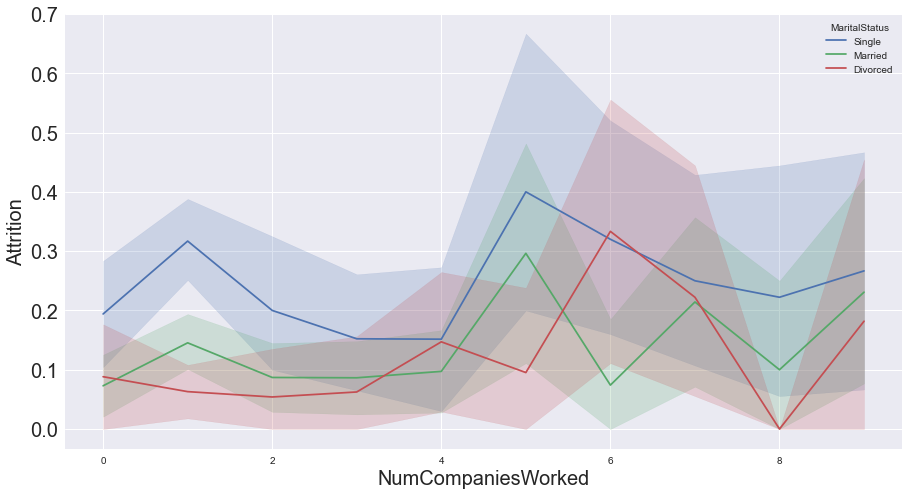

In [76]:
plt.figure(figsize=(15,8))
sns.lineplot('NumCompaniesWorked', 'Attrition', hue='MaritalStatus', data=data)

- 역시 걍 single이 높음

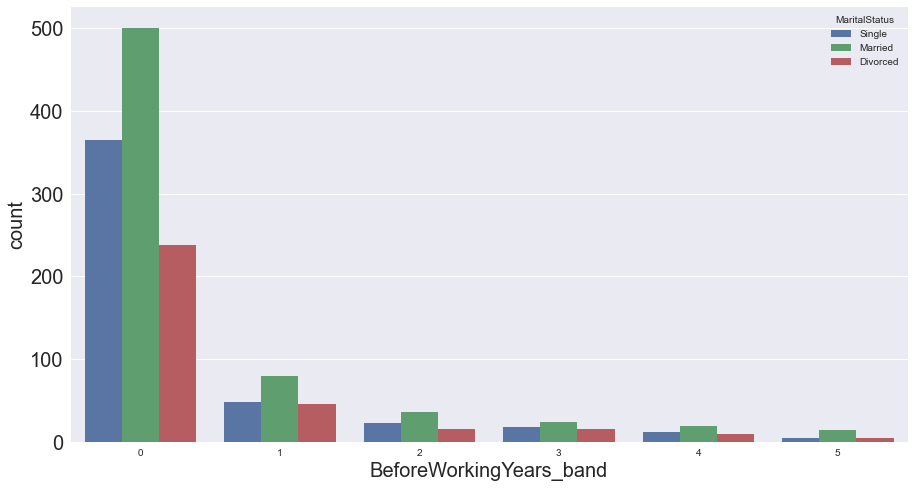

In [77]:
# BeforeWorkingYears
plt.figure(figsize=(15,8))
sns.countplot('BeforeWorkingYears_band', hue='MaritalStatus', data=data)
plt.show()

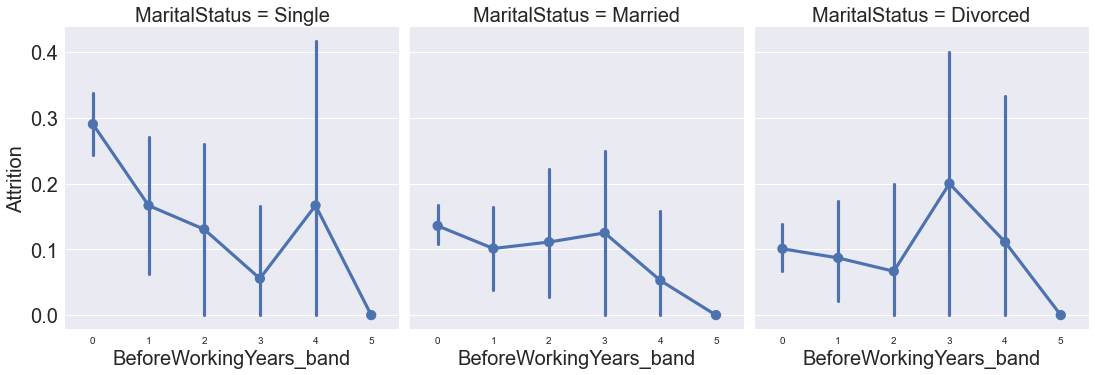

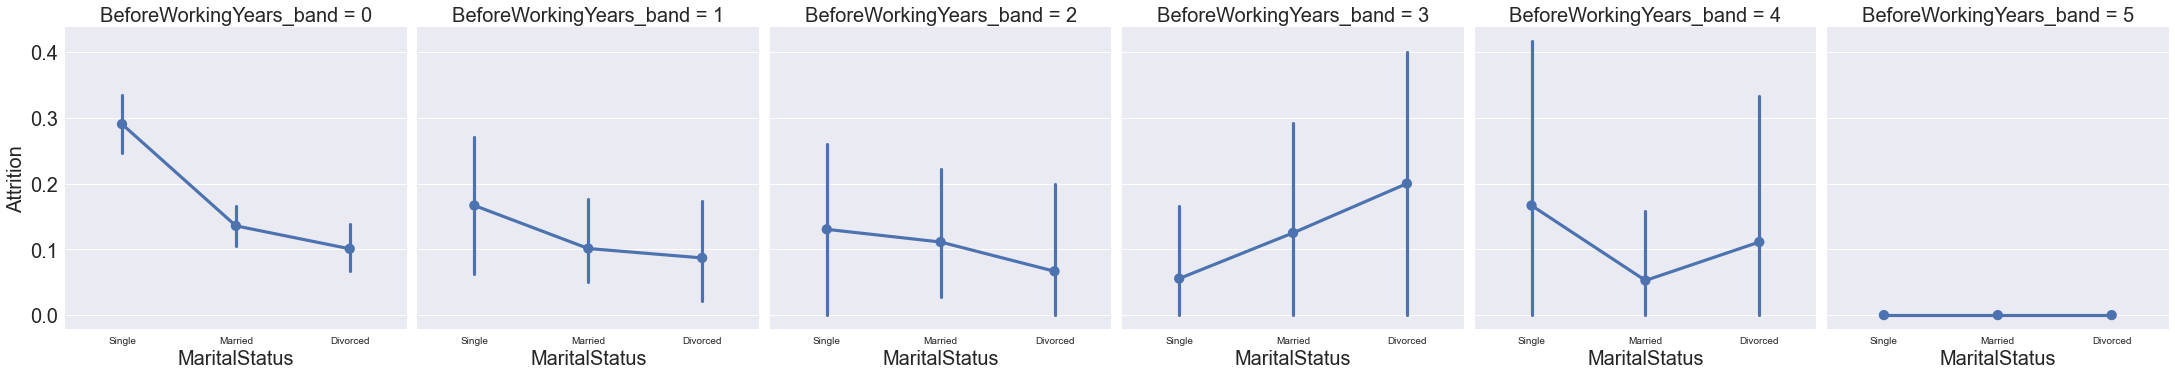

In [78]:
sns.factorplot('BeforeWorkingYears_band', 'Attrition', col='MaritalStatus', data=data)
sns.factorplot('MaritalStatus', 'Attrition', col='BeforeWorkingYears_band', data=data)
plt.show()

In [79]:
print(data.MaritalStatus.value_counts())
print(data.loc[(data.MaritalStatus=='Divorced')&(data.BeforeWorkingYears_band==3), 'BeforeWorkingYears_band'].count())

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
15


- band 3에서 divorced가 많은 것은 걍 수가 적어서 그런 듯

<AxesSubplot:xlabel='BeforeWorkingYears', ylabel='Attrition'>

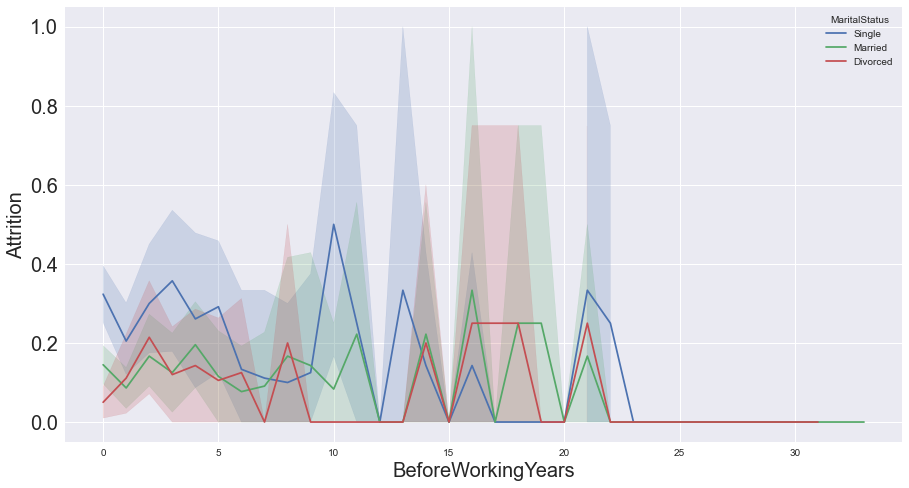

In [80]:
plt.figure(figsize=(15,8))
sns.lineplot('BeforeWorkingYears', 'Attrition', hue='MaritalStatus', data=data)

## NumCompaniesWorked

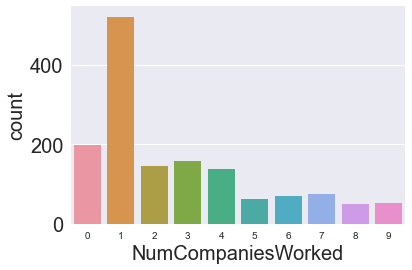

In [81]:
# 분포 확인
sns.countplot(data=data, x='NumCompaniesWorked')
plt.show()

- 전에 하나의 회사에서 일하거나, 전 회사가 없는 사람이 많음

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

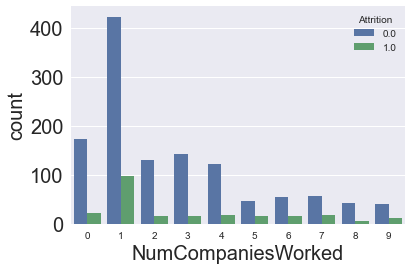

In [82]:
# 일한 회사 수 별 퇴사 여부
sns.countplot('NumCompaniesWorked', hue='Attrition', data=data)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

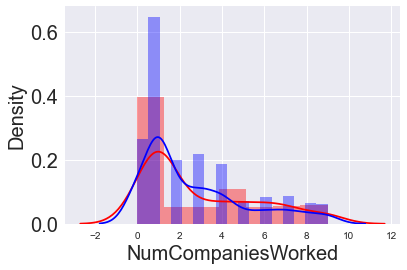

In [83]:
sns.distplot(data[data['Attrition'] == 1].NumCompaniesWorked, color='r')
sns.distplot(data[data['Attrition'] == 0].NumCompaniesWorked, color='b')

In [84]:
pd.crosstab(data.Attrition,
            data.NumCompaniesWorked, margins=True).style.background_gradient(
                cmap='summer_r')

- 1개의 회사에서 일해봤던 사람들이 많이 퇴사했다

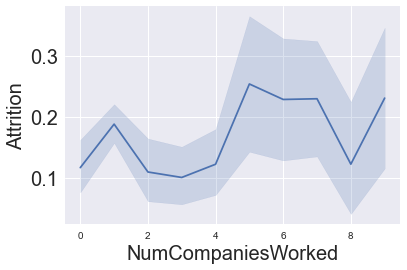

In [85]:
sns.lineplot(x='NumCompaniesWorked', y='Attrition',  data=data)
plt.show()

In [86]:
print('0의 퇴사율: ', data[data.NumCompaniesWorked==0].Attrition.mean())
print('1의 퇴사율: ', data[data.NumCompaniesWorked==1].Attrition.mean())
print('2의 퇴사율: ', data[data.NumCompaniesWorked==2].Attrition.mean())
print('3의 퇴사율: ', data[data.NumCompaniesWorked==3].Attrition.mean())
print('4의 퇴사율: ', data[data.NumCompaniesWorked==4].Attrition.mean())
print('5의 퇴사율: ', data[data.NumCompaniesWorked==5].Attrition.mean())
print('6의 퇴사율: ', data[data.NumCompaniesWorked==6].Attrition.mean())
print('7의 퇴사율: ', data[data.NumCompaniesWorked==7].Attrition.mean())
print('8의 퇴사율: ', data[data.NumCompaniesWorked==8].Attrition.mean())
print('9의 퇴사율: ', data[data.NumCompaniesWorked==9].Attrition.mean())

0의 퇴사율:  0.116751269035533
1의 퇴사율:  0.18809980806142035
2의 퇴사율:  0.1095890410958904
3의 퇴사율:  0.10062893081761007
4의 퇴사율:  0.1223021582733813
5의 퇴사율:  0.25396825396825395
6의 퇴사율:  0.22857142857142856
7의 퇴사율:  0.22972972972972974
8의 퇴사율:  0.12244897959183673
9의 퇴사율:  0.23076923076923078


- 5,6,7,9의 퇴사율이 유의미하게 높음
- 많은 회사 다녀봤을수록 많이 관두는 듯 ==> 이미 퇴사 경험이 있는 사람들은 더 많이 퇴사한다?

## BeforeWorkingYears (TotalWorkingYears - YearsAtCompany)

In [87]:
data.BeforeWorkingYears.describe()

count    1470.000000
mean        4.271429
std         6.179783
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        33.000000
Name: BeforeWorkingYears, dtype: float64

In [88]:
np.sort(data.BeforeWorkingYears.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33])

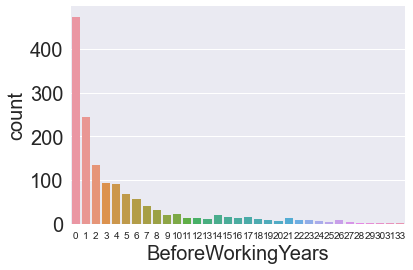

In [89]:
# 분포 확인
sns.countplot(data=data, x='BeforeWorkingYears')
plt.show()

- 전에 하나의 회사에서 일하거나, 전 회사가 없는 사람이 많음

In [90]:
# BeforeWorkingYears_band 만들기
data['BeforeWorkingYears_band'] = 0
data.loc[data['BeforeWorkingYears'] <= 5, 'BeforeWorkingYears_band'] = 0
data.loc[(data['BeforeWorkingYears'] > 5) & (data['BeforeWorkingYears'] <= 10), 'BeforeWorkingYears_band'] = 1
data.loc[(data['BeforeWorkingYears'] > 10) & (data['BeforeWorkingYears'] <= 15), 'BeforeWorkingYears_band'] = 2
data.loc[(data['BeforeWorkingYears'] > 15) & (data['BeforeWorkingYears'] <= 20), 'BeforeWorkingYears_band'] = 3
data.loc[(data['BeforeWorkingYears'] > 20) & (data['BeforeWorkingYears'] <= 25), 'BeforeWorkingYears_band'] = 4
data.loc[data['BeforeWorkingYears'] > 25, 'BeforeWorkingYears_band'] = 5
data.head(5)

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41        1.0      Travel_Rarely       1102                   Sales   
1   49        0.0  Travel_Frequently        279  Research & Development   
2   37        1.0      Travel_Rarely       1373  Research & Development   
3   33        0.0  Travel_Frequently       1392  Research & Development   
4   27        0.0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... StockOptionLevel  TrainingTimesLastYear  \
0                        2  ...                0                      0   
1                        3  ...                1                      3   
2                        4  ...                0                      3   
3                        4  ...                0                      3   
4                        1  ...                1                      3   

   WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                1               6                  4   
1                3              10                  7   
2                3               0                  0   
3                3               8                  7   
4                3               2                  2   

   YearsSinceLastPromotion YearsWithCurrManager  BeforeWorkingYears  Age_band  \
0                        0                    5                   2         2   
1                        1                    7                   0         3   
2                        0                    0                   7         2   
3                        3                    0                   0         1   
4                        2                    2                   4         1   

   BeforeWorkingYears_band  
0                        0  
1                        0  
2                        1  
3                        0  
4                        0  

[5 rows x 35 columns]

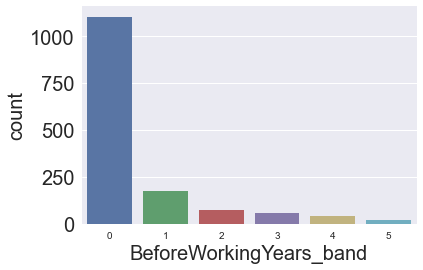

In [91]:
# 분포 확인
sns.countplot(data=data, x='BeforeWorkingYears_band')
plt.show()

<AxesSubplot:xlabel='BeforeWorkingYears_band', ylabel='count'>

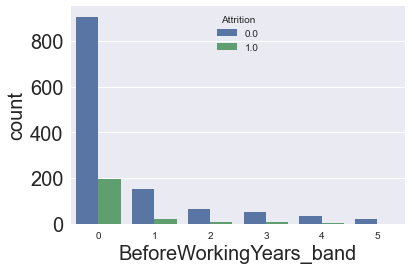

In [92]:
# 경력 별 퇴사 여부
sns.countplot('BeforeWorkingYears_band', hue='Attrition', data=data)

- 경력이 5년 이하인 사람이 가장 많다

In [93]:
pd.crosstab(data.Attrition,
            data.BeforeWorkingYears_band, margins=True).style.background_gradient(
                cmap='summer_r')

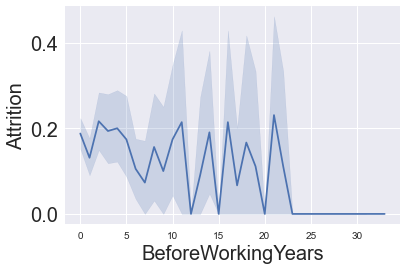

In [94]:
sns.lineplot(x='BeforeWorkingYears', y='Attrition',  data=data)
plt.show()

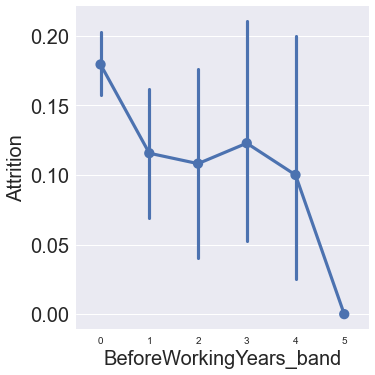

In [95]:
sns.factorplot(x='BeforeWorkingYears_band', y='Attrition',  data=data)
plt.show()

In [96]:
print('BeforeWorkingYears_band 0의 퇴사율: ', data[data.BeforeWorkingYears_band==0].Attrition.mean())
print('BeforeWorkingYears_band 1의 퇴사율: ', data[data.BeforeWorkingYears_band==1].Attrition.mean())
print('BeforeWorkingYears_band 2의 퇴사율: ', data[data.BeforeWorkingYears_band==2].Attrition.mean())
print('BeforeWorkingYears_band 3의 퇴사율: ', data[data.BeforeWorkingYears_band==3].Attrition.mean())
print('BeforeWorkingYears_band 4의 퇴사율: ', data[data.BeforeWorkingYears_band==4].Attrition.mean())
print('BeforeWorkingYears_band 5의 퇴사율: ', data[data.BeforeWorkingYears_band==5].Attrition.mean())

BeforeWorkingYears_band 0의 퇴사율:  0.1793478260869565
BeforeWorkingYears_band 1의 퇴사율:  0.11560693641618497
BeforeWorkingYears_band 2의 퇴사율:  0.10810810810810811
BeforeWorkingYears_band 3의 퇴사율:  0.12280701754385964
BeforeWorkingYears_band 4의 퇴사율:  0.1
BeforeWorkingYears_band 5의 퇴사율:  0.0


## Daily/Hourly/Monthly Rate, Monthly Income
- DailyRate : 일급 (ㅇ)
- DistanceFromHome : 통근거리 
- HourlyRate : 시급 (ㅇ)
- MonthlyIncome : 월 소득 (ㅇ)
- MonthlyRate : 월급 (ㅇ)
- PercentSalaryHike : 임금 상승률  
- StockOptionLevel : 스톡 옵션 레벨 

>Guide line 일급, 시급, 월급 , 월소득, 그냥 합쳐서 하나로 만들어도 될거 같다. 
>아니면 월소득, 월급 만 써도 될거같다
>분포가 월급 시급 일급이 같다 
>일급+ 시급+ 월급 + 월소득 4개의 평균을 같게 만들어주고 합친다음에 한 사람의 임금 수준을 나타낼 수 있음 

>모든 변수가 int 로 되어 있기 때문에 효율적인 시각화를 위해서 그룹을 나눌 예정
>임금 상승률이 높은 그룹은 핵심 인재 그룹이라고 할 수 있을 것이다. 

>임금 상승률이 높은 그룹중에 



          HourlyRate                           
               count  max min       mean median
Attrition                                      
0.0             1233  100  30  65.952149     66
1.0              237  100  31  65.573840     66


          MonthlyRate                                  
                count    max   min          mean median
Attrition                                              
0.0              1233  26997  2094  14265.779400  14120
1.0               237  26999  2326  14559.308017  14618


          MonthlyIncome                                 
                  count    max   min         mean median
Attrition                                               
0.0                1233  19999  1051  6832.739659   5204
1.0                 237  19859  1009  4787.092827   3202


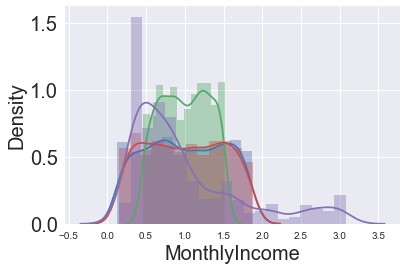

In [97]:
#Rate , MonthlyIncome 확인 

import matplotlib.pylab as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

# col = ['DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate'
#        , 'PercentSalaryHike', 'StockOptionLevel']

# data.info()

sns.distplot(data['DailyRate']/np.mean(data['DailyRate']))
sns.distplot(data['HourlyRate']/np.mean(data['HourlyRate']))
sns.distplot(data['MonthlyRate']/np.mean(data['MonthlyRate'])) 
sns.distplot(data['MonthlyIncome']/np.mean(data['MonthlyIncome'])) 

# 시급만 분포가 조금더 좁음
# 일급과, 월급은 분포가 똑같음 

print("\n")
print(data.groupby('Attrition')[['HourlyRate']].agg(['count', 'max', 'min', 'mean', 'median']))
print("\n")
print(data.groupby('Attrition')[['MonthlyRate']].agg(['count', 'max', 'min', 'mean', 'median']))
print("\n")
print(data.groupby('Attrition')[['MonthlyIncome']].agg(['count', 'max', 'min', 'mean', 'median']))

#Monthly Income과 Attrition은 음의 상관관계 


1. HourlyRate, MonthlRate, DailyIncome은 분포가 거의 비슷하고, Attirion에 따라 차이가없음
> 세 변수중 MonthlyRate 만 그룹을 나눠서 사용할 계획 
2. MonthlyIncome 은 차이가 있음. 평균적으로 월소득이 낮은 사람이 이직을 더 많이 함.
> MonthlyIncome 은 유의미한 변수로 보임 


## PercentSalaryHike

          PercentSalaryHike                          
                      count max min       mean median
Attrition                                            
0.0                    1233  25  11  15.231144     14
1.0                     237  25  11  15.097046     14


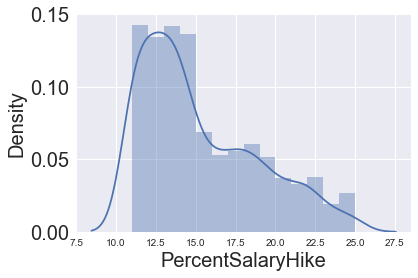

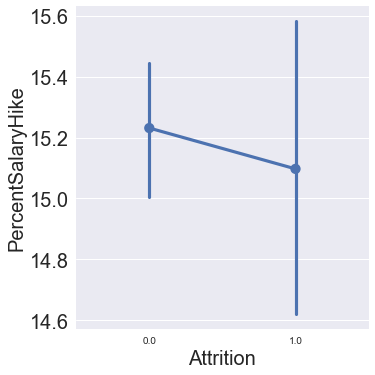

In [98]:
#임금상승률

sns.distplot(data['PercentSalaryHike'])
print(data.groupby('Attrition')[['PercentSalaryHike']].agg(['count', 'max', 'min', 'mean', 'median']))
sns.factorplot('Attrition', 'PercentSalaryHike', data=data) 

#Attrition에 PercentSalaryHike 는 큰 영향을 미치지 않아 보임
#다른 변수와 함께보아야 할것으로 보임 

## DistanceFromHome

          DistanceFromHome                          
                     count max min       mean median
Attrition                                           
0.0                   1233  29   1   8.915653      7
1.0                    237  29   1  10.632911      9


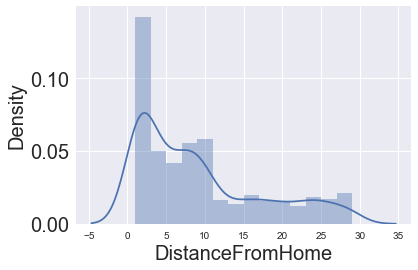

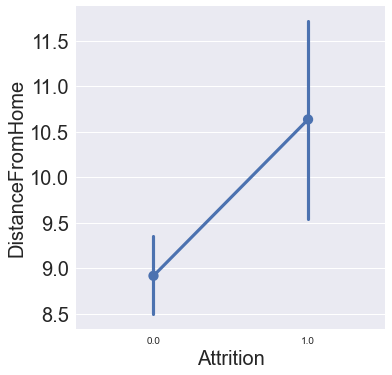

In [99]:
# DistanceFromHome
sns.distplot(data['DistanceFromHome'])
print(data.groupby('Attrition')[['DistanceFromHome']].agg(['count', 'max', 'min', 'mean', 'median']))
sns.factorplot('Attrition', 'DistanceFromHome', data=data) 

#DistanceFromHome과 Attrition은 양의 상관관계 

## StockOptionLevel

          StockOptionLevel                         
                     count max min      mean median
Attrition                                          
0.0                   1233   3   0  0.845093      1
1.0                    237   3   0  0.527426      0


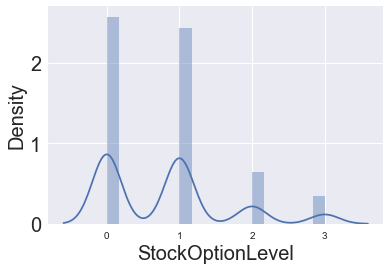

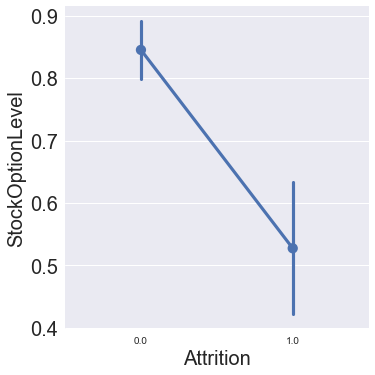

In [100]:
#StockOptionLevel

sns.distplot(data['StockOptionLevel'])
print(data.groupby('Attrition')[['StockOptionLevel']].agg(['count', 'max', 'min', 'mean', 'median']))
sns.factorplot('Attrition', 'StockOptionLevel', data=data) 

#Attrion 과 stockoptionlevel 은 음의 상관관계 

- Monthly Rate, DailyRate, HoulryRate는 분포도 비슷하며, Attrion에 크게 영향을 미치지 않아보임 
- Monthly Income과 Attrition은 음의 상관관계 
- DistanceFromHome과 Attrition은 양의 상관관계 
- stockoptionlevel과 Attrion은 음의 상관관계 
- PercentSalaryHike 는 Attrition과 영향을 미치지 않지만 핵심인재의 지표로 사용가능(?)

## 핵심인재

In [101]:
#연속형 변수 범주형 변수로 바꿔줌 
data['Rate_range'] = pd.qcut(data['MonthlyRate'], q=4, labels=[1,2,3,4])
data['Income_range'] = pd.qcut(data['MonthlyIncome'], q=4,labels=[1,2,3,4])
data['SalaryHike_range'] = pd.qcut(data['PercentSalaryHike'], q=4,labels=[1,2,3,4])
data['HomeDistance_range'] = pd.qcut(data['DistanceFromHome'], q=4, labels=[1,2,3,4])

data['Rate_range']=data['Rate_range'].astype('int')
data['Income_range']=data['Income_range'].astype('int')
data['SalaryHike_range']=data['SalaryHike_range'].astype('int')
data['HomeDistance_range']=data['HomeDistance_range'].astype('int')


In [102]:
data_talent = data[data['SalaryHike_range']==4]
data_normal = data[data['SalaryHike_range'].isin([1,2,3])]

data_talent_근속년수 평균 : 6.824503311258278
data_normal_근속년수 평균 : 7.055650684931507


          YearsAtCompany                         
                   count max min      mean median
Attrition                                        
0.0                  256  36   0  7.316406    5.5
1.0                   46  15   0  4.086957    3.0


          YearsAtCompany                         
                   count max min      mean median
Attrition                                        
0.0                  977  37   0  7.382805      6
1.0                  191  40   0  5.382199      4


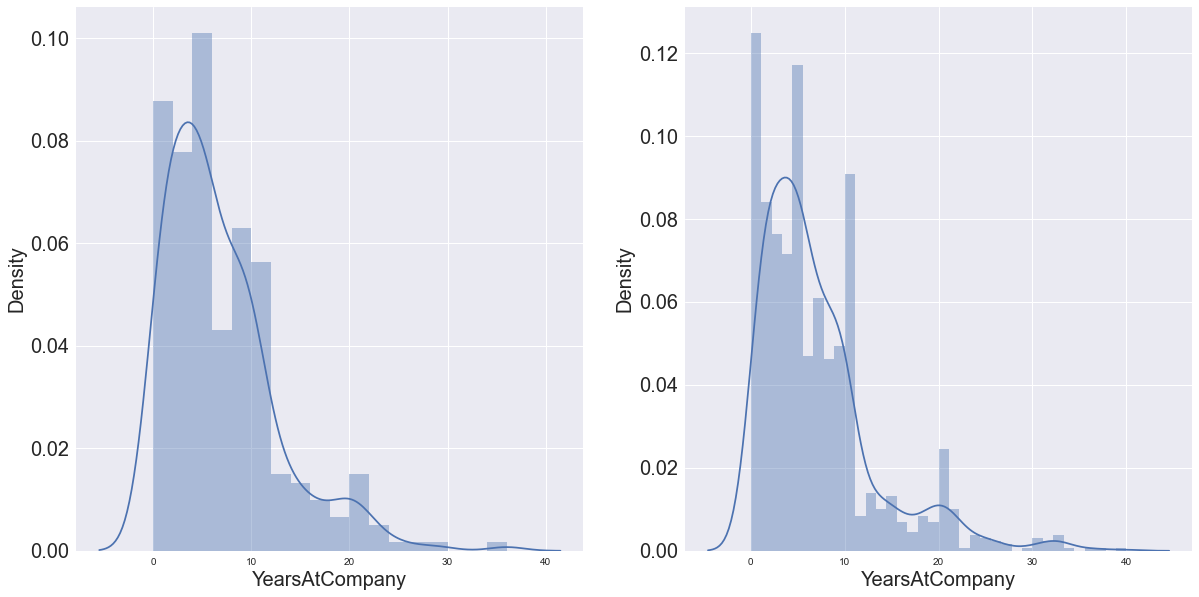

In [103]:
#우선 신입사원이라 임금 상승률이 높은 것인지 확인
f, ax = plt.subplots(1,2, figsize=(20,10))

sns.distplot(data_talent['YearsAtCompany'],ax=ax[0])
sns.distplot(data_normal['YearsAtCompany'],ax=ax[1])

print("data_talent_근속년수 평균 :", data_talent['YearsAtCompany'].mean())
print("data_normal_근속년수 평균 :", data_normal['YearsAtCompany'].mean())
print("\n")
print(data_talent.groupby('Attrition')[['YearsAtCompany']].agg(['count', 'max', 'min', 'mean', 'median']))
print("\n")
print(data_normal.groupby('Attrition')[['YearsAtCompany']].agg(['count', 'max', 'min', 'mean', 'median']))

<AxesSubplot:ylabel='Attrition'>

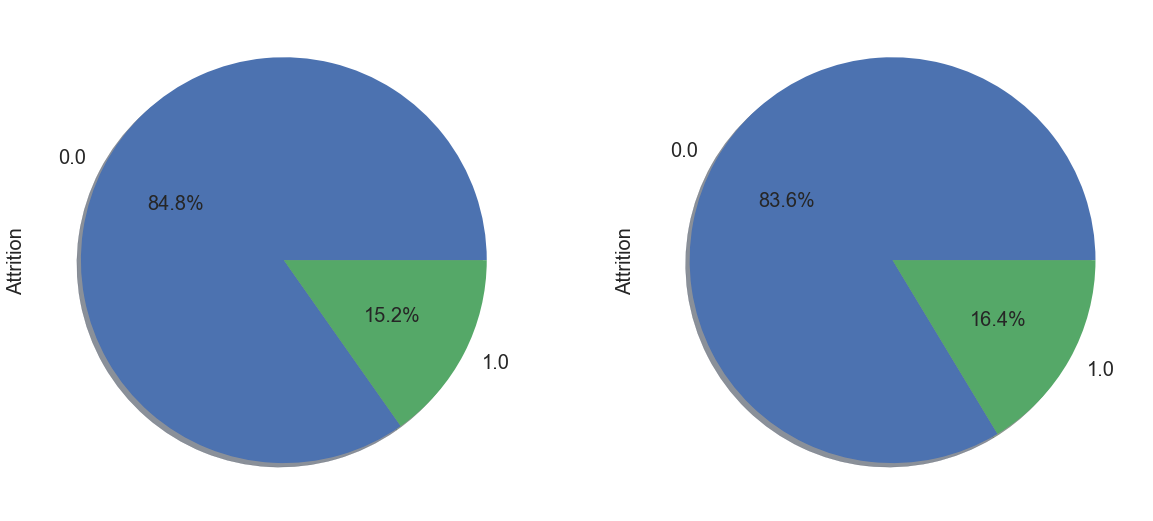

In [104]:
#퇴사율 자체는 비슷하다.
f, ax = plt.subplots(1,2, figsize=(20,20))
data_talent['Attrition'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, fontsize=20)
data_normal['Attrition'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True, fontsize=20)

In [105]:
data_talent["OverTime"].unique()

array(['No', 'Yes'], dtype=object)

In [106]:
data_talent["OverTime"].replace("Yes", 1, inplace=True)
data_talent["OverTime"].replace("No", 0, inplace=True)
data_normal["OverTime"].replace("Yes", 1, inplace=True)
data_normal["OverTime"].replace("No", 0, inplace=True)

In [107]:
data_talent['OverTime'].unique()

array([0, 1])

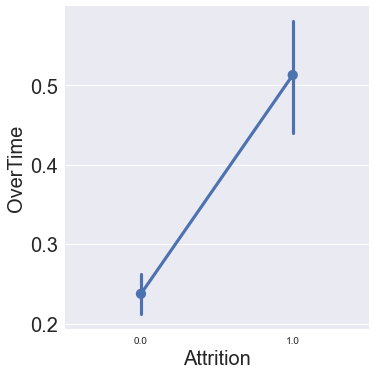

In [108]:
sns.factorplot('Attrition','OverTime',data=data_normal)
plt.show()

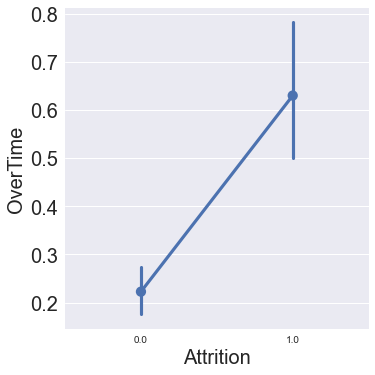

In [109]:
sns.factorplot('Attrition','OverTime',data=data_talent)
plt.show()

          OverTime                         
             count max min      mean median
Attrition                                  
0.0            256   1   0  0.222656      0
1.0             46   1   0  0.630435      1
          OverTime                         
             count max min      mean median
Attrition                                  
0.0            977   1   0  0.237462      0
1.0            191   1   0  0.513089      1


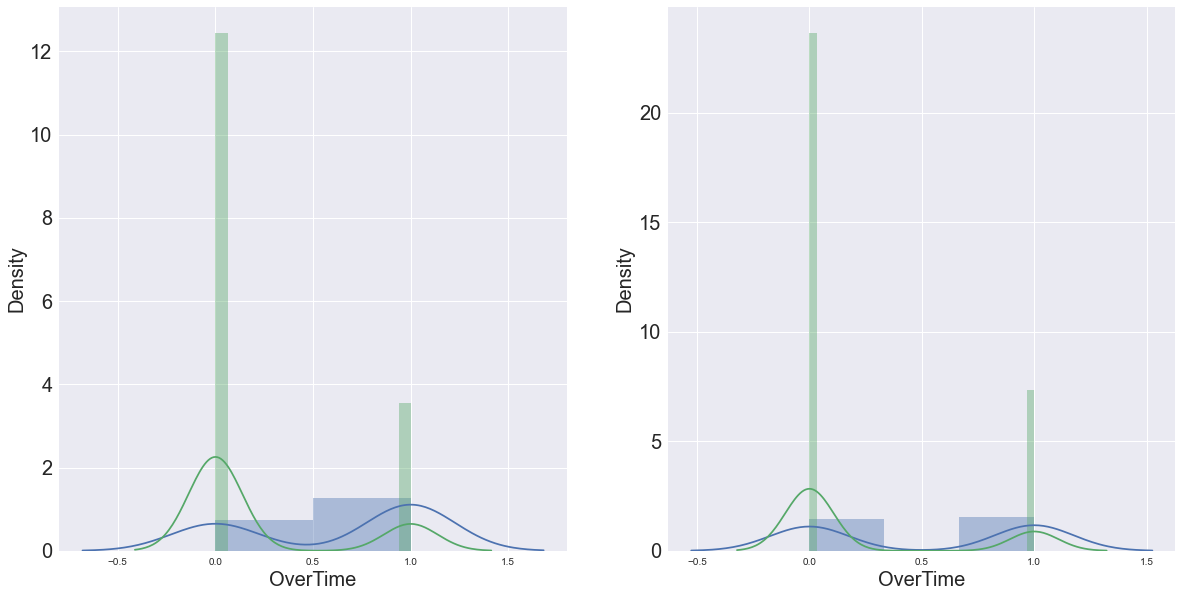

In [110]:
f, ax = plt.subplots(1,2, figsize=(20,10))

sns.distplot(data_talent[data_talent['Attrition']==1]['OverTime'],ax=ax[0])
sns.distplot(data_talent[data_talent['Attrition']==0]['OverTime'],ax=ax[0])

sns.distplot(data_normal[data_normal['Attrition']==1]['OverTime'],ax=ax[1])
sns.distplot(data_normal[data_normal['Attrition']==0]['OverTime'],ax=ax[1])

print(data_talent.groupby('Attrition')[['OverTime']].agg(['count', 'max', 'min', 'mean', 'median']))
print(data_normal.groupby('Attrition')[['OverTime']].agg(['count', 'max', 'min', 'mean', 'median']))

In [111]:
data_talent['StockOptionLevel'].unique()

array([1, 3, 0, 2])

          StockOptionLevel                         
                     count max min      mean median
Attrition                                          
0.0                    256   3   0  0.871094      1
1.0                     46   3   0  0.434783      0
          StockOptionLevel                         
                     count max min      mean median
Attrition                                          
0.0                    977   3   0  0.838280      1
1.0                    191   3   0  0.549738      0


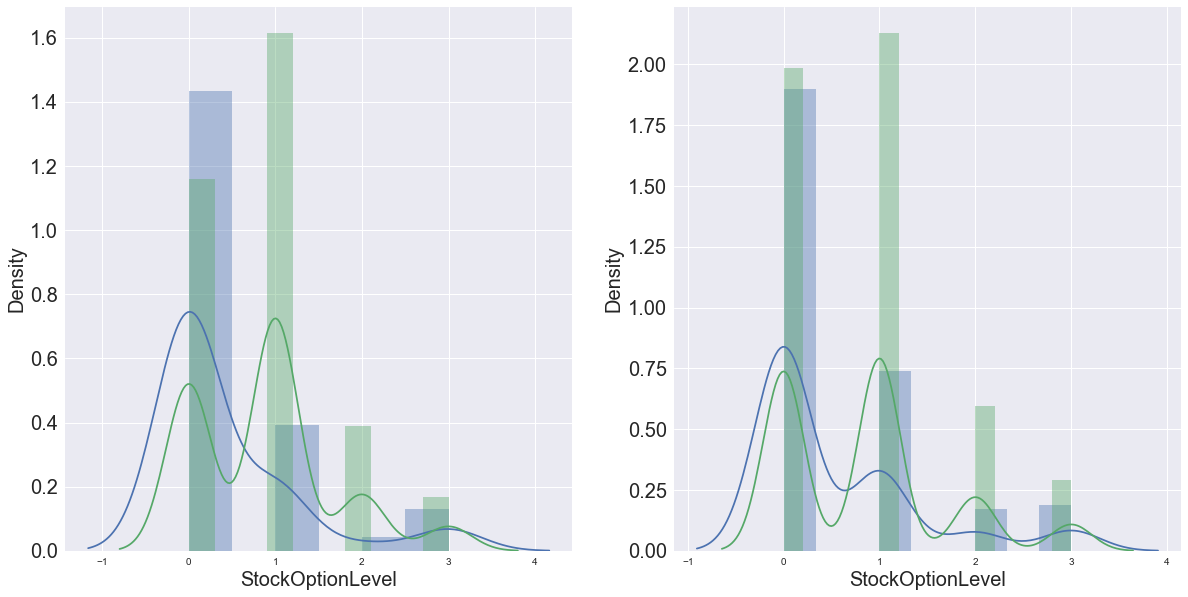

In [112]:
f, ax = plt.subplots(1,2, figsize=(20,10))

sns.distplot(data_talent[data_talent['Attrition']==1]['StockOptionLevel'],ax=ax[0])
sns.distplot(data_talent[data_talent['Attrition']==0]['StockOptionLevel'],ax=ax[0])

sns.distplot(data_normal[data_normal['Attrition']==1]['StockOptionLevel'],ax=ax[1])
sns.distplot(data_normal[data_normal['Attrition']==0]['StockOptionLevel'],ax=ax[1])

print(data_talent.groupby('Attrition')[['StockOptionLevel']].agg(['count', 'max', 'min', 'mean', 'median'])) #0.42
print(data_normal.groupby('Attrition')[['StockOptionLevel']].agg(['count', 'max', 'min', 'mean', 'median'])) #0.31

In [113]:
data_talent['WorkLifeBalance'].unique()

array([3, 2, 1, 4])

          WorkLifeBalance                         
                    count max min      mean median
Attrition                                         
0.0                   256   4   1  2.777344      3
1.0                    46   4   1  2.739130      3
          WorkLifeBalance                         
                    count max min      mean median
Attrition                                         
0.0                   977   4   1  2.781986      3
1.0                   191   4   1  2.638743      3


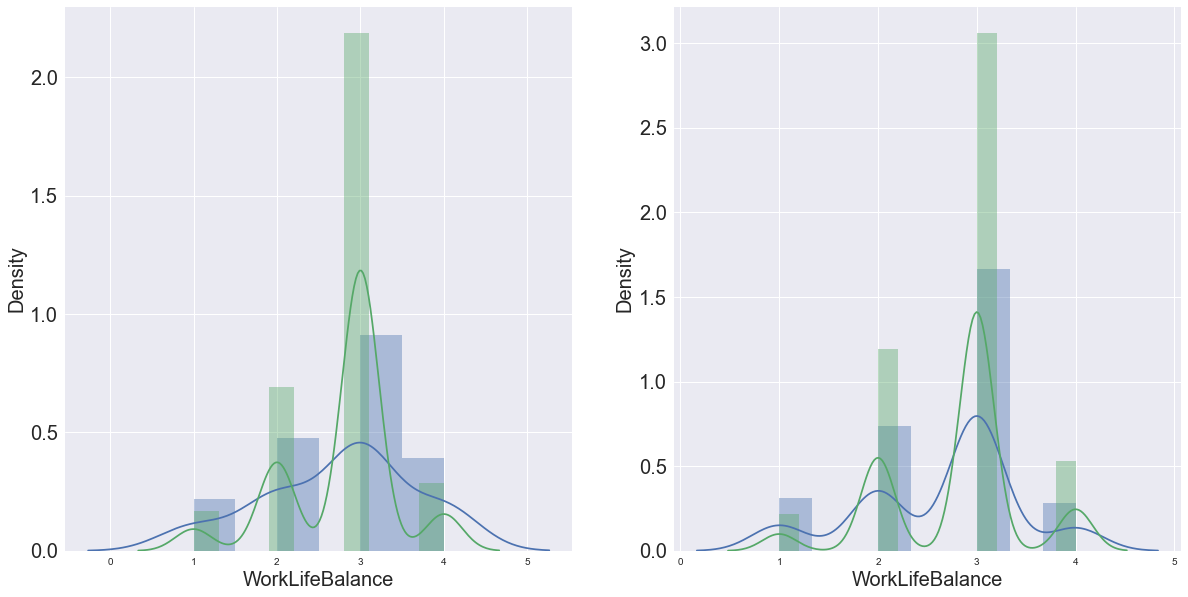

In [114]:
f, ax = plt.subplots(1,2, figsize=(20,10))

sns.distplot(data_talent[data_talent['Attrition']==1]['WorkLifeBalance'],ax=ax[0])
sns.distplot(data_talent[data_talent['Attrition']==0]['WorkLifeBalance'],ax=ax[0])

sns.distplot(data_normal[data_normal['Attrition']==1]['WorkLifeBalance'],ax=ax[1])
sns.distplot(data_normal[data_normal['Attrition']==0]['WorkLifeBalance'],ax=ax[1])

print(data_talent.groupby('Attrition')[['WorkLifeBalance']].agg(['count', 'max', 'min', 'mean', 'median'])) 
print(data_normal.groupby('Attrition')[['WorkLifeBalance']].agg(['count', 'max', 'min', 'mean', 'median']))

          StockOptionLevel                         
                     count max min      mean median
Attrition                                          
0.0                    256   3   0  0.871094      1
1.0                     46   3   0  0.434783      0
          StockOptionLevel                         
                     count max min      mean median
Attrition                                          
0.0                    977   3   0  0.838280      1
1.0                    191   3   0  0.549738      0


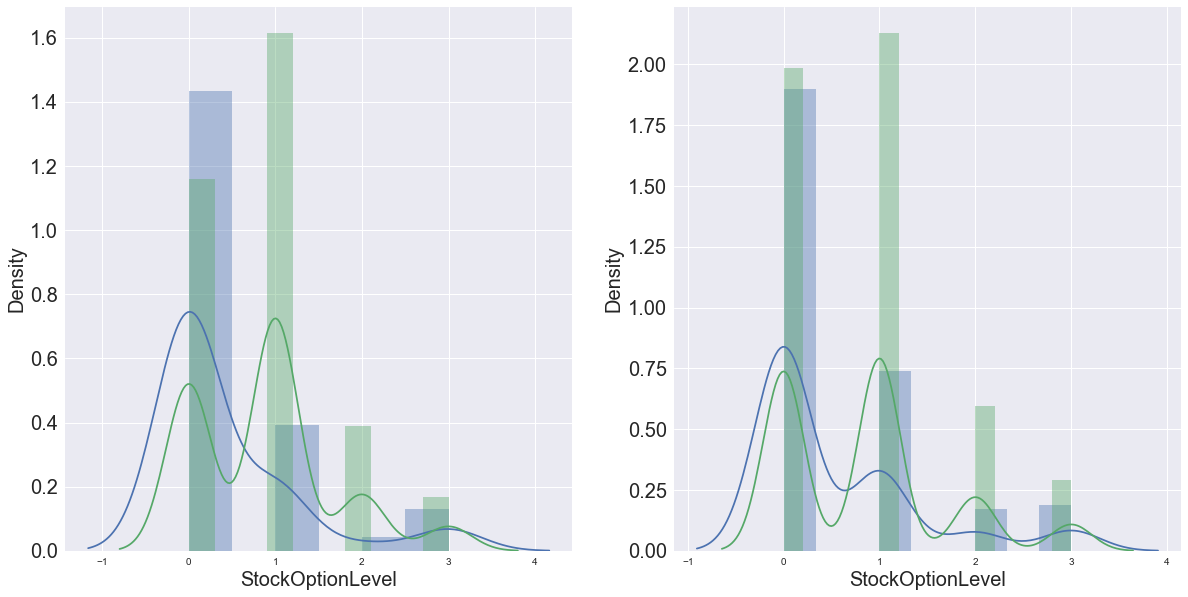

In [115]:
f, ax = plt.subplots(1,2, figsize=(20,10))

sns.distplot(data_talent[data_talent['Attrition']==1]['StockOptionLevel'],ax=ax[0])
sns.distplot(data_talent[data_talent['Attrition']==0]['StockOptionLevel'],ax=ax[0])

sns.distplot(data_normal[data_normal['Attrition']==1]['StockOptionLevel'],ax=ax[1])
sns.distplot(data_normal[data_normal['Attrition']==0]['StockOptionLevel'],ax=ax[1])

print(data_talent.groupby('Attrition')[['StockOptionLevel']].agg(['count', 'max', 'min', 'mean', 'median']))
print(data_normal.groupby('Attrition')[['StockOptionLevel']].agg(['count', 'max', 'min', 'mean', 'median']))

- 핵심인재 그룹에서는 퇴사 vs 안퇴사 간의 Stockoptionlevel mean 차이가 0.44
- 아닌 그룹에서는 mean 차이가 0.29
- 임금인상률이 높은 그룹에서 Stockoptionlevel 을 이직 이유로 더 고려함을 알 수 있다. 

          HomeDistance_range                         
                       count max min      mean median
Attrition                                            
0.0                      256   4   1  2.351562      2
1.0                       46   4   1  2.869565      3


          HomeDistance_range                         
                       count max min      mean median
Attrition                                            
0.0                      977   4   1  2.399181      2
1.0                      191   4   1  2.581152      3


<AxesSubplot:xlabel='HomeDistance_range', ylabel='Density'>

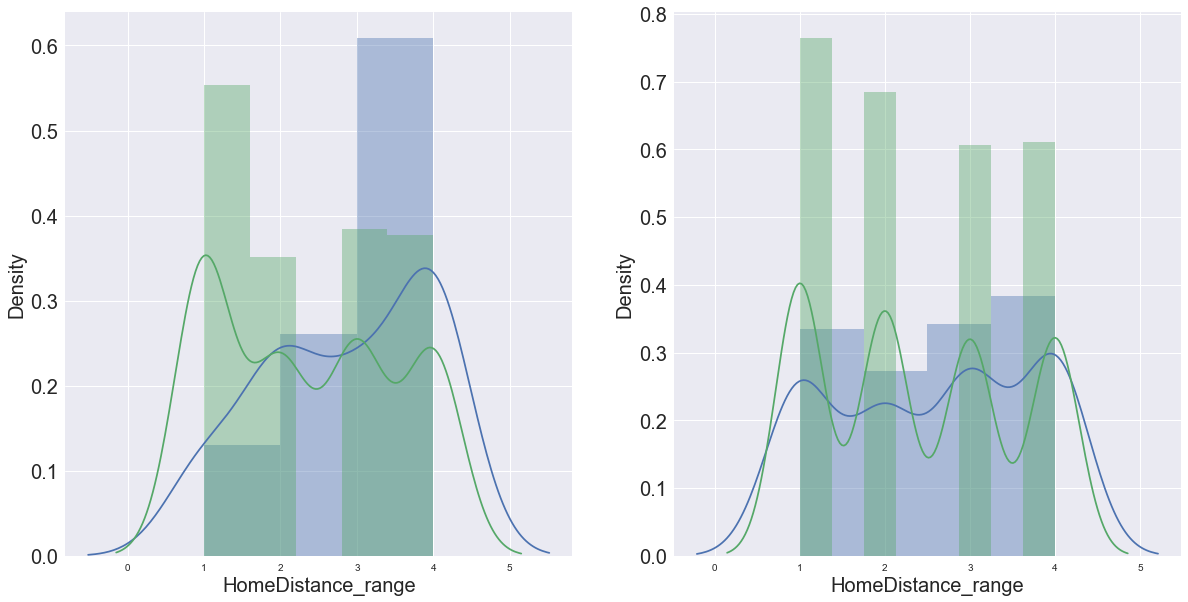

In [116]:
data_talent['HomeDistance_range']= data_talent['HomeDistance_range'].astype(int)
data_normal['HomeDistance_range']= data_normal['HomeDistance_range'].astype(int)

print(data_talent.groupby('Attrition')[['HomeDistance_range']].agg(['count', 'max', 'min', 'mean', 'median']))
print('\n')
print(data_normal.groupby('Attrition')[['HomeDistance_range']].agg(['count', 'max', 'min', 'mean', 'median']))

f, ax = plt.subplots(1,2, figsize=(20,10))
sns.distplot(data_talent[data_talent['Attrition']==1]['HomeDistance_range'],ax=ax[0])
sns.distplot(data_talent[data_talent['Attrition']==0]['HomeDistance_range'],ax=ax[0])

sns.distplot(data_normal[data_normal['Attrition']==1]['HomeDistance_range'],ax=ax[1])
sns.distplot(data_normal[data_normal['Attrition']==0]['HomeDistance_range'],ax=ax[1])

          Income_range                         
                 count max min      mean median
Attrition                                      
0.0                256   4   1  2.570312      3
1.0                 46   4   1  1.739130      1


          Income_range                         
                 count max min      mean median
Attrition                                      
0.0                977   4   1  2.594678      3
1.0                191   4   1  2.099476      2


<AxesSubplot:xlabel='Income_range', ylabel='Density'>

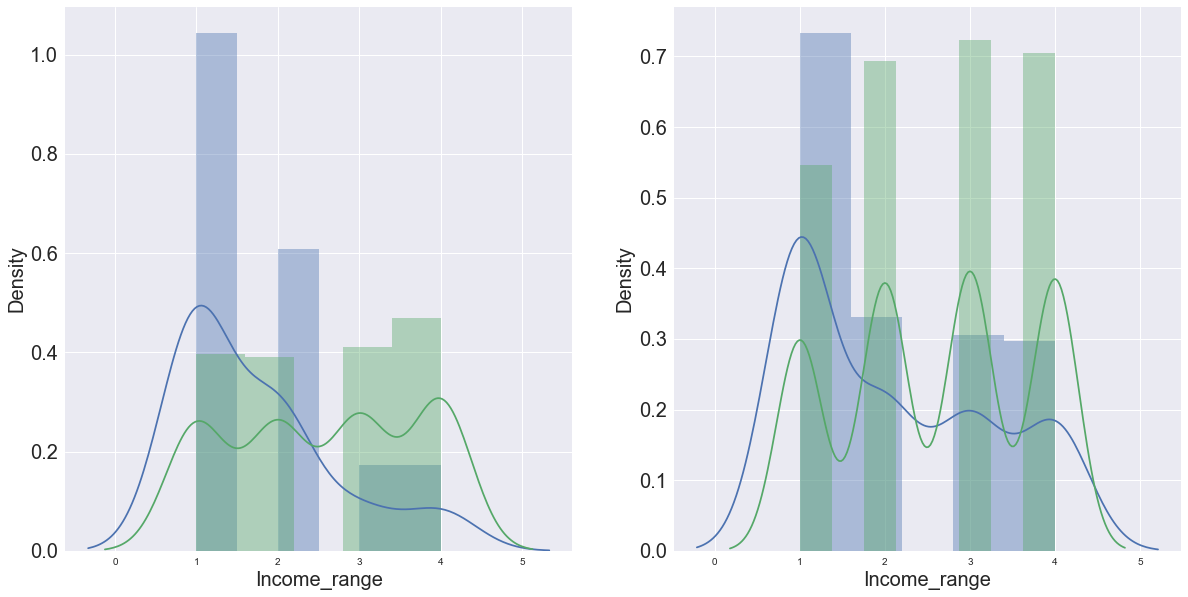

In [117]:
#똑같은 방법으로 Monthly income range 

data_talent['Income_range']= data_talent['Income_range'].astype(int)
data_normal['Income_range']= data_normal['Income_range'].astype(int)

print(data_talent.groupby('Attrition')[['Income_range']].agg(['count', 'max', 'min', 'mean', 'median']))
print('\n')
print(data_normal.groupby('Attrition')[['Income_range']].agg(['count', 'max', 'min', 'mean', 'median']))
 
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.distplot(data_talent[data_talent['Attrition']==1]['Income_range'],ax=ax[0])
sns.distplot(data_talent[data_talent['Attrition']==0]['Income_range'],ax=ax[0])

sns.distplot(data_normal[data_normal['Attrition']==1]['Income_range'],ax=ax[1])
sns.distplot(data_normal[data_normal['Attrition']==0]['Income_range'],ax=ax[1])

## Department

In [118]:
data.groupby(['Department','Attrition'])['Attrition'].count().to_frame()

Attrition
Department             Attrition           
Human Resources        0.0               51
                       1.0               12
Research & Development 0.0              828
                       1.0              133
Sales                  0.0              354
                       1.0               92

In [119]:
data.groupby(['Department','Gender'])['Gender'].count().to_frame()

Gender
Department             Gender        
Human Resources        Female      20
                       Male        43
Research & Development Female     379
                       Male       582
Sales                  Female     189
                       Male       257

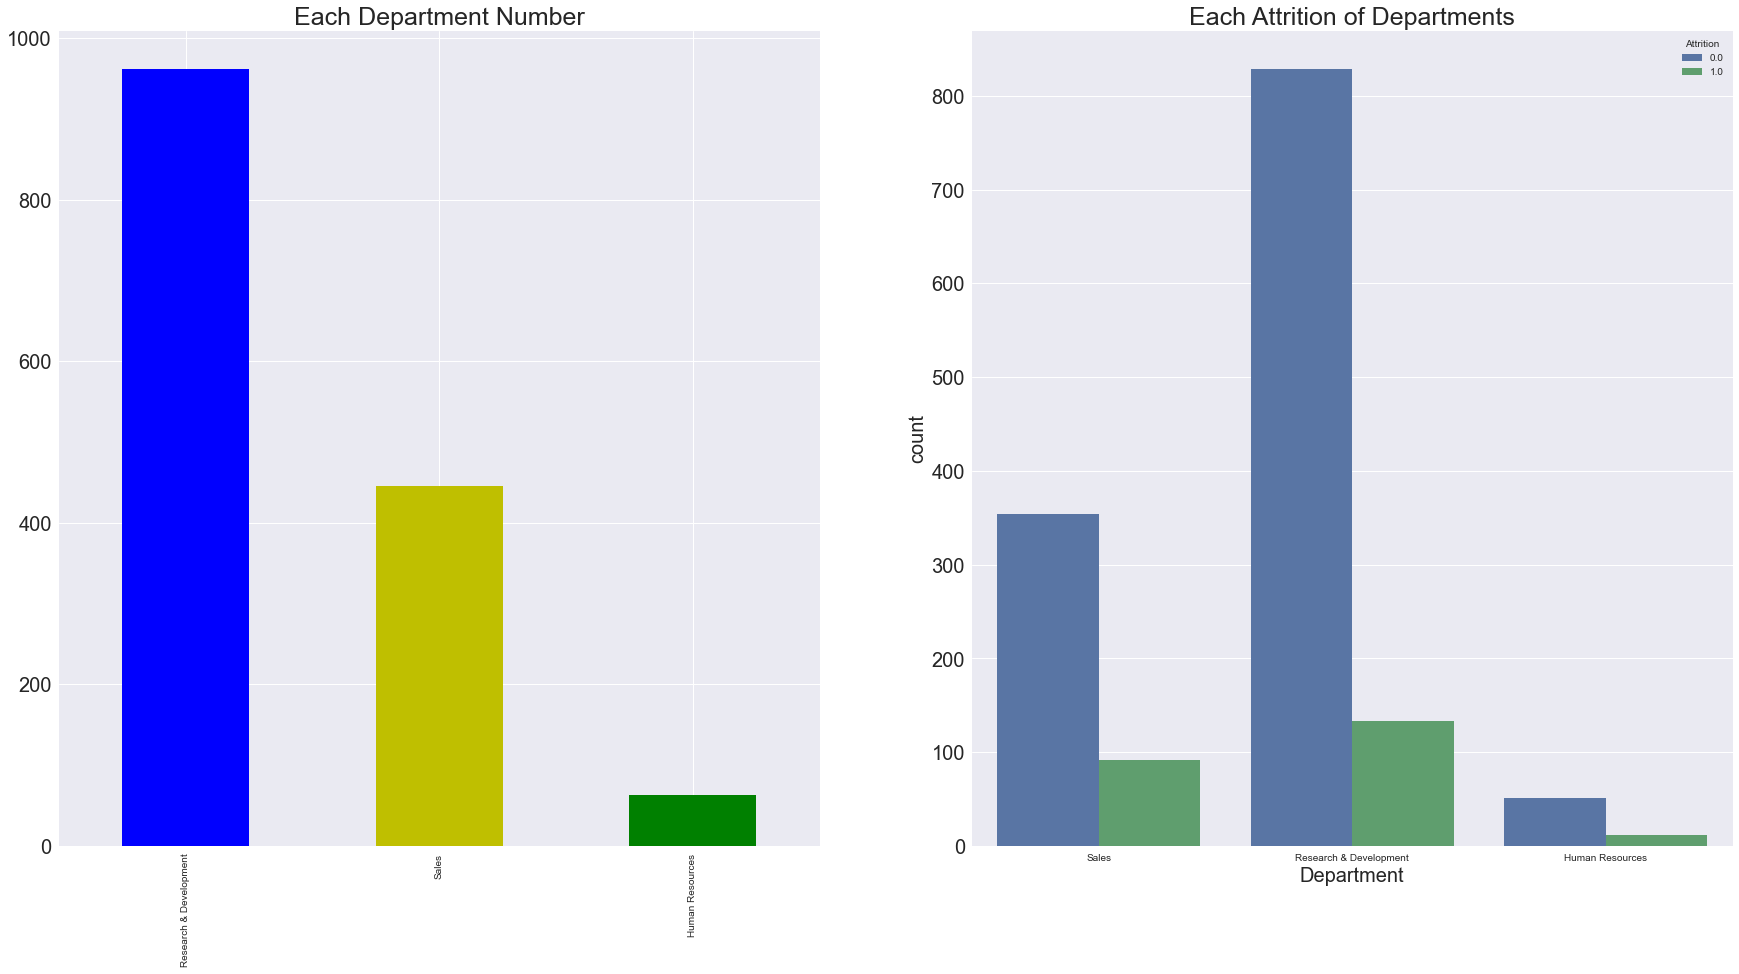

In [120]:
f, ax = plt.subplots(1,2, figsize=(30,15))


data["Department"].value_counts().plot.bar(ax=ax[0],
                                          color=['b','y','g'])
ax[0].set_title("Each Department Number")

sns.countplot('Department', hue="Attrition", data=data, ax=ax[1])
ax[1].set_title("Each Attrition of Departments")
plt.show()

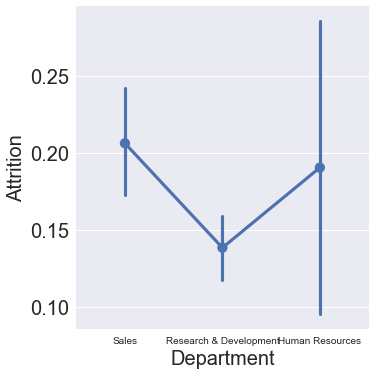

In [121]:
sns.factorplot('Department','Attrition', data=data)
plt.show()

 HumanResources = 20%<br>
 Research & Development= 13.83%<br>
 Sales = 20%<br>
 <br>
 Research & Development는 평균 퇴직 비율에 비해 3% 작고
 HumanResources와 Sales 부서는 평균 퇴직 비율에 비해 4% 높게 나타난다.

## BusinessTravel

In [122]:
data["BusinessTravel"].value_counts().to_frame()

BusinessTravel
Travel_Rarely                1043
Travel_Frequently             277
Non-Travel                    150

In [123]:
data.groupby(['BusinessTravel','Attrition'])['Attrition'].count().to_frame()

Attrition
BusinessTravel    Attrition           
Non-Travel        0.0              138
                  1.0               12
Travel_Frequently 0.0              208
                  1.0               69
Travel_Rarely     0.0              887
                  1.0              156

In [124]:
data.groupby(['BusinessTravel','Department'])['Department'].count().to_frame()

Department
BusinessTravel    Department                        
Non-Travel        Human Resources                  6
                  Research & Development          97
                  Sales                           47
Travel_Frequently Human Resources                 11
                  Research & Development         182
                  Sales                           84
Travel_Rarely     Human Resources                 46
                  Research & Development         682
                  Sales                          315

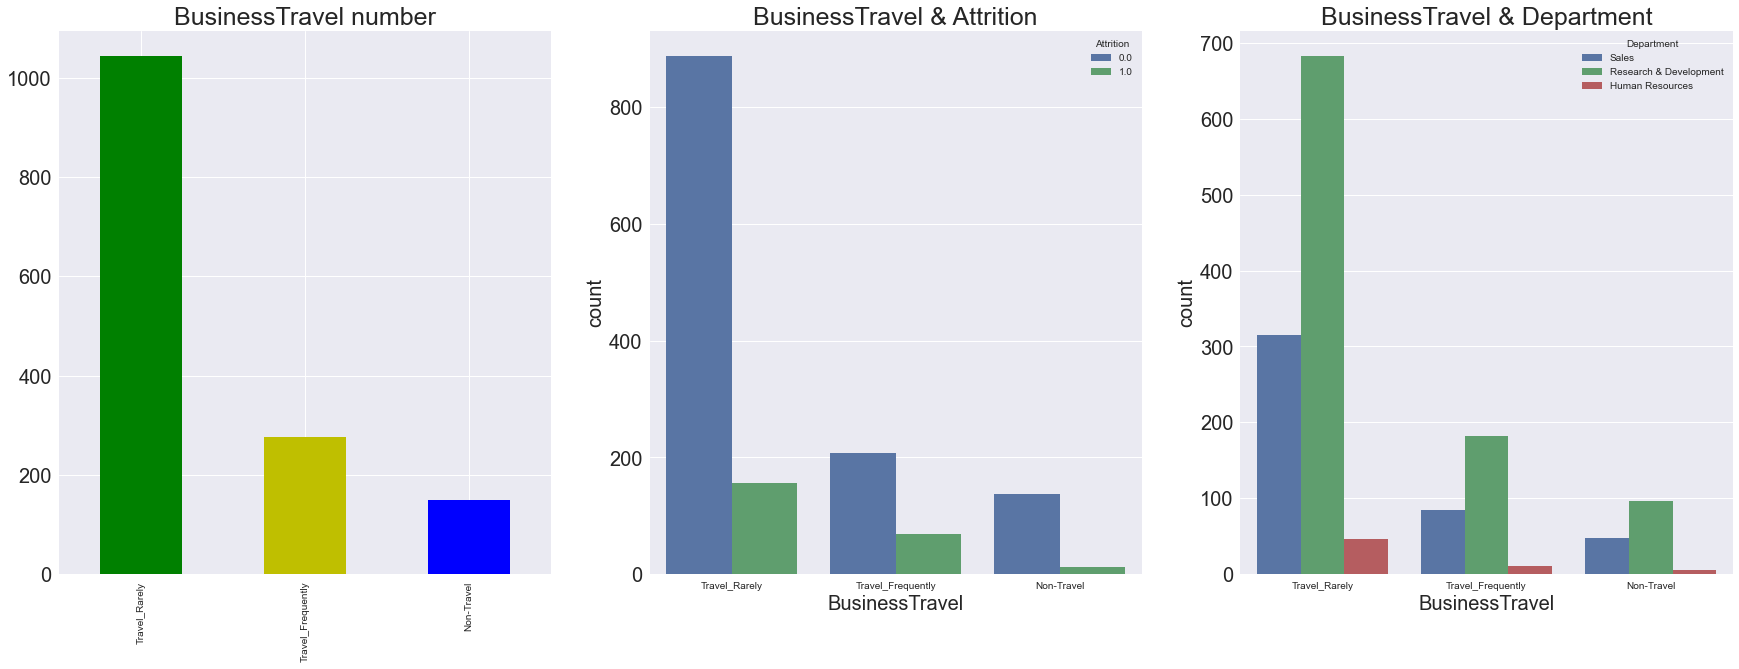

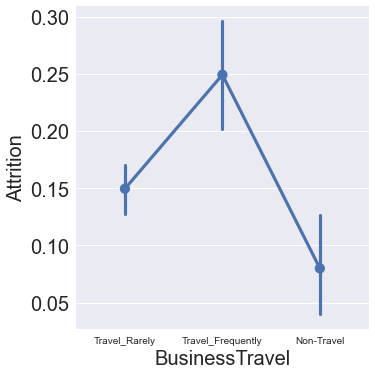

In [125]:
f, ax = plt.subplots(1,3,figsize=(30,10))

data['BusinessTravel'].value_counts().plot.bar(ax=ax[0], color=['g','y','b'])
ax[0].set_title("BusinessTravel number")

sns.countplot('BusinessTravel',hue='Attrition', data=data, ax=ax[1])
ax[1].set_title("BusinessTravel & Attrition")

sns.countplot('BusinessTravel',hue='Department', data=data, ax=ax[2])
ax[2].set_title("BusinessTravel & Department")

sns.factorplot('BusinessTravel', 'Attrition', data=data)
plt.show()

In [126]:
ResearchDevelopment0=97/961
ResearchDevelopment1=682/961
ResearchDevelopment2=97/961

Sales0=47/446
Sales1=315/446
Sales2=84/446

HumanResource0=6/63
HumanResource1=46/63
HumanResource2=11/63

print("Research&Development: ", ResearchDevelopment0,
     ResearchDevelopment1, ResearchDevelopment2)
print("Sales: ", Sales0, Sales1,Sales2)
print("Human Resource:",HumanResource0,HumanResource1,
     HumanResource2)

Research&Development:  0.10093652445369407 0.7096774193548387 0.10093652445369407
Sales:  0.10538116591928251 0.7062780269058296 0.18834080717488788
Human Resource: 0.09523809523809523 0.7301587301587301 0.1746031746031746


출장이 빈번한 이들의 퇴사 비율이 25%로 가장 낮았으며, 출장이 전혀 없는 직장이 약 10%미만의 비율을 보이고 있다. 

업무별로 출장비율을 보았을 때, Sales, Human Resource의 출장빈도가 가장 높은 이들이 각각 18.8%, 17.46%를 차지 반면에 R&D는 10.09% 차지

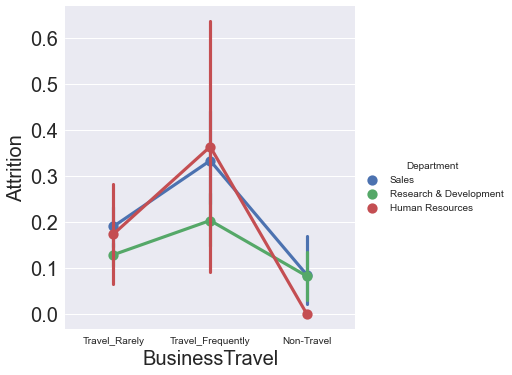

In [127]:
# 업무별로 출장회수에 따른 퇴직자의 비율 
sns.factorplot('BusinessTravel', 'Attrition', hue='Department', data=data)
plt.show()

sales, Human Resources에서 유의미한 차이가 발생.<br> 출장이 빈번한 이즉의 퇴사율이 30% 가량으로 평균의 약 2배 수준.<br>

## JobInvolvement

In [128]:
data['JobInvolvement'].value_counts().to_frame()

JobInvolvement
3             868
2             375
4             144
1              83

Text(0.5, 1.0, 'JobInvolvement & BusinessTravel')

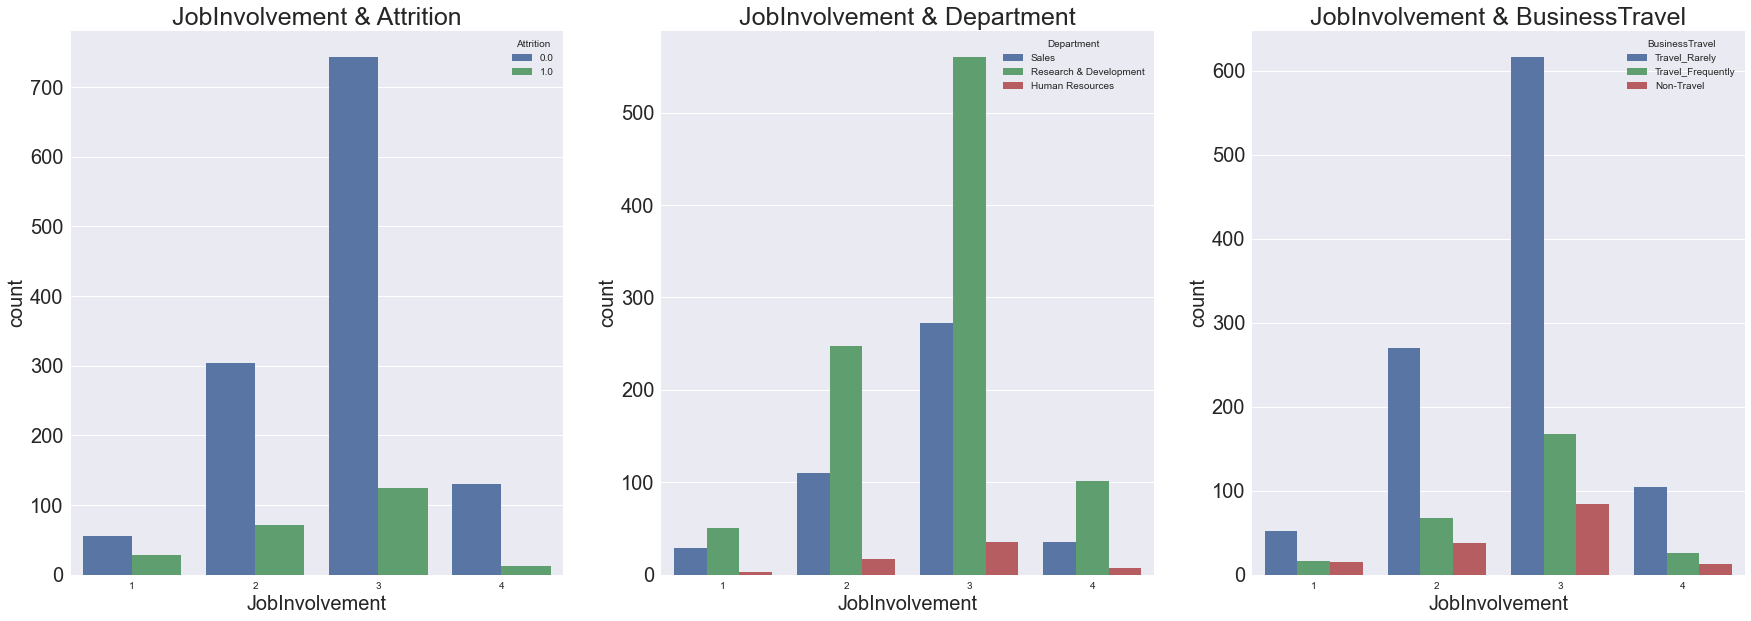

In [129]:
f, ax = plt.subplots(1,3,figsize=(30,10))

sns.countplot('JobInvolvement', hue="Attrition", data=data,ax=ax[0])
ax[0].set_title('JobInvolvement & Attrition')

sns.countplot('JobInvolvement', hue="Department", data=data,ax=ax[1])
ax[1].set_title('JobInvolvement & Department') 

sns.countplot('JobInvolvement', hue="BusinessTravel", data=data,ax=ax[2])
ax[2].set_title('JobInvolvement & BusinessTravel') # 비율이 일정.

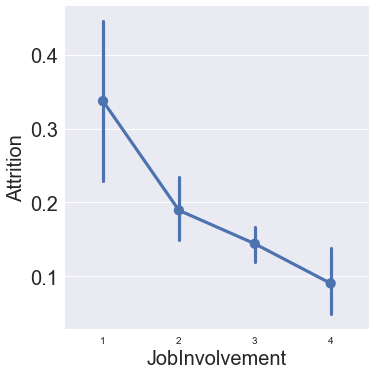

In [130]:
sns.factorplot('JobInvolvement', 'Attrition', data=data)
plt.show()

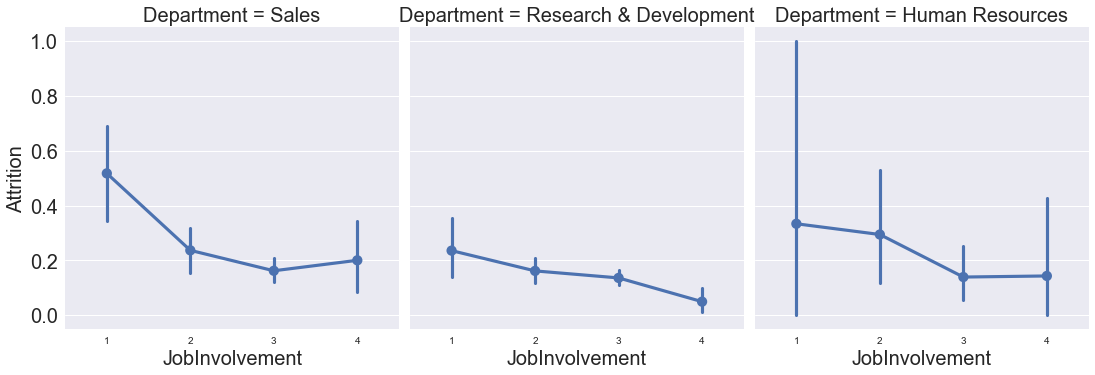

In [131]:
sns.factorplot('JobInvolvement', 'Attrition',col="Department", data=data)
plt.show() 

sales부분에서 차이가 심하게 나타남. 평균적으로 직업적 연관성이 적을수록 평균 퇴사 비율이 16%보다 높게 나타난다.

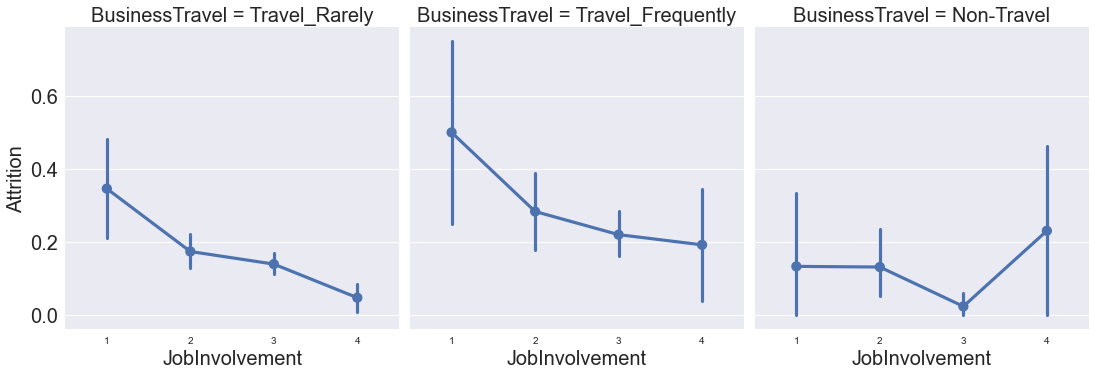

In [132]:
sns.factorplot('JobInvolvement', 'Attrition',col="BusinessTravel", data=data)
plt.show() 

출장이 드문 경우, 직업 연관성이 적을수록 퇴사자 비율이 높다<br>
출장이 빈번한 경우, 직업 연관성이 적을수록 퇴사자 비율이 높다.<br>
출장이 없는 경우에는 유의미한 차이가 없다. <br>
직업연관성이 적고 출장빈도가 높으면 높을수록 퇴사 비율이 증가함을 알 수 있다. 

## JobLevel (직무수준)

In [133]:
data["JobLevel"].value_counts().to_frame()

JobLevel
1       543
2       534
3       218
4       106
5        69

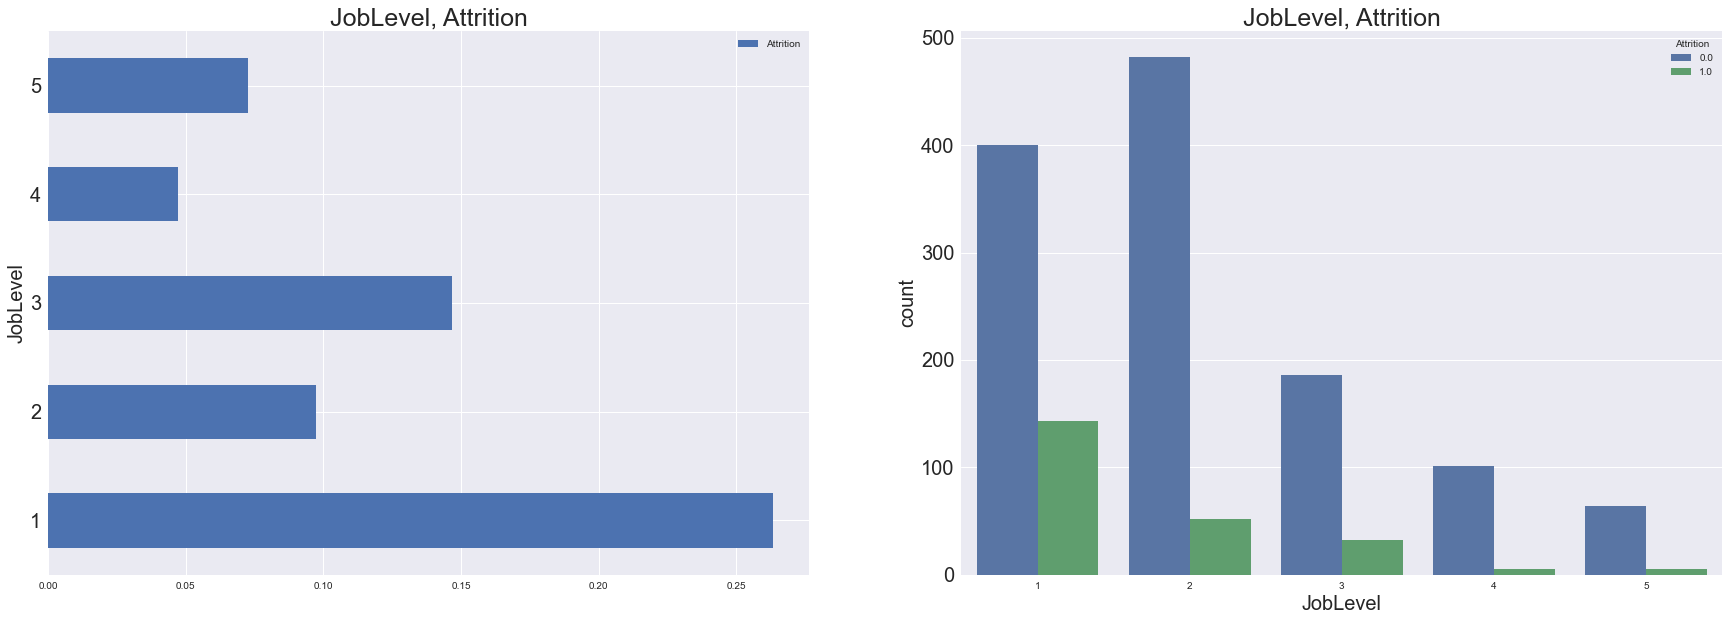

In [134]:
f, ax = plt.subplots(1,2,figsize=(30,10))

data[['Attrition','JobLevel']].groupby(['JobLevel']).mean().plot.barh(ax=ax[0]) 
ax[0].set_title('JobLevel, Attrition') 

sns.countplot('JobLevel', hue="Attrition", data=data, ax=ax[1])
ax[1].set_title("JobLevel, Attrition")
plt.show()

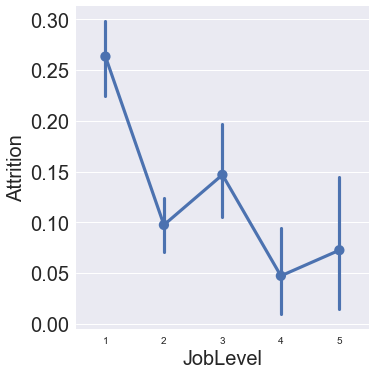

In [135]:
sns.factorplot('JobLevel', 'Attrition', data=data)
plt.show() 

JobLevel 이 낮은 경우 퇴사율이 유의미한 차이를 보이고 있다. <br>

In [136]:
data.groupby(['BusinessTravel','JobLevel'])['JobLevel'].count().to_frame()

JobLevel
BusinessTravel    JobLevel          
Non-Travel        1               48
                  2               67
                  3               20
                  4               11
                  5                4
Travel_Frequently 1              104
                  2              104
                  3               40
                  4               19
                  5               10
Travel_Rarely     1              391
                  2              363
                  3              158
                  4               76
                  5               55

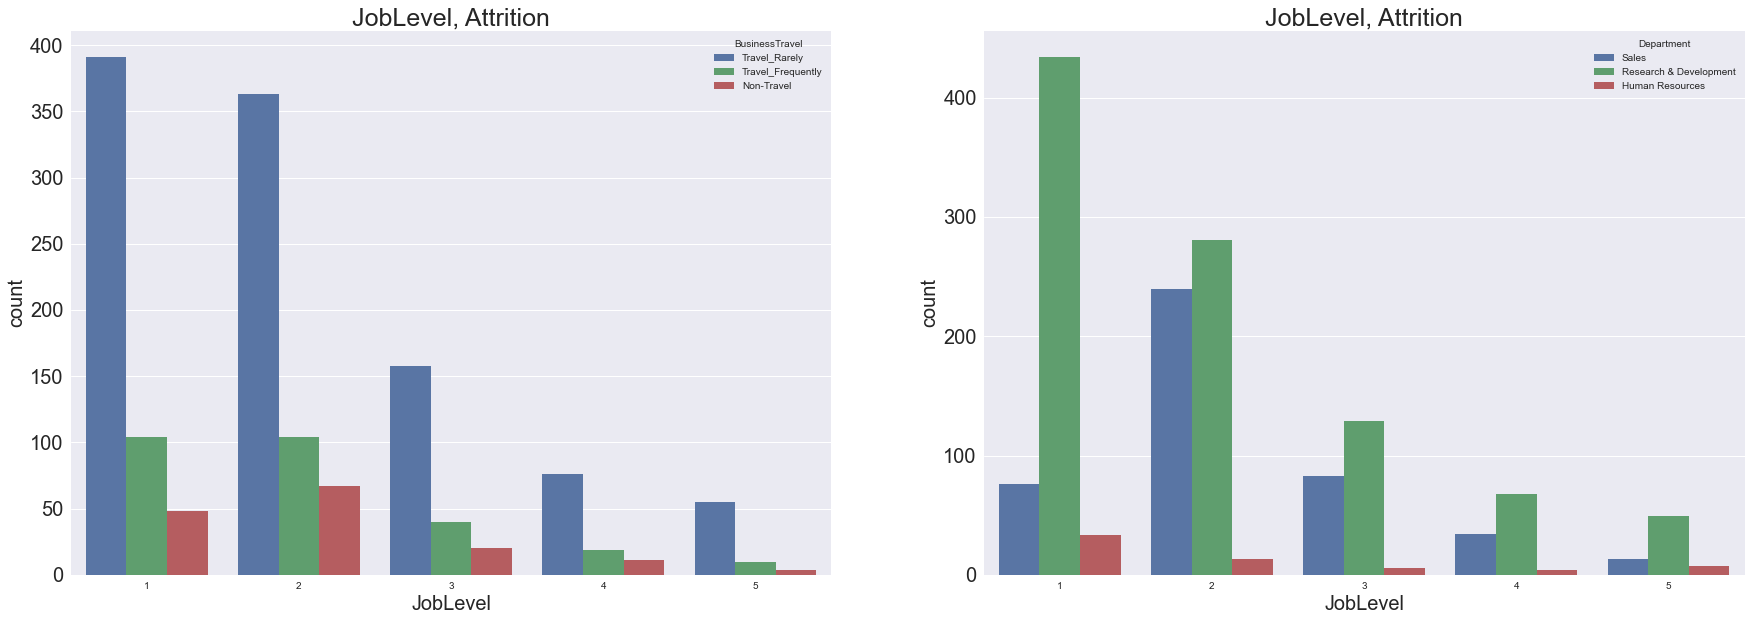

In [137]:
f, ax = plt.subplots(1,2,figsize=(30,10))

sns.countplot('JobLevel', hue="BusinessTravel", data=data, ax=ax[0])
ax[0].set_title("JobLevel, Attrition")


sns.countplot('JobLevel', hue="Department", data=data, ax=ax[1])
ax[1].set_title("JobLevel, Attrition")
plt.show()


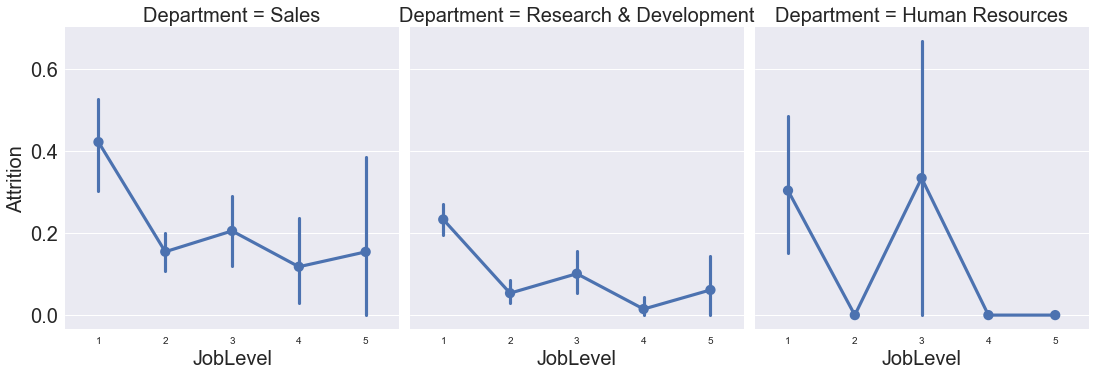

In [138]:
sns.factorplot('JobLevel', 'Attrition',col="Department", data=data)
plt.show() 

모든 부서에서 JobLevel이 1인 경우 퇴사율이 낮으며, 특이점으로 Human Resources에서는 3의 JobLevel에서 1과 유사한 정도의 퇴사율이 나타나고 있다. <br>
출장의 빈도는 모든 직종과 직업 지위에 따라 유사한 변화를 보이고 있다. 

## JobRole (직무역할)

In [139]:
data["JobRole"].value_counts().to_frame()

JobRole
Sales Executive                326
Research Scientist             292
Laboratory Technician          259
Manufacturing Director         145
Healthcare Representative      131
Manager                        102
Sales Representative            83
Research Director               80
Human Resources                 52

In [140]:
data.groupby(['JobRole','Department'])['Department'].count().to_frame()

Department
JobRole                   Department                        
Healthcare Representative Research & Development         131
Human Resources           Human Resources                 52
Laboratory Technician     Research & Development         259
Manager                   Human Resources                 11
                          Research & Development          54
                          Sales                           37
Manufacturing Director    Research & Development         145
Research Director         Research & Development          80
Research Scientist        Research & Development         292
Sales Executive           Sales                          326
Sales Representative      Sales                           83

Sales=[Sales Executive, Sales Representative, Manager ]<br>
Research & Development =[Research Director,Research Scientist, Laboratory Technician, Manufacturing Director ,
                           Healthcare Representative ,Manager ]<br>
Human Resources =[Human Resources ,Manager]<br>

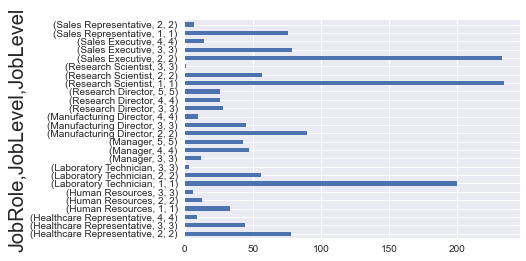

In [141]:
data.groupby(['JobRole','JobLevel'])['JobLevel'].value_counts().plot.barh()
plt.yticks(size=10)
plt.show()

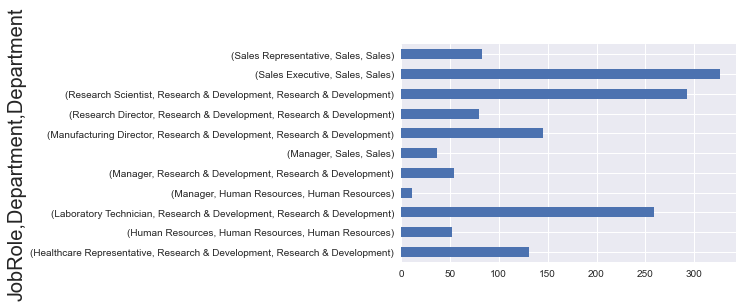

In [142]:
data.groupby(['JobRole','Department'])['Department'].value_counts().plot.barh()
plt.yticks(size=10)
plt.show()

Text(0.5, 1.0, "Human Resources's JobRole")

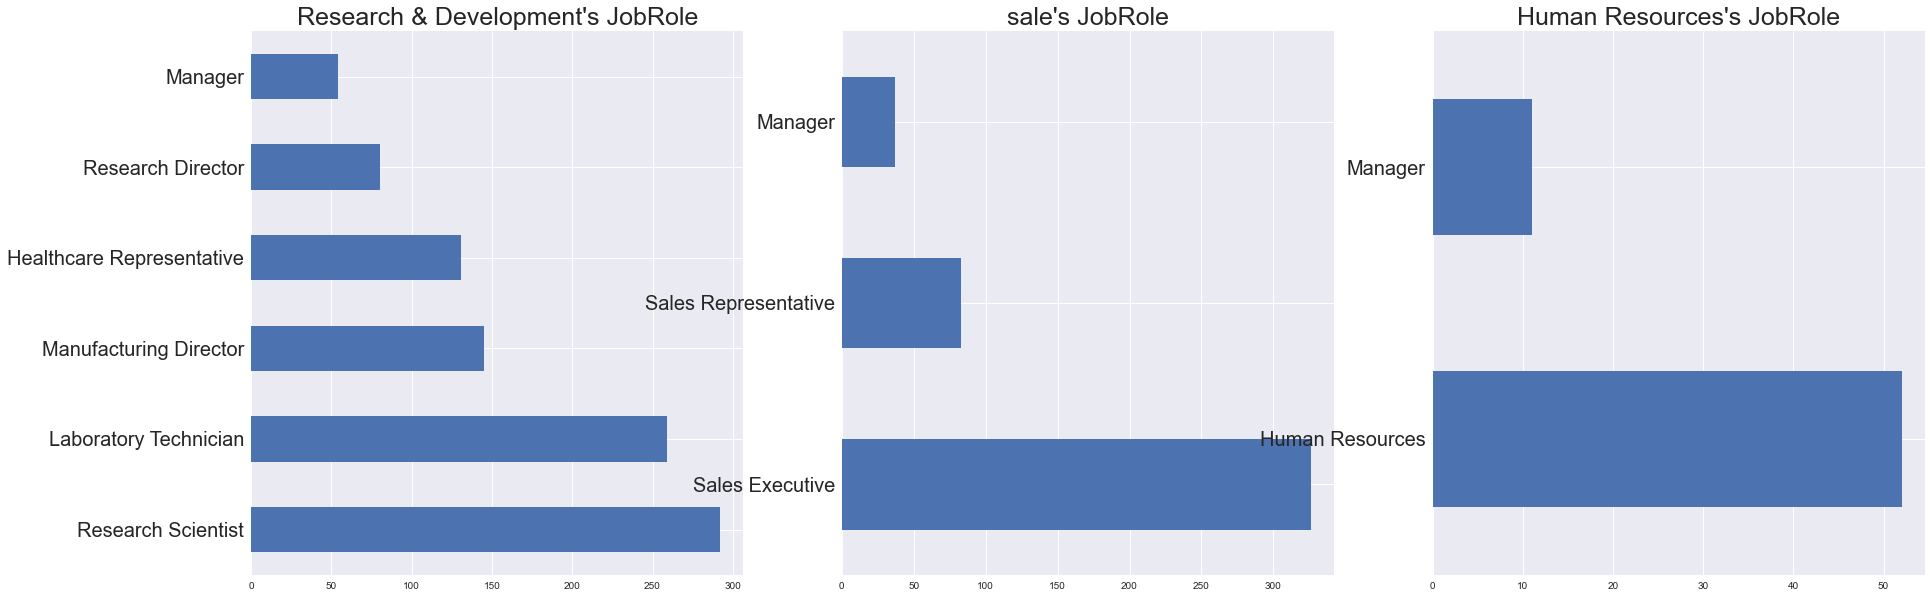

In [143]:
f, ax = plt.subplots(1,3,figsize=(30,10))

data[data['Department']=="Research & Development"]['JobRole'].value_counts().plot.barh(ax=ax[0])
ax[0].set_title("Research & Development's JobRole")

data[data['Department']=="Sales"]['JobRole'].value_counts().plot.barh(ax=ax[1])
ax[1].set_title("sale's JobRole")

data[data['Department']=="Human Resources"]['JobRole'].value_counts().plot.barh(ax=ax[2])
ax[2].set_title("Human Resources's JobRole")

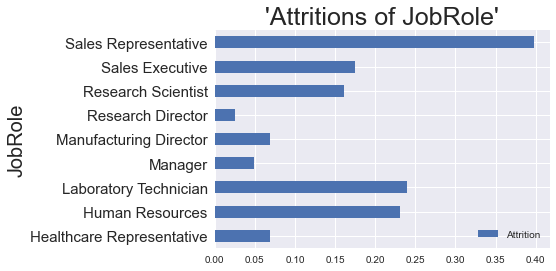

In [144]:
data[['Attrition','JobRole']].groupby(['JobRole']).mean().plot.barh() 
plt.title("'Attritions of JobRole'")
plt.yticks(size=15)

plt.show()

**Laboratory Technician**

**Sales Representative**

**Human Resources**

각 업무에서 job level이 1에 해당하는 직업이 20% 이상이었으며, Sales Representative의 경우 40% 육박하였다. (jobLevel 1의 비율이 91.5%)

Sales=[Sales Executive(2,3,4), Sales Representative(1,2), Manager(3,4,5) ]<br>
Research & Development =[Research Director(3,4,5), Research Scientist(1,2,3), Laboratory Technician(1,2,3),<br>'
     Manufacturing Director(2,3,4) ,Healthcare Representative(2,3,4) ,Manager(3,4,5) ]<br>
Human Resources =[Human Resources(1,2,3) ,Manager(3,4,5)]<br>

JobLevel 과 JobRole에서 Attrition과의 연관성이 매우 높은 것으로 나타난다.

## OverTime(초과근무)

In [145]:
data["OverTime"].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

<AxesSubplot:xlabel='OverTime', ylabel='count'>

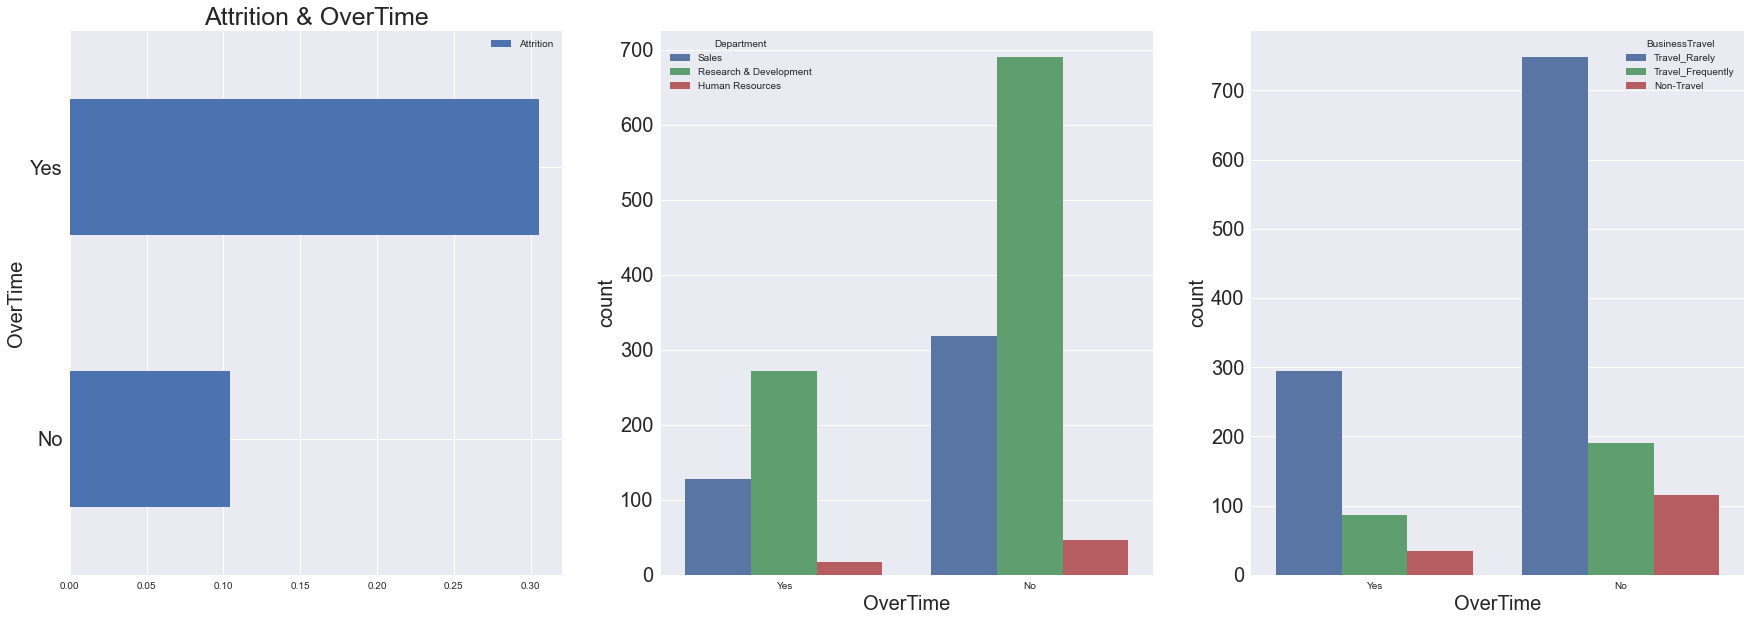

In [146]:
f, ax = plt.subplots(1,3,figsize=(30,10))

data[['Attrition','OverTime']].groupby(['OverTime']).mean().plot.barh(ax=ax[0]) 
ax[0].set_title("Attrition & OverTime") 

sns.countplot("OverTime", hue="Department", data=data, ax=ax[1])


sns.countplot("OverTime", hue="BusinessTravel", data=data, ax=ax[2])


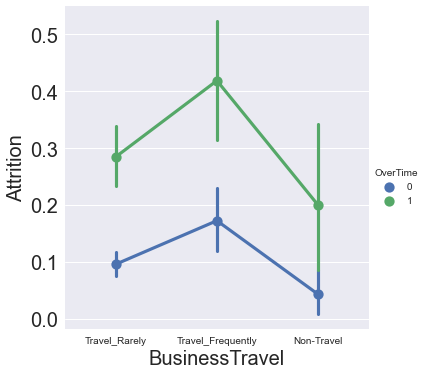

In [147]:
data["OverTime"].replace("Yes", 1 , inplace=True)
data["OverTime"].replace("No", 0 , inplace=True)

sns.factorplot('BusinessTravel','Attrition', hue="OverTime", data=data)
plt.show()

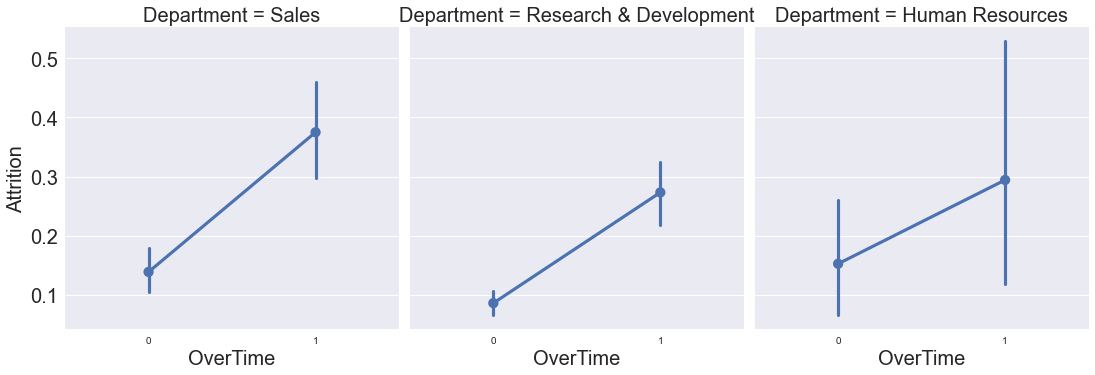

In [148]:
sns.factorplot("OverTime",'Attrition', col='Department', data=data)
plt.show()

 초과 근무가 있을 경우 최사 비율이 30%, 초과근무가 없는 경우 퇴사비율이 10%로 3 배가량 차이가 난다. 
 
 출장 횟수가 많을 수록, 초과근무도 증가하며, 출장횟수와 초과근무가 많을 수록 퇴사자들도 증가함. 각 부서별로도 초과근무가 있으면, 퇴사비율이 증가하는 경향이 발생. 

## PerformanceRating

In [149]:
data['PerformanceRating'].value_counts().to_frame()
# Excellent 와  #Outstanding  만 존재. 유의미한 차이가 있을까?

PerformanceRating
3               1244
4                226

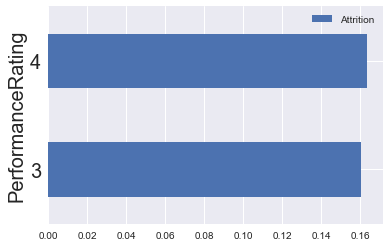

In [150]:
data[["Attrition",'PerformanceRating']].groupby(['PerformanceRating']).mean().plot.barh()
plt.show()
#유의미한 차이 X!!!

## TrainingTimesLastYear

In [151]:
data['TrainingTimesLastYear'].value_counts().to_frame()

TrainingTimesLastYear
2                    547
3                    491
4                    123
5                    119
1                     71
6                     65
0                     54

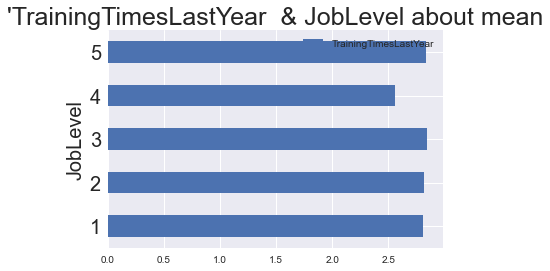

In [152]:
data[['TrainingTimesLastYear','JobLevel']].groupby(['JobLevel']).mean().plot.barh() 
plt.title("'TrainingTimesLastYear  & JobLevel about mean")
plt.legend(loc='best')
plt.show()

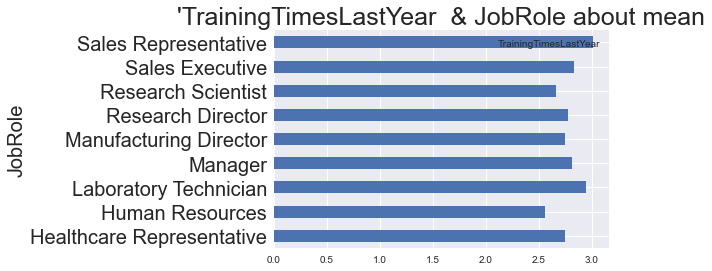

In [153]:
data[['TrainingTimesLastYear','JobRole']].groupby(['JobRole']).mean().plot.barh() 
plt.title("'TrainingTimesLastYear  & JobRole about mean")
plt.legend(loc='best')
plt.show()

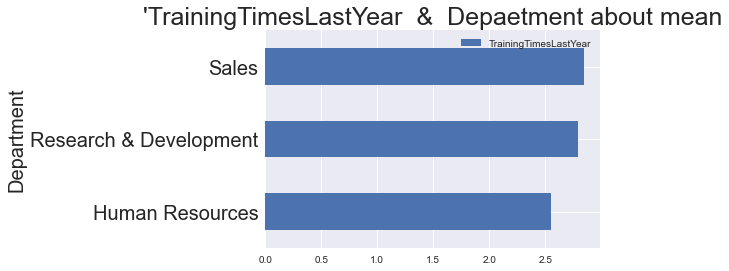

In [154]:
data[['TrainingTimesLastYear','Department']].groupby(['Department']).mean().plot.barh() 
plt.title("'TrainingTimesLastYear  &  Depaetment about mean")
plt.legend(loc='best')
plt.show()

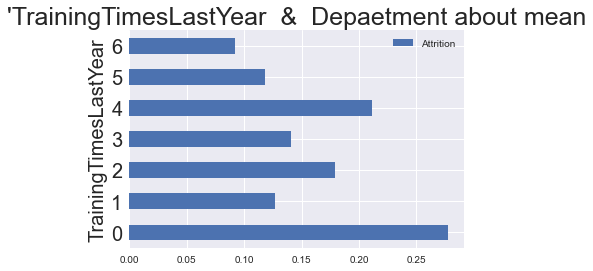

In [155]:
data[['TrainingTimesLastYear','Attrition']].groupby(['TrainingTimesLastYear']).mean().plot.barh() 
plt.title("'TrainingTimesLastYear  &  Depaetment about mean")
plt.show()

지난 학습 기간이 0인 그룹이 퇴사 비율이 가장 높았다. 그다음이 4시간인 이들이다. 

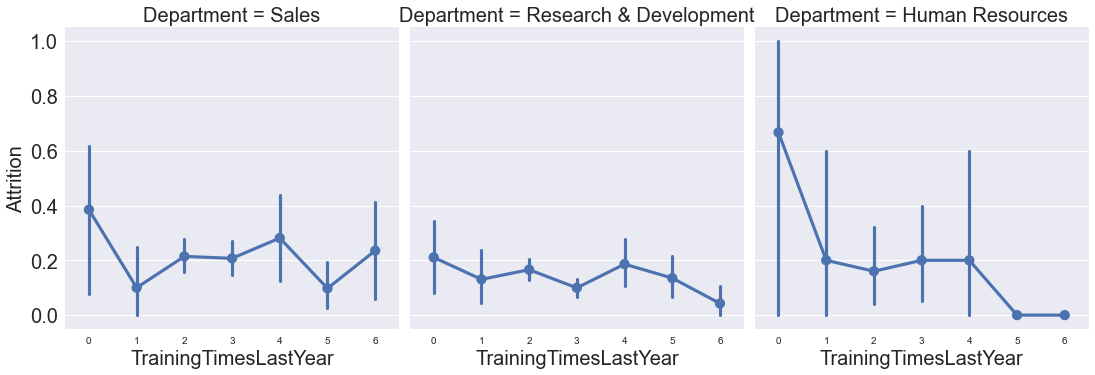

In [156]:
sns.factorplot('TrainingTimesLastYear','Attrition',col='Department',data=data)

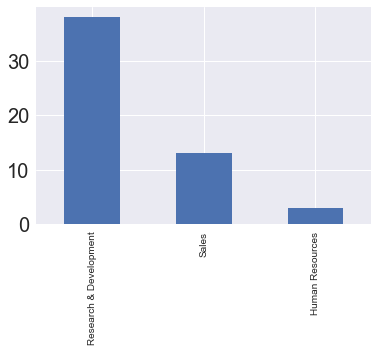

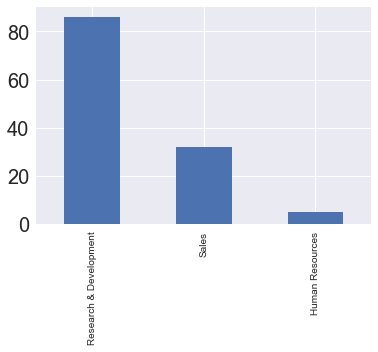

In [157]:
data[data['TrainingTimesLastYear']==0]['Department'].value_counts().plot.bar()
plt.show()
data[data['TrainingTimesLastYear']==4]['Department'].value_counts().plot.bar()
plt.show()

직무 역할, 직무 수준, 부서에서의 평균 트레이닝 시간이 대부분 비슷하다. 
0시간 4시간의 비중이 R&D에 많은 것은 단지 R&D의 직무 인원이 많기 때문이다.
유의미한 차이가 있지는 않는 것 같다. 아마 연차와 연관이 있지 않을까??


## EnvironmentSatisfaction

In [158]:
data['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

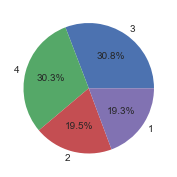

In [159]:
plt.figure(figsize=(3,3))
plt.pie(data['EnvironmentSatisfaction'].value_counts(), labels=data['EnvironmentSatisfaction'].value_counts().index,autopct='%0.1f%%')
plt.show()
#1: 'Low'    2: 'Medium'  3: 'High'   4: 'Very High'

In [160]:
data[['Attrition','EnvironmentSatisfaction']].groupby('Attrition').mean()

EnvironmentSatisfaction
Attrition                         
0.0                       2.771290
1.0                       2.464135

In [161]:
data.groupby(['EnvironmentSatisfaction','Attrition'])[['Attrition']].count()

Attrition
EnvironmentSatisfaction Attrition           
1                       0.0              212
                        1.0               72
2                       0.0              244
                        1.0               43
3                       0.0              391
                        1.0               62
4                       0.0              386
                        1.0               60

In [162]:
pd.crosstab([data.EnvironmentSatisfaction],[data.Attrition],
                            margins=True).style.background_gradient(cmap='summer_r')

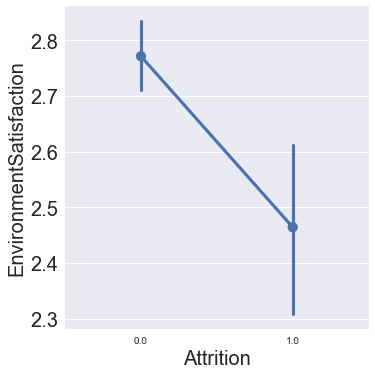

In [163]:
sns.factorplot('Attrition','EnvironmentSatisfaction',data=data)

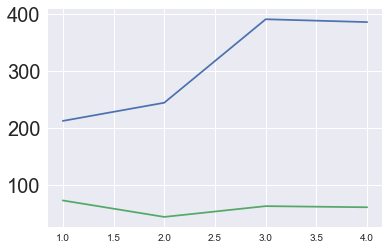

In [164]:
att_yes_e_s=data[data['Attrition']==1].groupby('EnvironmentSatisfaction').count()[['Attrition']]
att_no_e_s=data[data['Attrition']==0].groupby('EnvironmentSatisfaction').count()[['Attrition']]
display(plt.plot(att_no_e_s['Attrition']))
display(plt.plot(att_yes_e_s['Attrition']))

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

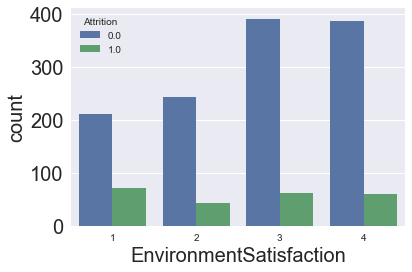

In [165]:
sns.countplot(data['EnvironmentSatisfaction'], hue='Attrition', data=data,dodge = True) 

- 환경만족도를 낮게 준 사람들이 주로 퇴사했고, 환경에 만족한 사람들은 퇴사를 하지 않는 경향이 크다. 

## JobSatisfaction

In [166]:
data['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

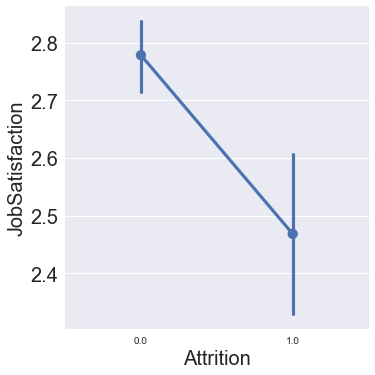

In [167]:
sns.factorplot('Attrition','JobSatisfaction',data=data)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

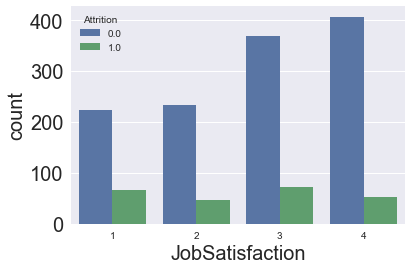

In [168]:
sns.countplot(data['JobSatisfaction'], hue='Attrition', data=data,dodge = True) 

- 마찬가지로 JobSatisfaction이 높은 사람들이 퇴사율이 적다.

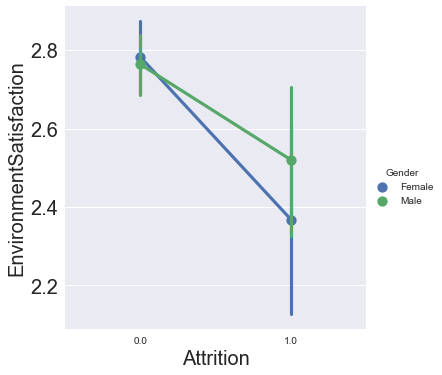

In [169]:
sns.factorplot('Attrition','EnvironmentSatisfaction',data=data, hue='Gender')

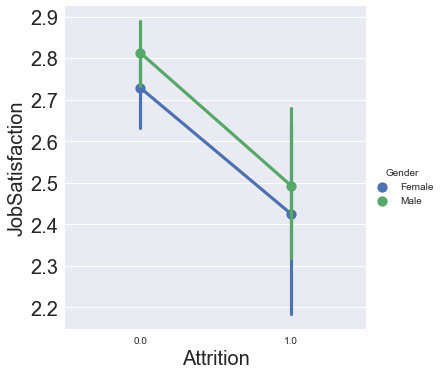

In [170]:
sns.factorplot('Attrition','JobSatisfaction',data=data, hue='Gender')

## RelationshipSatisfaction

In [171]:
data['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

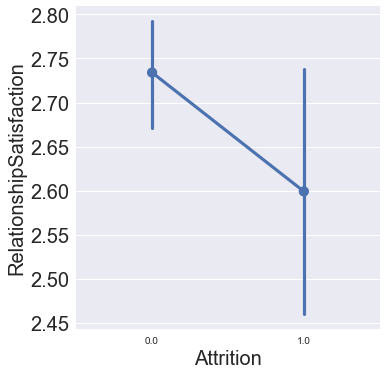

In [172]:
sns.factorplot('Attrition','RelationshipSatisfaction',data=data)

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

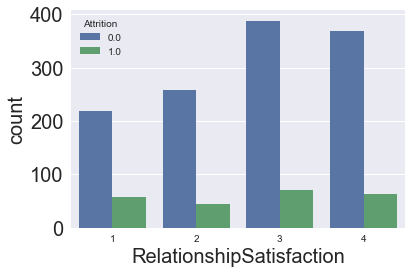

In [173]:
sns.countplot(data['RelationshipSatisfaction'], hue='Attrition', data=data,dodge = True)

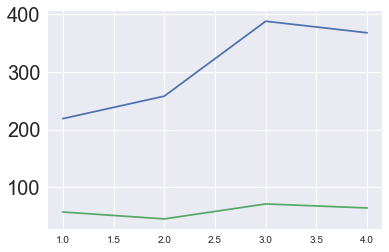

In [174]:
att_yes_r_s=data[data['Attrition']==1].groupby('RelationshipSatisfaction').count()[['Attrition']]
att_no_r_s=data[data['Attrition']==0].groupby('RelationshipSatisfaction').count()[['Attrition']]
display(plt.plot(att_no_r_s['Attrition']))
display(plt.plot(att_yes_r_s['Attrition']))

In [175]:
att_yes_r_s

Attrition
RelationshipSatisfaction           
1                                57
2                                45
3                                71
4                                64

- RelationshipSatisfaction이 높으면 퇴사를 덜하는 것 같긴 하지만,\
RelationshipSatisfaction이 낮다고 해서 퇴사를 덜하는 것은 아닌 것 같다

## WorkLifeBalance

In [176]:
data['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

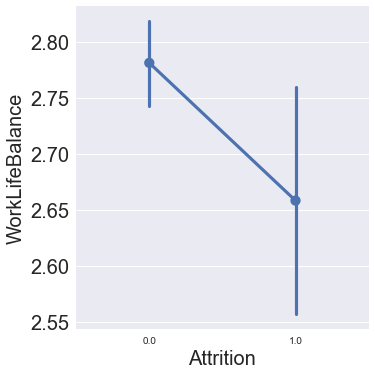

In [177]:
sns.factorplot('Attrition','WorkLifeBalance',data=data)

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

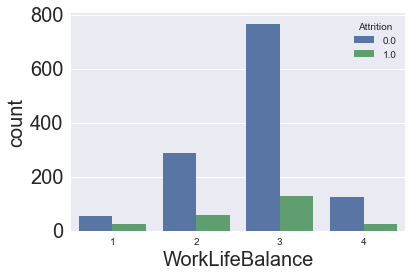

In [178]:
sns.countplot(data['WorkLifeBalance'], hue='Attrition', data=data,dodge = True)

In [179]:
pd.crosstab([data.WorkLifeBalance],[data.Attrition],
                            margins=True).style.background_gradient(cmap='summer_r')

In [180]:
#워라밸 만족도별 퇴사자/전체수
data[data['Attrition']==1].groupby('WorkLifeBalance').count()['Attrition']/data.groupby('WorkLifeBalance').count()['Attrition']

WorkLifeBalance
1    0.312500
2    0.168605
3    0.142217
4    0.176471
Name: Attrition, dtype: float64

In [181]:
workandlife_df=data[data['WorkLifeBalance']<5].groupby('Attrition').sum()[['WorkLifeBalance']]
workandlife_df['1점']=data[data['WorkLifeBalance']==1].groupby('Attrition').sum()[['WorkLifeBalance']]
workandlife_df['2점']=data[data['WorkLifeBalance']==2].groupby('Attrition').sum()[['WorkLifeBalance']]
workandlife_df['3점']=data[data['WorkLifeBalance']==3].groupby('Attrition').sum()[['WorkLifeBalance']]
workandlife_df['4점']=data[data['WorkLifeBalance']==4].groupby('Attrition').sum()[['WorkLifeBalance']]
workandlife_df

WorkLifeBalance  1점   2점    3점   4점
Attrition                                     
0.0                   3429  55  572  2298  504
1.0                    630  25  116   381  108

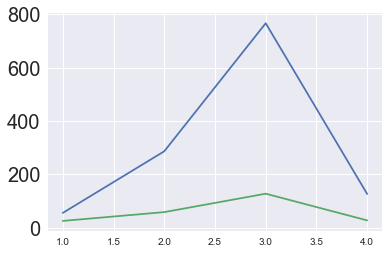

In [182]:
att_yes_Lb_s=data[data['Attrition']==1].groupby('WorkLifeBalance').count()[['Attrition']]
att_no_Lb_s=data[data['Attrition']==0].groupby('WorkLifeBalance').count()[['Attrition']]
display(plt.plot(att_no_Lb_s['Attrition'])) #재직자
display(plt.plot(att_yes_Lb_s['Attrition'])) #퇴사자

- 워라밸 만족도가 낮은 1의 경우 퇴사율이 높은 것은 맞지만,
워라밸이 높다고 해서 퇴사를 안하는 건 아닌 것 같음..!\
퇴사자 630명 중에 489명이 워래밸에 3 또는 4점을 줌.

## YearsAtCompany

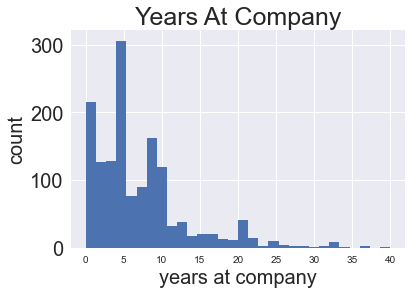

In [183]:
plt.hist(data['YearsAtCompany'],bins=30)
plt.xlabel('years at company')
plt.ylabel('count')
plt.title('Years At Company')
plt.show()

(array([140., 208., 266., 146., 145., 132.,  14.,  38.,  30.,  20.,  36.,
         27.,   6.,   4.,   6.,   2.,   3.,   6.,   1.,   3.]),
 array([ 0.  ,  1.85,  3.7 ,  5.55,  7.4 ,  9.25, 11.1 , 12.95, 14.8 ,
        16.65, 18.5 , 20.35, 22.2 , 24.05, 25.9 , 27.75, 29.6 , 31.45,
        33.3 , 35.15, 37.  ]),
 <BarContainer object of 20 artists>)

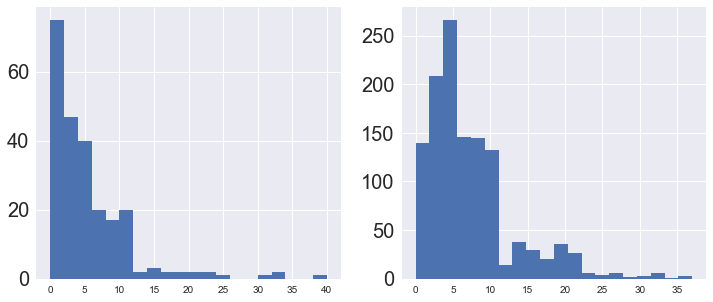

In [184]:
f, axes = plt.subplots(1,2)
f.set_size_inches(12,5)
axes[0].hist(data[data['Attrition']==1][['YearsAtCompany']],bins=20)
axes[1].hist(data[data['Attrition']==0][['YearsAtCompany']],bins=20)

In [185]:
print('퇴사O의 평균 근무기간 : ',data[data['Attrition']==1][['YearsAtCompany']].mean())
print('퇴사X의 평균 근무기간 : ',data[data['Attrition']==0][['YearsAtCompany']].mean())

퇴사O의 평균 근무기간 :  YearsAtCompany    5.130802
dtype: float64
퇴사X의 평균 근무기간 :  YearsAtCompany    7.369019
dtype: float64


퇴사자들의 평균 근무기간이 퇴사하지 않는 사람들보다 약 2년정도 적다.
5년이내 퇴사자수가 가장 많은데, 회사랑 맞지 않으면 바로 나가버리는 듯.

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

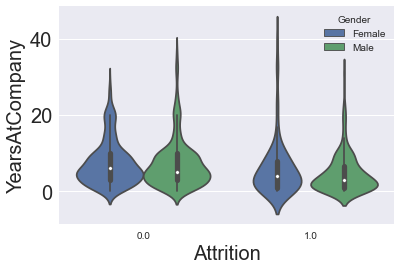

In [186]:
sns.violinplot(data=data, x=data['Attrition'] ,y=data['YearsAtCompany'],hue='Gender')

## YearsInCurrentRole

(array([301., 507., 140., 259.,  89.,  96.,  32.,  25.,  15.,   6.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <BarContainer object of 10 artists>)

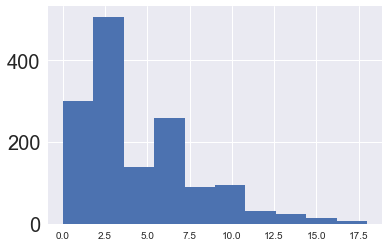

In [187]:
plt.hist(data['YearsInCurrentRole'])

(array([171.,  46., 304., 119.,  89.,  35.,  35., 191.,  82.,   0.,  61.,
         27.,  22.,   9.,  13.,  10.,   6.,   7.,   4.,   2.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ,
         9.9, 10.8, 11.7, 12.6, 13.5, 14.4, 15.3, 16.2, 17.1, 18. ]),
 <BarContainer object of 20 artists>)

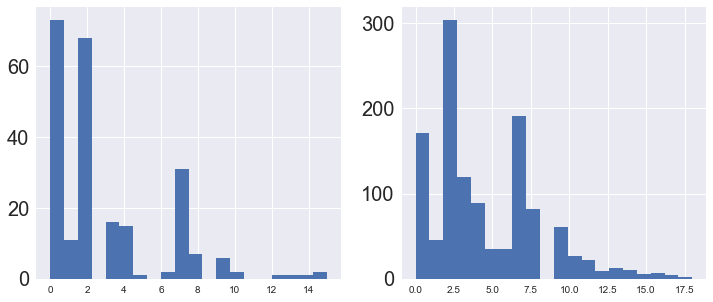

In [188]:
f, axes = plt.subplots(1,2)
f.set_size_inches(12,5)
axes[0].hist(data[data['Attrition']==1][['YearsInCurrentRole']],bins=20)
axes[1].hist(data[data['Attrition']==0][['YearsInCurrentRole']],bins=20)

In [189]:
print('퇴사O의 평균 현재업무지속기간 : ',data[data['Attrition']==1][['YearsInCurrentRole']].mean())
print('퇴사X의 평균 현재업무지속기간 : ',data[data['Attrition']==0][['YearsInCurrentRole']].mean())

퇴사O의 평균 현재업무지속기간 :  YearsInCurrentRole    2.902954
dtype: float64
퇴사X의 평균 현재업무지속기간 :  YearsInCurrentRole    4.484185
dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='YearsInCurrentRole'>

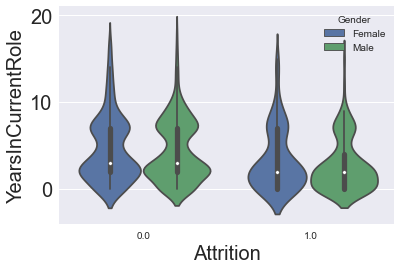

In [190]:
sns.violinplot(data=data, x=data['Attrition'] ,y=data['YearsInCurrentRole'],hue='Gender')

별 필요없는듯..

## YearsSinceLastPromotion

(array([938., 159., 113.,  45., 108.,  18.,  23.,  24.,  20.,  22.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

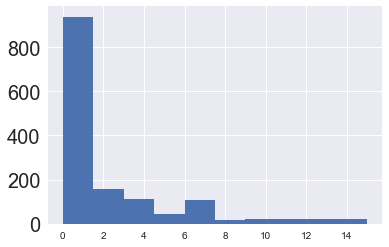

In [191]:
plt.hist(data['YearsSinceLastPromotion'])

(array([471., 308., 132.,  43.,  56.,  43.,  26.,  60.,  18.,  13.,   5.,
         22.,  10.,   8.,  18.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15.]),
 <BarContainer object of 15 artists>)

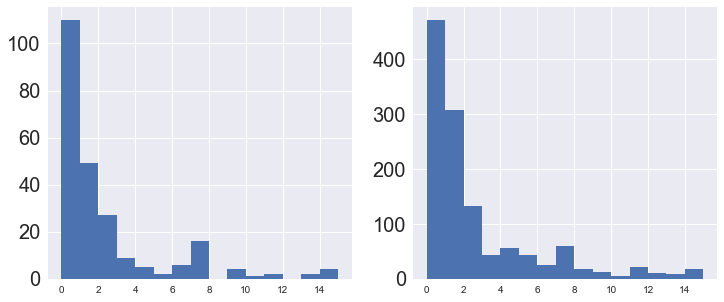

In [192]:
f, axes = plt.subplots(1,2)
f.set_size_inches(12,5)
axes[0].hist(data[data['Attrition']==1][['YearsSinceLastPromotion']],bins=15)
axes[1].hist(data[data['Attrition']==0][['YearsSinceLastPromotion']],bins=15)

In [193]:
print('퇴사O의 평균 마지막승진으로부터의 기간 : ',data[data['Attrition']==1][['YearsSinceLastPromotion']].mean())
print('퇴사X의 평균 마지막승진으로부터의 기간 : ',data[data['Attrition']==0][['YearsSinceLastPromotion']].mean())

퇴사O의 평균 마지막승진으로부터의 기간 :  YearsSinceLastPromotion    1.945148
dtype: float64
퇴사X의 평균 마지막승진으로부터의 기간 :  YearsSinceLastPromotion    2.234388
dtype: float64


마지막 승진으로부터의 기간과 퇴사는 큰 관계가 없다고 보임.

## YearsWithCurrManager

(array([339., 486., 129.,  29., 323.,  91.,  22.,  32.,  10.,   9.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

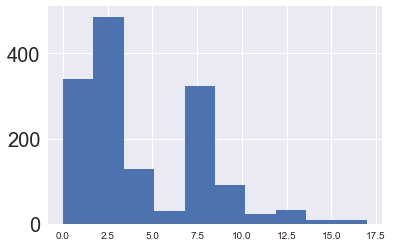

In [194]:
plt.hist(data['YearsWithCurrManager'])

(array([243., 294., 123.,  87.,  27.,  25., 185., 155.,  24.,  21.,  18.,
         14.,   3.,   5.,   9.]),
 array([ 0.        ,  1.13333333,  2.26666667,  3.4       ,  4.53333333,
         5.66666667,  6.8       ,  7.93333333,  9.06666667, 10.2       ,
        11.33333333, 12.46666667, 13.6       , 14.73333333, 15.86666667,
        17.        ]),
 <BarContainer object of 15 artists>)

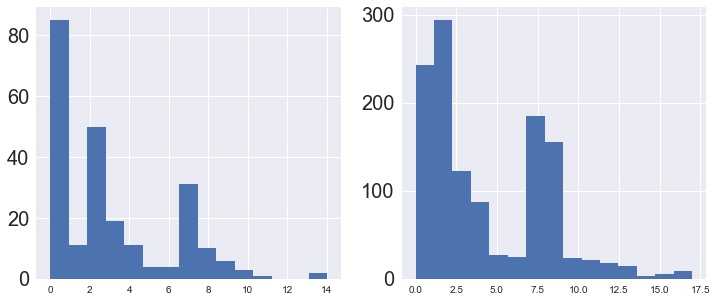

In [195]:
f, axes = plt.subplots(1,2)
f.set_size_inches(12,5)
axes[0].hist(data[data['Attrition']==1][['YearsWithCurrManager']],bins=15)
axes[1].hist(data[data['Attrition']==0][['YearsWithCurrManager']],bins=15)

In [196]:
print('퇴사O의 평균 현재매니저와 일한 기간 : ',data[data['Attrition']==1][['YearsWithCurrManager']].mean())
print('퇴사X의 평균 현재매니저와 일한 기간 : ',data[data['Attrition']==0][['YearsWithCurrManager']].mean())

퇴사O의 평균 현재매니저와 일한 기간 :  YearsWithCurrManager    2.852321
dtype: float64
퇴사X의 평균 현재매니저와 일한 기간 :  YearsWithCurrManager    4.367397
dtype: float64


밑에 heatmap에서 보면, 현재매니저와 일한 기간은 years at company와 0.62로 비교적 높은 상관관계가 있는 것으로 보인다.

In [197]:
years_df=data[['Attrition','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

<AxesSubplot:>

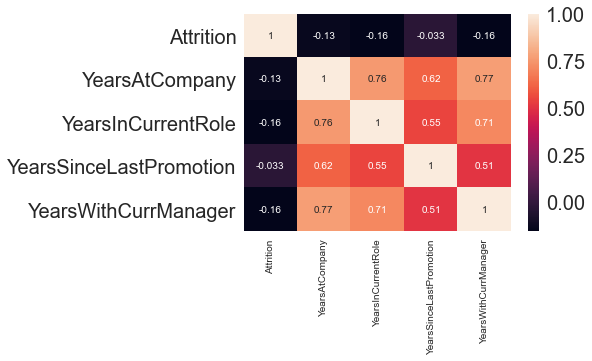

In [198]:
sns.heatmap(years_df.corr(),annot=True)

값이 0.7이상인 것을 뚜렷한 양적 상관관계가 있다고 볼때,
years at company, yearn in curren role, years with curren mannager
이 세가지 항목은 다중공선성이 나타난다고 볼 수 있다?!

# MZ Future Key Talent

## MZ Future Key Talent 분류

In [199]:
data_talent = data[(data['SalaryHike_range']==4) & (data['Age']<=33)]
data_normal = data[~(data['SalaryHike_range']==4) | ~(data['Age']<=33)]
data_mz =  data[(data['Age']<34)]
data_not_talent_mz= data[~(data['SalaryHike_range']==4) & (data['Age']<34)]

In [200]:
data_talent

Age  Attrition     BusinessTravel  DailyRate              Department  \
7      30        0.0      Travel_Rarely       1358  Research & Development   
26     32        1.0  Travel_Frequently       1125  Research & Development   
39     33        0.0  Travel_Frequently       1141                   Sales   
44     30        0.0  Travel_Frequently        721  Research & Development   
54     26        0.0      Travel_Rarely       1443                   Sales   
...   ...        ...                ...        ...                     ...   
1431   32        0.0      Travel_Rarely        801                   Sales   
1433   25        0.0      Travel_Rarely       1382                   Sales   
1438   23        1.0  Travel_Frequently        638                   Sales   
1463   31        0.0         Non-Travel        325  Research & Development   
1467   27        0.0      Travel_Rarely        155  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeNumber  \
7                   24          1  Life Sciences              11   
26                  16          1  Life Sciences              33   
39                   1          3  Life Sciences              52   
44                   1          2        Medical              57   
54                  23          3      Marketing              72   
...                ...        ...            ...             ...   
1431                 1          4      Marketing            2016   
1433                 8          2          Other            2018   
1438                 9          3      Marketing            2023   
1463                 5          3        Medical            2057   
1467                 4          3  Life Sciences            2064   

      EnvironmentSatisfaction  ... YearsInCurrentRole  \
7                           4  ...                  0   
26                          2  ...                  2   
39                          3  ...                  3   
44                          3  ...                  8   
54                          3  ...                  2   
...                       ...  ...                ...   
1431                        3  ...                 10   
1433                        1  ...                  3   
1438                        4  ...                  0   
1463                        2  ...                  4   
1467                        2  ...                  2   

      YearsSinceLastPromotion  YearsWithCurrManager  BeforeWorkingYears  \
7                           0                     0                   0   
26                          6                     7                   0   
39                          1                     3                   5   
44                          3                     7                   0   
54                          0                     0                   3   
...                       ...                   ...                 ...   
1431                        5                     7                   0   
1433                        0                     4                   1   
1438                        1                     0                   0   
1463                        1                     7                   1   
1467                        0                     3                   0   

     Age_band  BeforeWorkingYears_band Rate_range  Income_range  \
7           1                        0          2             1   
26          1                        0          1             2   
39          1                        0          1             3   
44          1                        0          2             2   
54          1                        0          4             2   
...       ...                      ...        ...           ...   
1431        1                        0          4             4   
1433        0                        0          2             2   
1438        0                        0          4             1

In [201]:
print("mz핵심인재 평균나이 : ", data_talent['Age'].mean(),"\n그외 평균나이 : ",data_normal['Age'].mean())

mz핵심인재 평균나이 :  28.112 
그외 평균나이 :  37.74275092936803


In [202]:
print('mz핵심인재 퇴사율:',data_talent[data_talent['Attrition']==1].count()['Attrition']/data_talent['Attrition'].count())
print('그 외 집단 퇴사율:',data_normal[data_normal['Attrition']==1].count()['Attrition']/data_normal['Attrition'].count())
print('전체 퇴사율:',data[data['Attrition']==1].count()['Attrition']/data['Attrition'].count())

mz핵심인재 퇴사율: 0.216
그 외 집단 퇴사율: 0.15613382899628253
전체 퇴사율: 0.16122448979591836


In [203]:
print("MZ 핵심인재 평균월급 : %.2f \t\t 핵심인재 아닌 그룹 평균월급 : %.2f" %(data_talent['MonthlyIncome'].mean(),data_normal['MonthlyIncome'].mean()))
print("전체 MZ직원 평균월급 : %.2f \t\t 핵심인재 아닌 MZ평균월급 : %.2f" %(data_mz['MonthlyIncome'].mean(),data_not_talent_mz['MonthlyIncome'].mean()))
print('전체 직원의 평균월급: %.2f' %(data['MonthlyIncome'].mean()))

MZ 핵심인재 평균월급 : 4570.37 		 핵심인재 아닌 그룹 평균월급 : 6682.54
전체 MZ직원 평균월급 : 4361.53 		 핵심인재 아닌 MZ평균월급 : 4303.39
전체 직원의 평균월급: 6502.93


- **확실히 MZ핵심인재 퇴사율이 높은 것이 문제이다!!!!**
- 인재를 잡자!!

## MZ Future Key Talent의 특성

### Gender

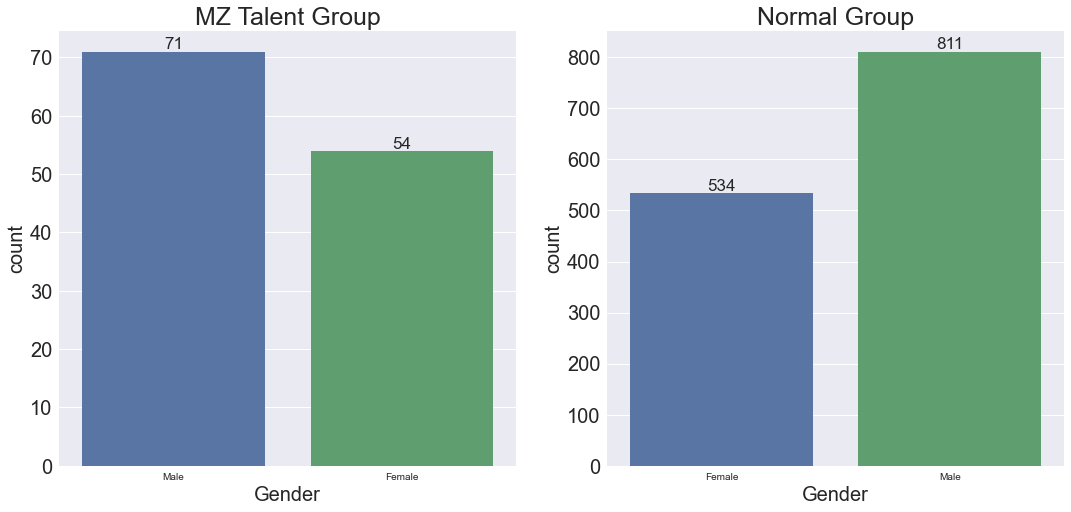

In [204]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=data_talent, x='Gender', ax=ax[0])
ax[0].set_title('MZ Talent Group')
sns.countplot(data=data_normal, x='Gender', ax=ax[1])
ax[1].set_title('Normal Group')

for a in ax:
    for p in a.patches:
        a.annotate(format(p.get_height(),".0f"), (p.get_x()+p.get_width()/2.0, p.get_height()),
                   ha='center', va='center', size=17, xytext=(0,7), textcoords='offset points')

plt.show()

In [205]:
pd.crosstab(data_talent.Attrition,data_talent.Gender, margins=True).style.background_gradient(cmap='summer_r')

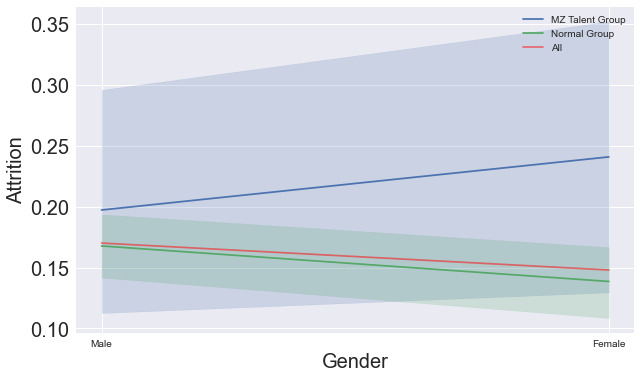

In [206]:
plt.figure(figsize=(10,6))
sns.lineplot('Gender', 'Attrition', data=data_talent)
sns.lineplot('Gender', 'Attrition', data=data_normal)
sns.lineplot('Gender', 'Attrition', data=data.groupby('Gender').mean(), color='r', alpha=0.5)
plt.legend(['MZ Talent Group', 'Normal Group', 'All'])
plt.show()

**핵심인재 그룹은 여성의 퇴사율이 더 높다.**
- 여성을 잡아둘 방법을 생각해야할 듯

### Education

1: 'Below College' 2: 'College' 3: 'Bachelor' 4: 'Master' 5: 'Doctor'

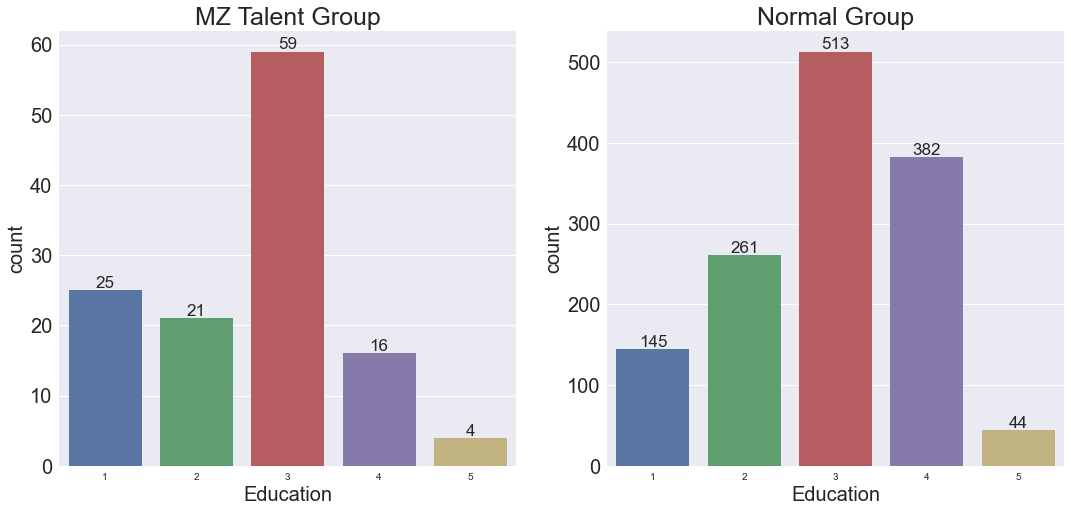

In [207]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=data_talent, x='Education', ax=ax[0])
ax[0].set_title('MZ Talent Group')

sns.countplot(data=data_normal, x='Education', ax=ax[1])
ax[1].set_title('Normal Group')

for a in ax:
    for p in a.patches:
        a.annotate(format(p.get_height(),".0f"), (p.get_x()+p.get_width()/2.0, p.get_height()),
                   ha='center', va='center', size=17, xytext=(0,7), textcoords='offset points')

plt.show()

In [208]:
pd.crosstab(data_talent.Attrition,data_talent.Education, margins=True).style.background_gradient(cmap='summer_r')

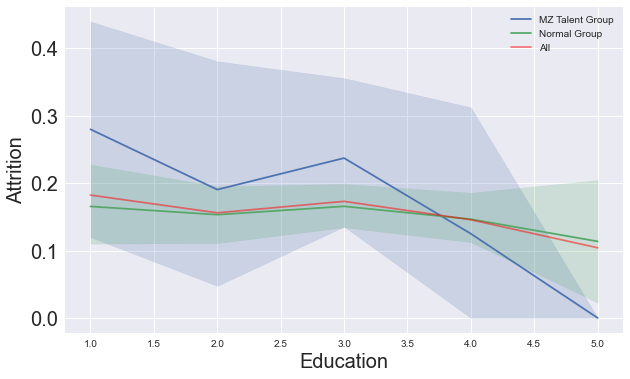

In [209]:
plt.figure(figsize=(10,6))
sns.lineplot('Education', 'Attrition', data=data_talent)
sns.lineplot('Education', 'Attrition', data=data_normal)
sns.lineplot('Education', 'Attrition', data=data.groupby('Education').mean(), color='r', alpha=0.5)
plt.legend(['MZ Talent Group', 'Normal Group', 'All'])
plt.show()

* **학력이 석사 이하인 핵심인재의 퇴사율이 높음**

In [210]:
pd.crosstab(data_talent.Gender,data_talent.Education, margins=True).style.background_gradient(cmap='summer_r')

In [211]:
data_talent.groupby(['Attrition', 'Gender', 'Education'])[['Education']].count()

Education
Attrition Gender Education           
0.0       Female 1                  7
                 2                  5
                 3                 21
                 4                  7
                 5                  1
          Male   1                 11
                 2                 12
                 3                 24
                 4                  7
                 5                  3
1.0       Female 1                  4
                 2                  2
                 3                  6
                 4                  1
          Male   1                  3
                 2                  2
                 3                  8
                 4                  1

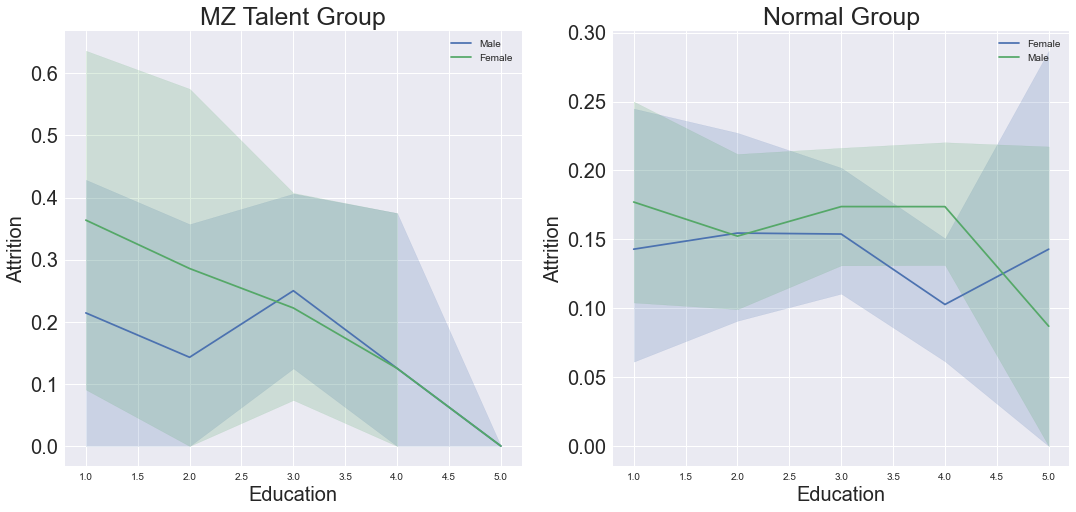

In [212]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.lineplot('Education', 'Attrition', data=data_talent, hue='Gender', ax=ax[0])
ax[0].legend()
ax[0].set_title('MZ Talent Group')

sns.lineplot('Education', 'Attrition', data=data_normal, hue='Gender', ax=ax[1])
ax[1].legend()
ax[1].set_title('Normal Group')

plt.show()

**대학 이하의 학력을 가진 여성의 퇴사율이 상대적으로 높음**

### EducationField

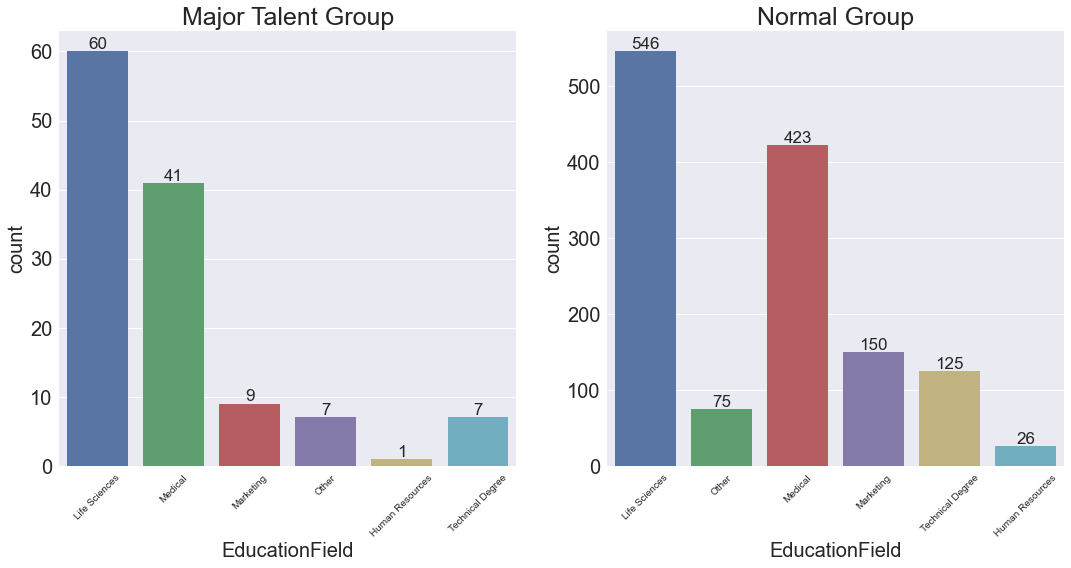

In [213]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=data_talent, x='EducationField', ax=ax[0])
ax[0].set_title('Major Talent Group')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.countplot(data=data_normal, x='EducationField', ax=ax[1])
ax[1].set_title('Normal Group')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45)

for a in ax:
    for p in a.patches:
        a.annotate(format(p.get_height(),".0f"), (p.get_x()+p.get_width()/2.0, p.get_height()),
                   ha='center', va='center', size=17, xytext=(0,7), textcoords='offset points')

plt.show()

In [214]:
pd.crosstab(data_talent.Attrition,data_talent.EducationField, margins=True).style.background_gradient(cmap='summer_r')

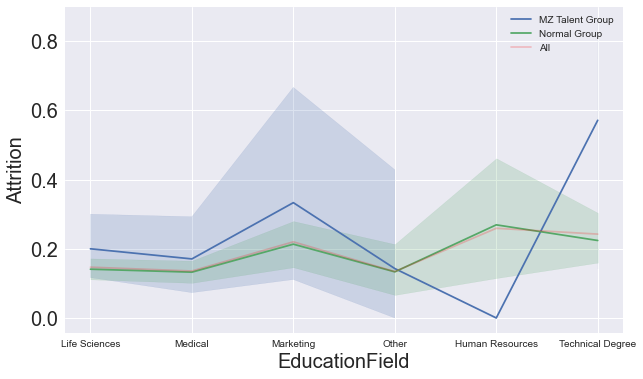

In [215]:
plt.figure(figsize=(10,6))
sns.lineplot('EducationField', 'Attrition', data=data_talent)
sns.lineplot('EducationField', 'Attrition', data=data_normal)
sns.lineplot('EducationField', 'Attrition', data=data.groupby('EducationField').mean(), color='r', alpha=0.2)
plt.legend(['MZ Talent Group', 'Normal Group','All'])
plt.show()

**HR을 공부한 사람들의 퇴사율만 낮음 => 근데 이거는 1명으로 나온 데이터라 무의미함**

In [216]:
data_talent.groupby(['Attrition', 'Gender', 'EducationField'])[['EducationField']].count()

EducationField
Attrition Gender EducationField                  
0.0       Female Life Sciences                 16
                 Marketing                      3
                 Medical                       17
                 Other                          4
                 Technical Degree               1
          Male   Human Resources                1
                 Life Sciences                 32
                 Marketing                      3
                 Medical                       17
                 Other                          2
                 Technical Degree               2
1.0       Female Life Sciences                  6
                 Marketing                      1
                 Medical                        4
                 Other                          1
                 Technical Degree               1
          Male   Life Sciences                  6
                 Marketing                      2
                 Medical                        3
                 Technical Degree               3

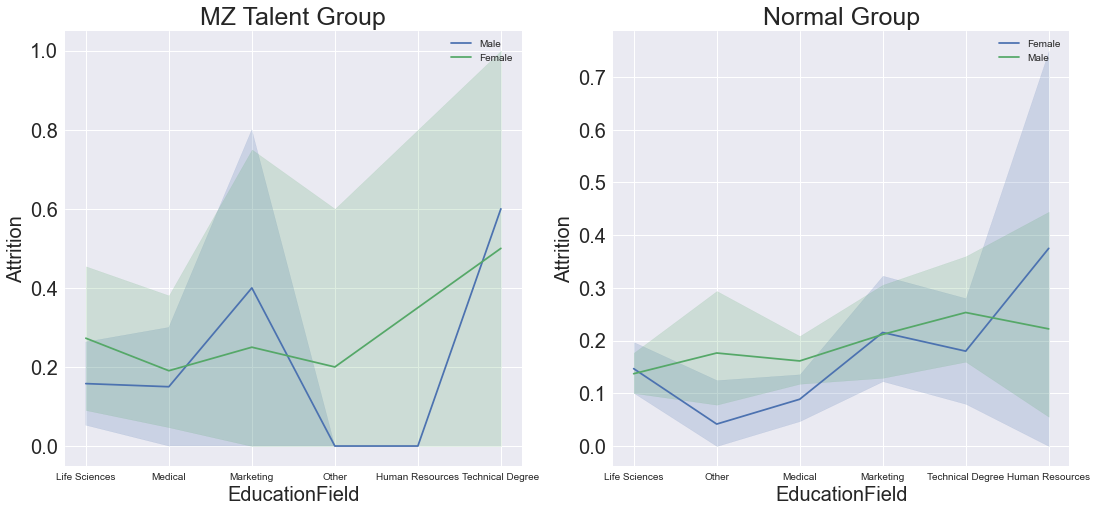

In [217]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.lineplot('EducationField', 'Attrition', data=data_talent, hue='Gender', ax=ax[0])
ax[0].legend()
ax[0].set_title('MZ Talent Group')

sns.lineplot('EducationField', 'Attrition', data=data_normal, hue='Gender', ax=ax[1])
ax[1].legend()
ax[1].set_title('Normal Group')

plt.show()

**인원이 적어서 큰 의미 없어보이기는 하지만 그럼에도 불구하고 전반적으로 여성이 더 많이 퇴사하는 것은 여기서도 드러남**

### MaritalStatus

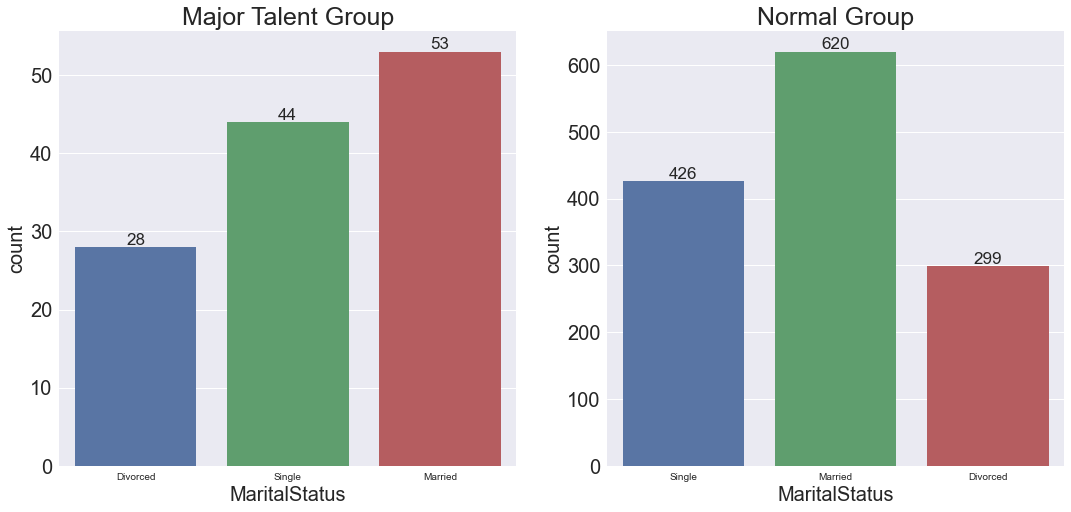

In [218]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=data_talent, x='MaritalStatus', ax=ax[0])
ax[0].set_title('Major Talent Group')


sns.countplot(data=data_normal, x='MaritalStatus', ax=ax[1])
ax[1].set_title('Normal Group')

for a in ax:
    for p in a.patches:
        a.annotate(format(p.get_height(),".0f"), (p.get_x()+p.get_width()/2.0, p.get_height()),
                   ha='center', va='center', size=17, xytext=(0,7), textcoords='offset points')

plt.show()

In [219]:
pd.crosstab(data_talent.Attrition,data_talent.MaritalStatus, margins=True).style.background_gradient(cmap='summer_r')

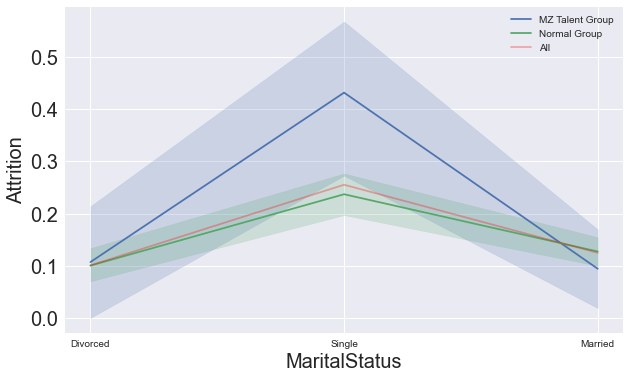

In [220]:
plt.figure(figsize=(10,6))
sns.lineplot('MaritalStatus', 'Attrition', data=data_talent)
sns.lineplot('MaritalStatus', 'Attrition', data=data_normal)
sns.lineplot('MaritalStatus', 'Attrition', data=data.groupby('MaritalStatus').mean(), color='r', alpha=0.3)
plt.legend(['MZ Talent Group', 'Normal Group', 'All'])
plt.show()

**어린 single의 퇴사율이 높은거는 진짜 문제인 듯** 왜 그만둘까...

In [221]:
data_talent.groupby(['Attrition', 'Gender', 'MaritalStatus'])[['MaritalStatus']].count()

MaritalStatus
Attrition Gender MaritalStatus               
0.0       Female Divorced                  10
                 Married                   19
                 Single                    12
          Male   Divorced                  15
                 Married                   29
                 Single                    13
1.0       Female Divorced                   1
                 Married                    3
                 Single                     9
          Male   Divorced                   2
                 Married                    2
                 Single                    10

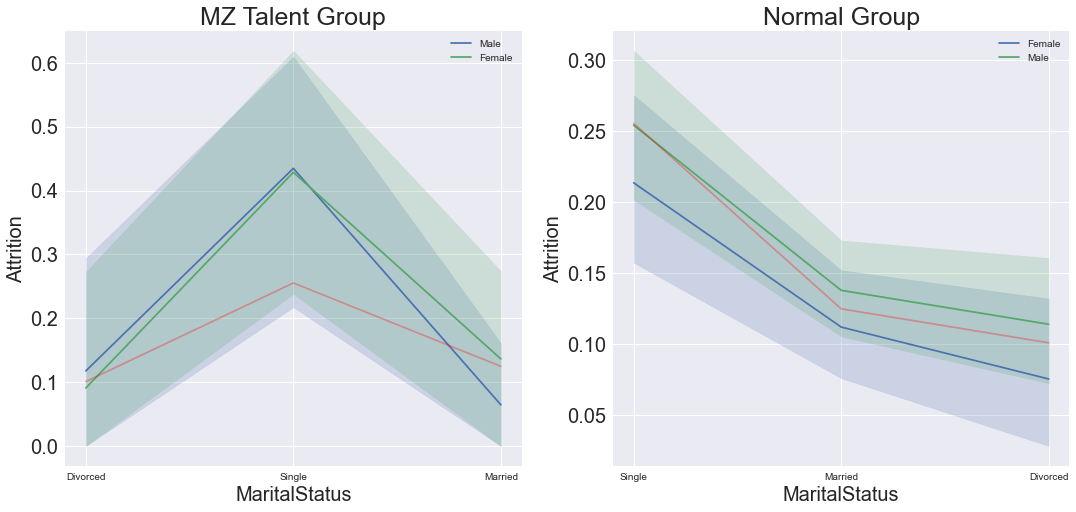

In [222]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.lineplot('MaritalStatus', 'Attrition', data=data_talent, hue='Gender', ax=ax[0])
sns.lineplot('MaritalStatus', 'Attrition', data=data.groupby('MaritalStatus').mean(), color='r', alpha=0.3, ax=ax[0])
ax[0].legend()
ax[0].set_title('MZ Talent Group')

sns.lineplot('MaritalStatus', 'Attrition', data=data_normal, hue='Gender', ax=ax[1])
sns.lineplot('MaritalStatus', 'Attrition', data=data.groupby('MaritalStatus').mean(), color='r', alpha=0.3, ax=ax[1])
ax[1].legend()
ax[1].set_title('Normal Group')

plt.show()

성별+결혼상태는 큰 차이 없음

### NumCompaniesWorked

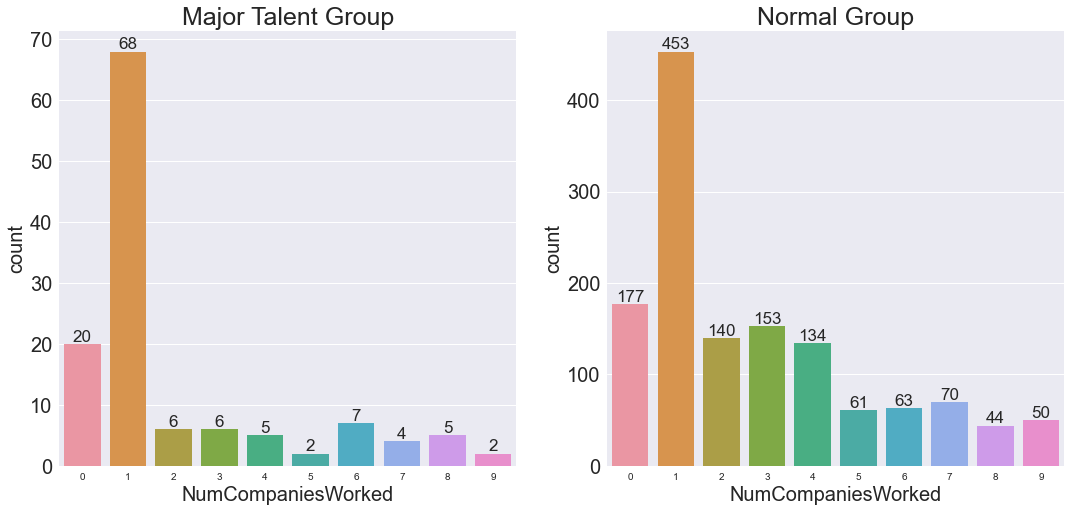

In [223]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=data_talent, x='NumCompaniesWorked', ax=ax[0])
ax[0].set_title('Major Talent Group')

sns.countplot(data=data_normal, x='NumCompaniesWorked', ax=ax[1])
ax[1].set_title('Normal Group')

for a in ax:
    for p in a.patches:
        a.annotate(format(p.get_height(),".0f"), (p.get_x()+p.get_width()/2.0, p.get_height()),
                   ha='center', va='center', size=17, xytext=(0,7), textcoords='offset points')

plt.show()

In [224]:
pd.crosstab(data_talent.Attrition,data_talent.NumCompaniesWorked, margins=True).style.background_gradient(cmap='summer_r')

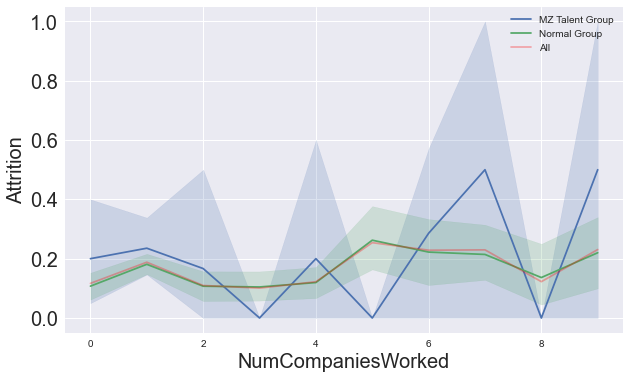

In [225]:
plt.figure(figsize=(10,6))
sns.lineplot('NumCompaniesWorked', 'Attrition', data=data_talent)
sns.lineplot('NumCompaniesWorked', 'Attrition', data=data_normal)
sns.lineplot('NumCompaniesWorked', 'Attrition', data=data.groupby('NumCompaniesWorked').mean(), color='r', alpha=0.3)
plt.legend(['MZ Talent Group', 'Normal Group','All'])
plt.show()

**전에 다닌 회사 수가 6,7,9일 때 퇴사율이 올라가기는 하지만 인원 수가 너무 적음** -단정하기 위험함

In [226]:
data_talent.groupby(['Attrition', 'Gender', 'NumCompaniesWorked'])[['NumCompaniesWorked']].count()

NumCompaniesWorked
Attrition Gender NumCompaniesWorked                    
0.0       Female 0                                    5
                 1                                   24
                 2                                    3
                 4                                    3
                 5                                    1
                 6                                    2
                 7                                    1
                 8                                    2
          Male   0                                   11
                 1                                   28
                 2                                    2
                 3                                    6
                 4                                    1
                 5                                    1
                 6                                    3
                 7                                    1
                 8                                    3
                 9                                    1
1.0       Female 0                                    2
                 1                                    6
                 2                                    1
                 6                                    2
                 7                                    2
          Male   0                                    2
                 1                                   10
                 4                                    1
                 9                                    1

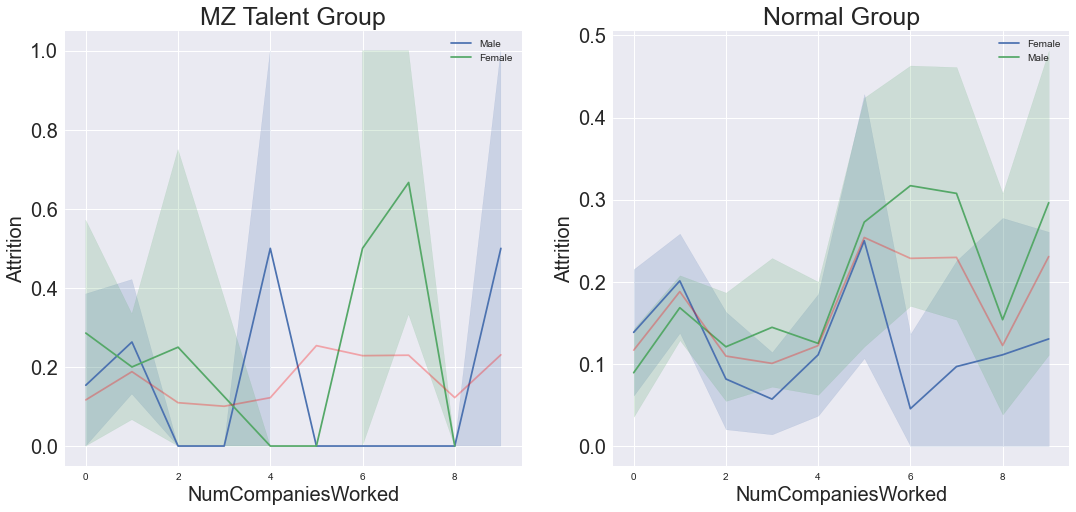

In [227]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.lineplot('NumCompaniesWorked', 'Attrition', data=data_talent, hue='Gender', ax=ax[0])
sns.lineplot('NumCompaniesWorked', 'Attrition', data=data.groupby('NumCompaniesWorked').mean(), color='r', alpha=0.3, ax=ax[0])
ax[0].legend()
ax[0].set_title('MZ Talent Group')

sns.lineplot('NumCompaniesWorked', 'Attrition', data=data_normal, hue='Gender', ax=ax[1])
sns.lineplot('NumCompaniesWorked', 'Attrition', data=data.groupby('NumCompaniesWorked').mean(), color='r', alpha=0.3, ax=ax[1])
ax[1].legend()
ax[1].set_title('Normal Group')

plt.show()

- 이것도 인원이 너무 적어져서 그닥..

### Department

                        Department
Research & Development          87
Sales                           35
Human Resources                  3
                        Attrition
Department                       
Human Resources          0.000000
Research & Development   0.229885
Sales                    0.200000


<AxesSubplot:ylabel='Attrition'>

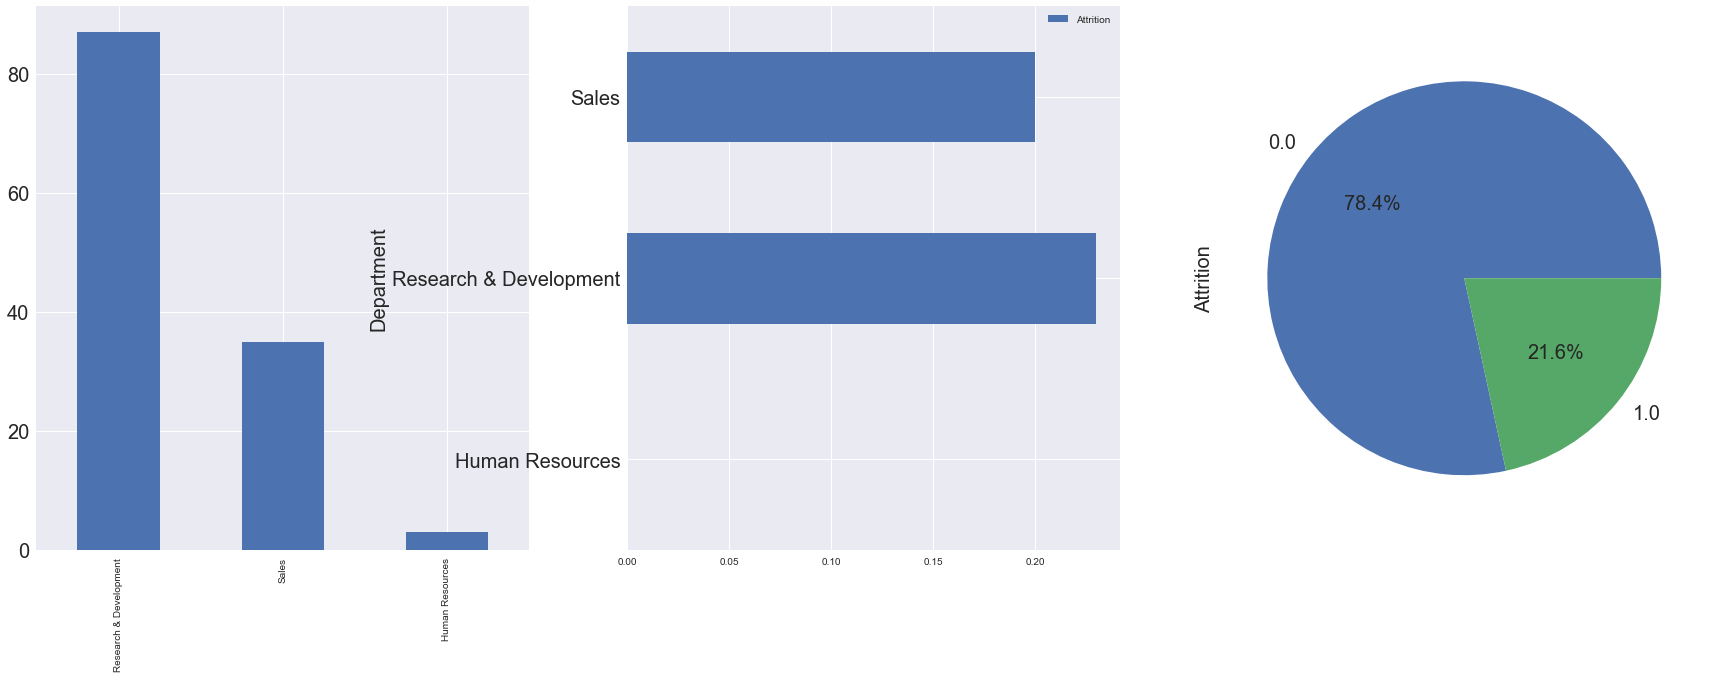

In [228]:
f,ax=plt.subplots(1,3,figsize=(30,10))



data_talent['Department'].value_counts().plot.bar(ax=ax[0])
print(data_talent['Department'].value_counts().to_frame())

data_talent[['Attrition','Department']].groupby(['Department']).mean().plot.barh(ax=ax[1])
print(data_talent[['Attrition','Department']].groupby(['Department']).mean())

data_talent['Attrition'].value_counts().plot.pie(autopct='%1.1f%%',
                                         ax=ax[2],
                                         fontsize=20)


1. 34세 이하, 임금상승률이 25% 이상에 속하는 인원은 총 125명이고 이중에서 R&D: 87, Sa;es:35, HR:3명이다. 
2. 이중 HR은 퇴사가 없었으며(인원이 매우 낮기에, 유용한 변별력 x), R&D 22.98%, Sales 20%였다. 이 두집단은 평균 퇴사율 보다 높게 나타났다.
3. 이들의 평균 퇴사율은 21.6%이다.

###  JobLevel

   JobLevel
1        67
2        45
3        12
4         1
                        JobLevel
Department                      
Human Resources         1.333333
Research & Development  1.482759
Sales                   1.828571


JobLevel
Department             JobLevel          
Human Resources        1                2
                       2                1
Research & Development 1               54
                       2               25
                       3                7
                       4                1
Sales                  2               19
                       1               11
                       3                5

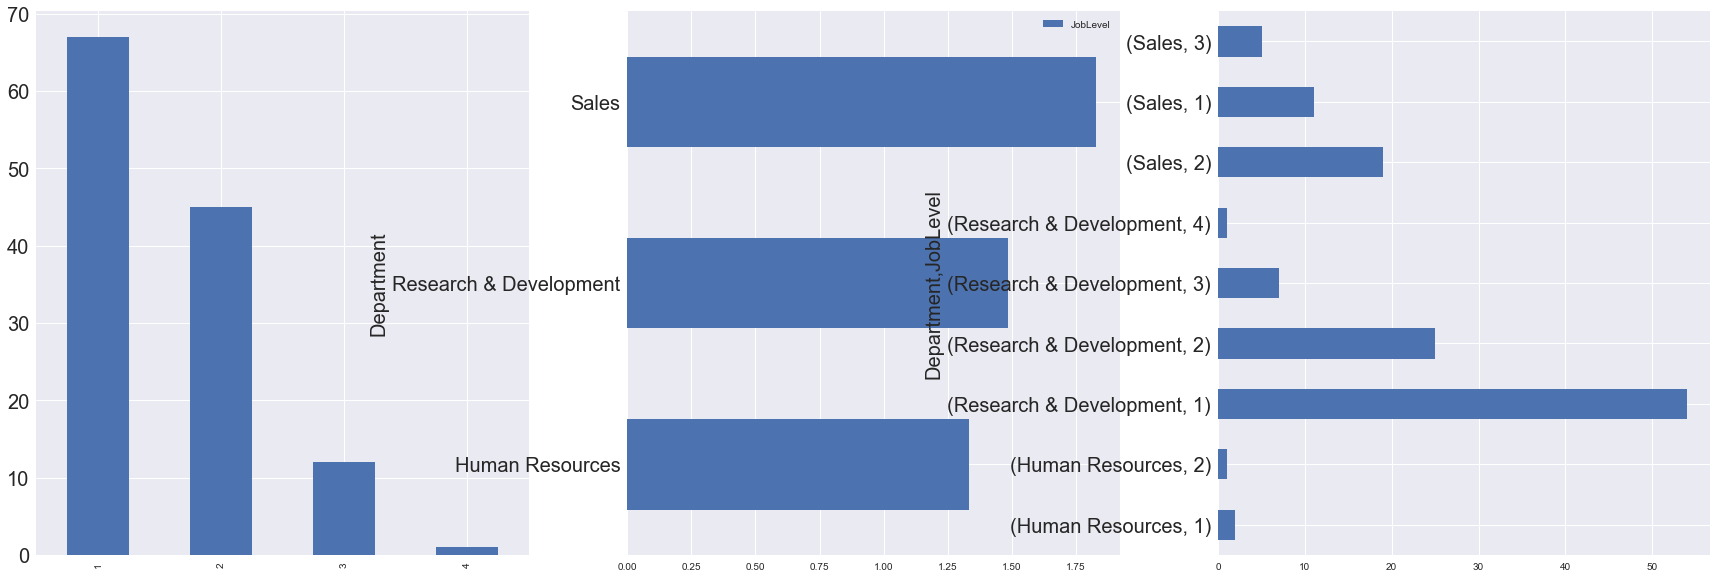

In [229]:
f,ax=plt.subplots(1,3,figsize=(30,10))



data_talent['JobLevel'].value_counts().plot.bar(ax=ax[0])
print(data_talent['JobLevel'].value_counts().to_frame())

data_talent[['JobLevel','Department']].groupby(['Department']).mean().plot.barh(ax=ax[1])
print(data_talent[['JobLevel','Department']].groupby(['Department']).mean())

data_talent.groupby(['Department'])['JobLevel'].value_counts().plot.barh(ax=ax[2])
data_talent.groupby(['Department'])['JobLevel'].value_counts().to_frame()
#sns.countflots("JobLevel", hue='Department', data=data_talent, ax=ax[2])

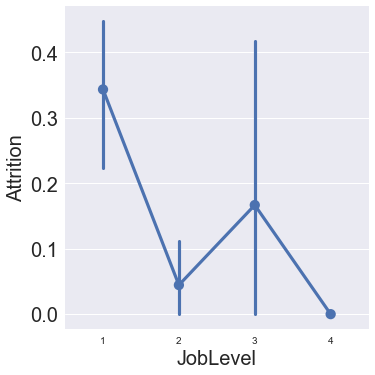

Attrition
JobLevel           
1          0.343284
2          0.044444
3          0.166667
4          0.000000

In [230]:
sns.factorplot('JobLevel', 'Attrition', data=data_talent)
plt.show() 

data_talent.groupby(['JobLevel'])['Attrition'].mean().to_frame()

1. JobLevel에서 1이 차지하는 비율이49.6%로 가장 많으며, 2는 36%, 3은 9.6% 4는 0.8%를 차지하고 있다.
2. 이중 R&D 에 속하는 1레벨의 인원이 62%로 가장 높았다 (HR은 표본이 작기에 제외)
3. 퇴사자 비율은 1레벨이 34%, 2레벨이 4.4%, 3레벨이 16.6% 4레벨은 0% 였다. R&D의 평균 job Level에 가장 낮기에 (HR 제외) 이들을 어떻게 퇴직하게 안할지 고민해야 할 필요가 있다.

### JobRole

In [231]:
data_talent.groupby(['JobRole','Department'])['Department'].count().to_frame()

Department
JobRole                   Department                        
Healthcare Representative Research & Development           8
Human Resources           Human Resources                  3
Laboratory Technician     Research & Development          21
Manager                   Research & Development           2
                          Sales                            1
Manufacturing Director    Research & Development          17
Research Director         Research & Development           2
Research Scientist        Research & Development          37
Sales Executive           Sales                           22
Sales Representative      Sales                           12

Research Scientist           37
Laboratory Technician        21
Manufacturing Director       17
Healthcare Representative     8
Manager                       2
Research Director             2
Name: JobRole, dtype: int64

Sales Executive         22
Sales Representative    12
Manager                  1
Name: JobRole, dtype: int64

Human Resources    3
Name: JobRole, dtype: int64



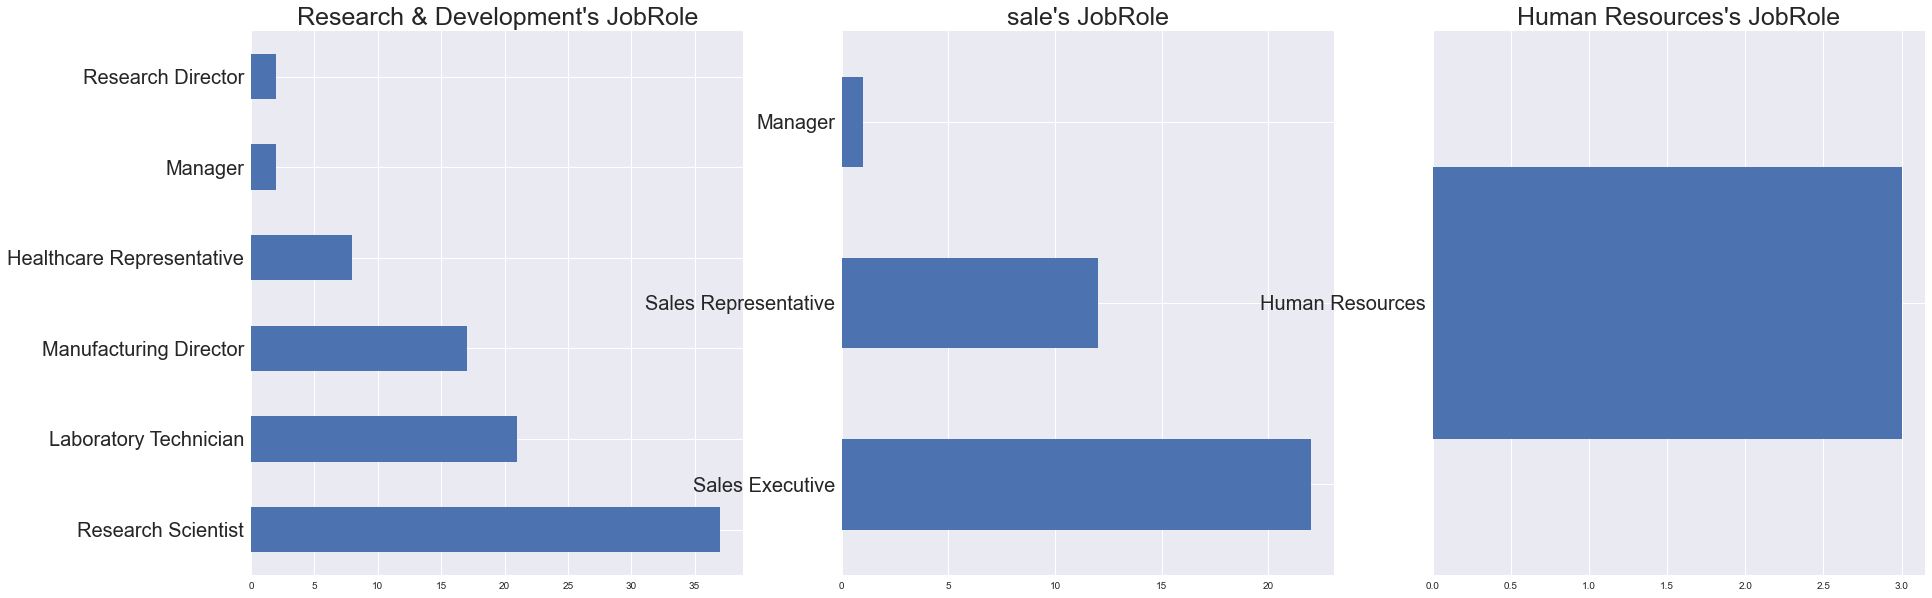

In [232]:
f, ax = plt.subplots(1,3,figsize=(30,10))

data_talent[data_talent['Department']=="Research & Development"]['JobRole'].value_counts().plot.barh(ax=ax[0])
ax[0].set_title("Research & Development's JobRole")

data_talent[data_talent['Department']=="Sales"]['JobRole'].value_counts().plot.barh(ax=ax[1])
ax[1].set_title("sale's JobRole")

data_talent[data_talent['Department']=="Human Resources"]['JobRole'].value_counts().plot.barh(ax=ax[2])
ax[2].set_title("Human Resources's JobRole")

print(data_talent[data_talent['Department']=="Research & Development"]['JobRole'].value_counts())
print("")
print(data_talent[data_talent['Department']=="Sales"]['JobRole'].value_counts())
print("")
print(data_talent[data_talent['Department']=="Human Resources"]['JobRole'].value_counts())
print("")

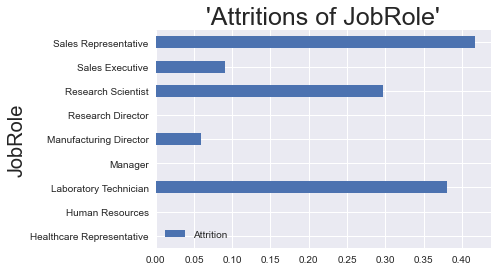

                           Attrition
JobRole                             
Healthcare Representative   0.000000
Human Resources             0.000000
Laboratory Technician       0.380952
Manager                     0.000000
Manufacturing Director      0.058824
Research Director           0.000000
Research Scientist          0.297297
Sales Executive             0.090909
Sales Representative        0.416667


In [233]:
data_talent[['Attrition','JobRole']].groupby(['JobRole']).mean().plot.barh() 
plt.title("'Attritions of JobRole'")
plt.yticks(size=10)
plt.show()

print(data_talent[['Attrition','JobRole']].groupby(['JobRole']).mean())

Sales= [Sales Executive(2,3,4) : 22, Sales Representative(1,2) : 12, Manager(3,4,5): 1 ]<br><br>
Research & Development = [Research Scientist(1,2,3) : 37, Laboratory Technician(1,2,3) : 21,<br>
                      Manufacturing Director(2,3,4) : 17 ,Healthcare Representative(2,3,4) : 8,<br>
                        Research Director(3,4,5) : 2, Manager(3,4,5) : 2 ]<br><br>
Human Resources = [Human Resources(1,2,3) : 3 ]<br>


 1. jobrole에서 joblevel 이 낮은 직업이 퇴사율이 높게 나타난다. 
 2. R&D에선 Joblevel 이 1,2,3인  Research Scientist(1,2,3), Laboratory Technician(1,2,3)이 각각 29.7%, 38%로 가장 높았다.
 3. Sales에서도 Sales Representative(1,2)중 41.6%가 퇴사하였다. 이는 12명 중 5명이 퇴사하였다고 할 수 있다.
 4. 낮은 직무 지위에 대한 보상 혹은 보안점을 만들어야 할 듯 하다. 

### BeforeWorkingYears ('TotalWorkingYears' -  'YearsAtCompany)

BeforeWorkingYears
0                   62
1                   26
2                   11
4                    8
3                    6
5                    6
6                    2
7                    1
10                   1
11                   1
12                   1

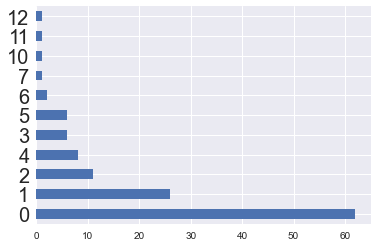

In [234]:
data_talent['BeforeWorkingYears'].value_counts().plot.barh()
plt.show
data_talent['BeforeWorkingYears'].value_counts().to_frame()

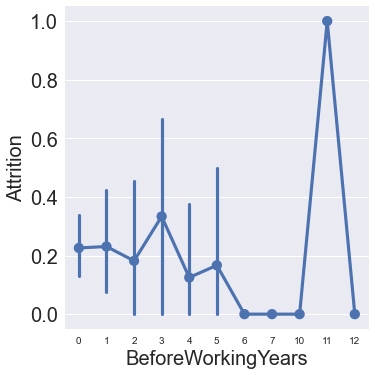

Attrition
BeforeWorkingYears           
0                    0.225806
1                    0.230769
2                    0.181818
3                    0.333333
4                    0.125000
5                    0.166667
6                    0.000000
7                    0.000000
10                   0.000000
11                   1.000000
12                   0.000000

In [235]:
sns.factorplot('BeforeWorkingYears', 'Attrition', data=data_talent)
plt.show() 

data_talent.groupby(['BeforeWorkingYears'])['Attrition'].mean().to_frame()

In [236]:
data_talent.groupby(['BeforeWorkingYears', 'JobRole'])['Attrition'].mean().to_frame()

Attrition
BeforeWorkingYears JobRole                             
0                  Healthcare Representative   0.000000
                   Human Resources             0.000000
                   Laboratory Technician       0.384615
                   Manager                     0.000000
                   Manufacturing Director      0.000000
                   Research Scientist          0.238095
                   Sales Executive             0.142857
                   Sales Representative        0.375000
1                  Healthcare Representative   0.000000
                   Human Resources             0.000000
                   Laboratory Technician       1.000000
                   Manufacturing Director      0.250000
                   Research Scientist          0.428571
                   Sales Executive             0.000000
                   Sales Representative        0.333333
2                  Healthcare Representative   0.000000
                   Laboratory Technician       0.000000
                   Manufacturing Director      0.000000
                   Research Director           0.000000
                   Research Scientist          0.500000
                   Sales Executive             0.000000
                   Sales Representative        1.000000
3                  Laboratory Technician       0.000000
                   Research Scientist          0.500000
                   Sales Executive             0.000000
4                  Laboratory Technician       1.000000
                   Manufacturing Director      0.000000
                   Research Director           0.000000
                   Research Scientist          0.000000
                   Sales Executive             0.000000
5                  Laboratory Technician       0.333333
                   Manager                     0.000000
                   Sales Executive             0.000000
6                  Manufacturing Director      0.000000
                   Sales Executive             0.000000
7                  Manufacturing Director      0.000000
10                 Sales Executive             0.000000
11                 Sales Executive             1.000000
12                 Manufacturing Director      0.000000

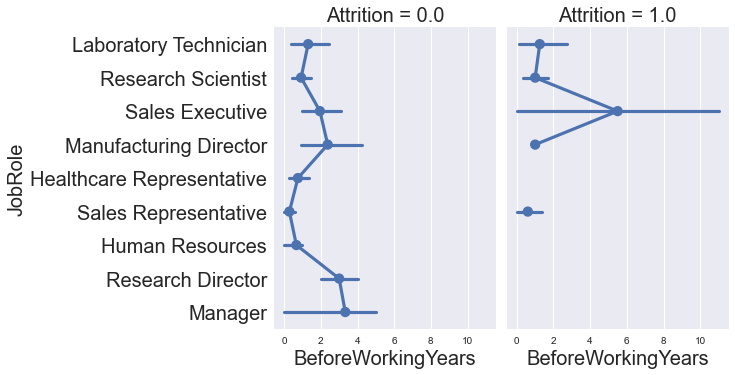

In [237]:
sns.factorplot('BeforeWorkingYears', 'JobRole', col='Attrition', data=data_talent)
plt.show()

1. salesExecutive는 전체1명에서 1명이 퇴사하였기에 이상치로 제외
2. 대부분의 퇴사자의 비율은 전 회사에서 근무한 횟수가 0~3년 이하인 경우에 해당. 
3. 이들의 직업은 대부분  Research Scientist(1,2,3), Laboratory Technician(1,2,3), Sales Representative(1,2)에 해당한다.

### YearsAtCompany

In [238]:
data_talent['YearsAtCompany'].value_counts().to_frame()

YearsAtCompany
1               20
5               17
2               13
3               12
6               11
9                9
10               9
0                7
7                6
8                6
11               6
4                4
13               3
12               1
14               1

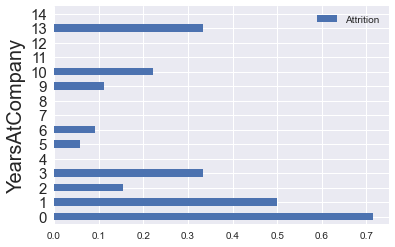

                Attrition
YearsAtCompany           
0                0.714286
1                0.500000
2                0.153846
3                0.333333
4                0.000000
5                0.058824
6                0.090909
7                0.000000
8                0.000000
9                0.111111
10               0.222222
11               0.000000
12               0.000000
13               0.333333
14               0.000000


In [239]:
data_talent[['Attrition','YearsAtCompany']].groupby(['YearsAtCompany']).mean().plot.barh() 
plt.yticks(size=15)
plt.show()
print(data_talent[['Attrition','YearsAtCompany']].groupby(['YearsAtCompany']).mean())

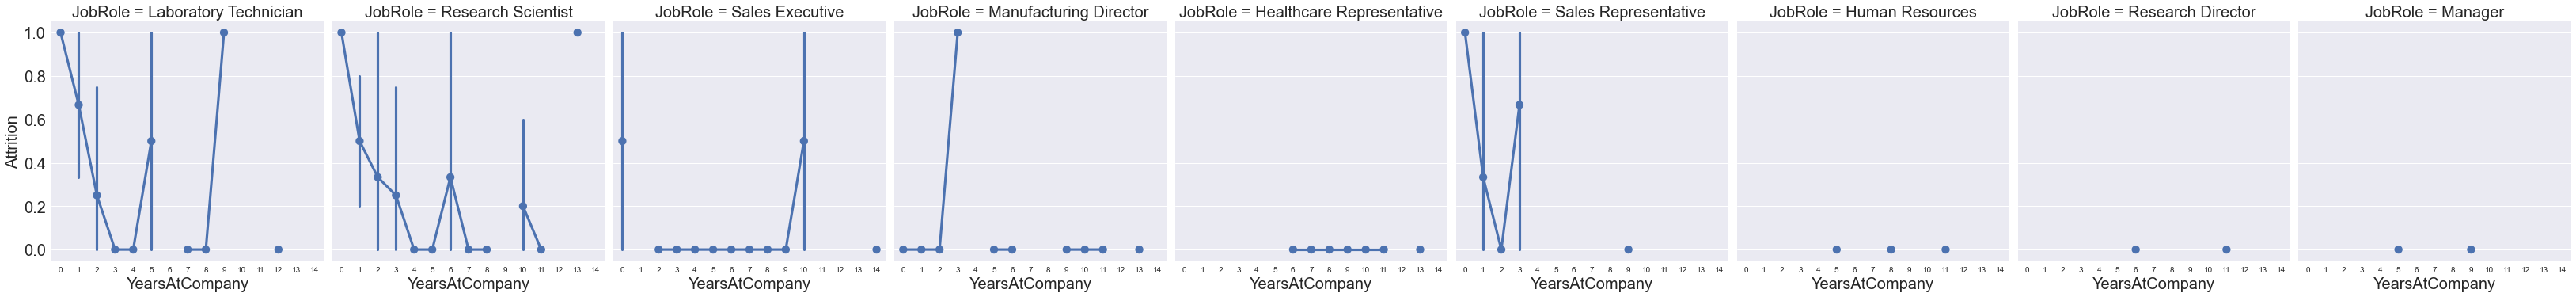

In [240]:
sns.factorplot('YearsAtCompany', 'Attrition', col='JobRole', data=data_talent)
plt.show()

In [241]:
data_talent['YearsAtCom']=1
data_talent.loc[data['YearsAtCompany'] <= 3, 'YearsAtCom'] = 1
data_talent.loc[(data['YearsAtCompany'] > 3) & (data['YearsAtCompany'] <= 6), 'YearsAtCom'] = 2
data_talent.loc[(data['YearsAtCompany'] > 6) & (data['YearsAtCompany'] <= 10), 'YearsAtCom'] = 3
data_talent.loc[data['YearsAtCompany'] > 10, 'YearsAtCompany'] = 4
data_talent['YearsAtCom']

7       1
26      3
39      2
44      1
54      1
       ..
1431    1
1433    2
1438    1
1463    3
1467    2
Name: YearsAtCom, Length: 125, dtype: int64

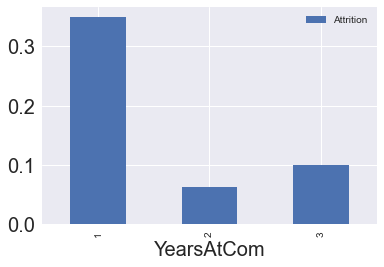

            Attrition
YearsAtCom           
1            0.349206
2            0.062500
3            0.100000


In [242]:
data_talent[["Attrition",'YearsAtCom']].groupby(['YearsAtCom']).mean().plot.bar()
plt.show()
print(data_talent[["Attrition",'YearsAtCom']].groupby(['YearsAtCom']).mean())

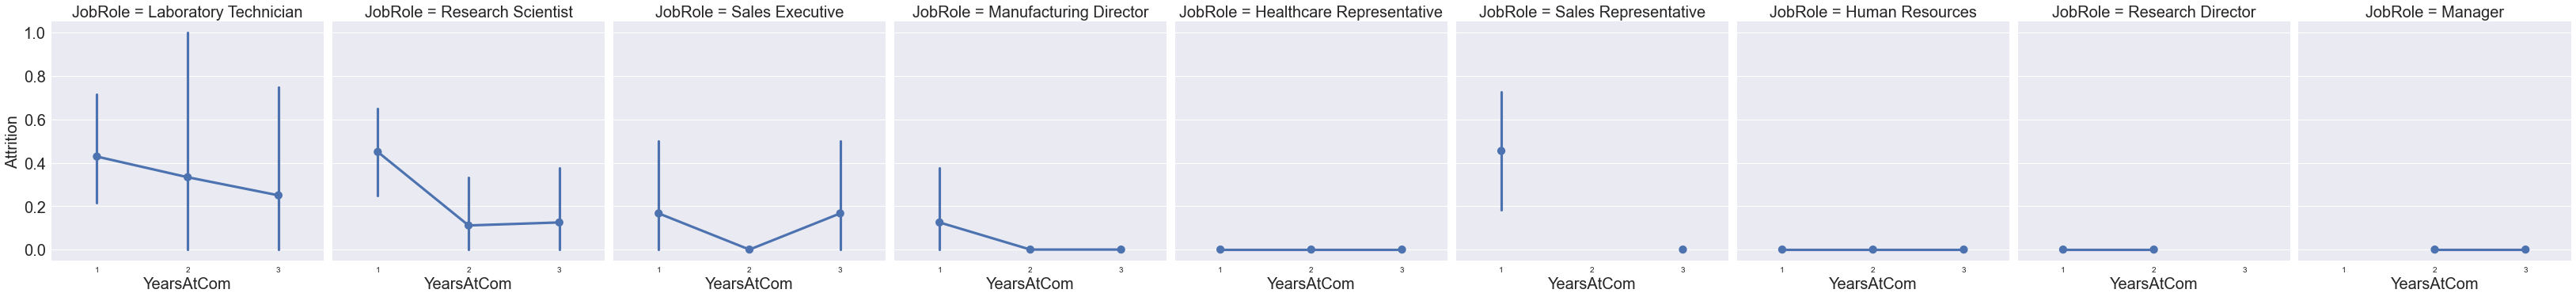

In [243]:
sns.factorplot('YearsAtCom', 'Attrition', col='JobRole', data=data_talent)
plt.show()

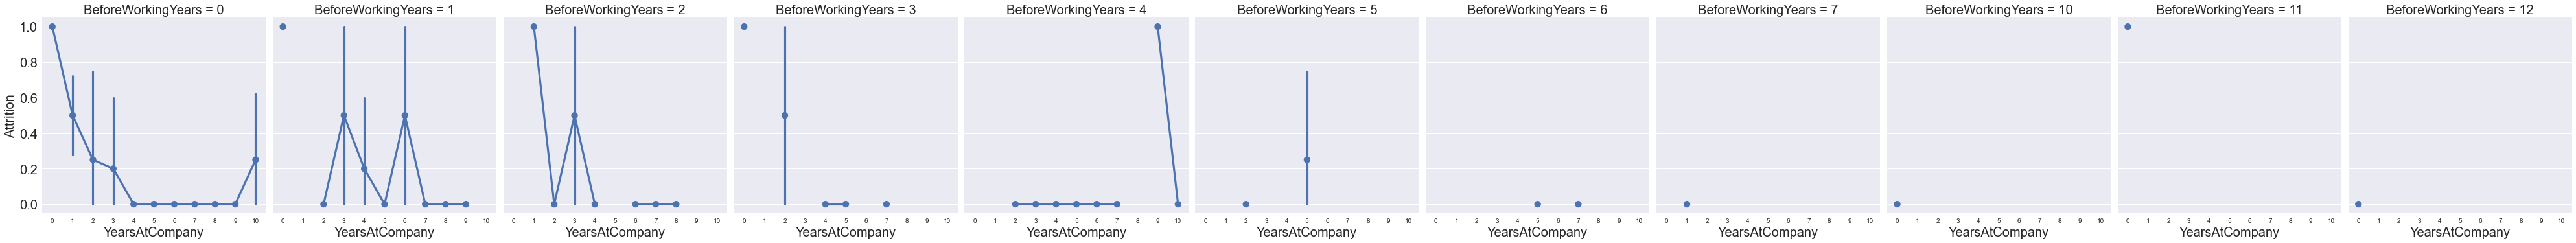

In [244]:
sns.factorplot('YearsAtCompany', 'Attrition', col='BeforeWorkingYears', data=data_talent)
plt.show()

1. 1의 집단은 34%, 2의 집단은 6%, 3의 집단은 10%로 나누어진다.
2. 대부분의 직업에서 직업레벨 1,2,3의 집단의 퇴사율이 가장 높았다. 그리고 이들중 현재 회사 연차가 짧을수록 퇴사 비율이 높았다. 
3. 이러한 분포는 지난 회사의 근무 시간과 매우 유사하다. 지난회사의 근무가 0~3일때 현재 회사의 퇴사가 이루어진다. 

### EnvironmentSatisfaction

<AxesSubplot:xlabel='Attrition', ylabel='EnvironmentSatisfaction'>

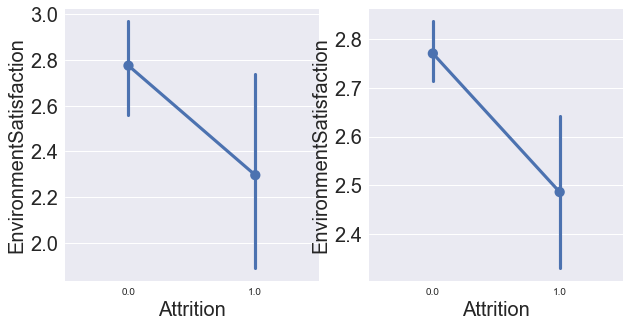

In [245]:
f, ax = plt.subplots(1,2, figsize=(10,5))

sns.pointplot('Attrition','EnvironmentSatisfaction',data=data_talent,ax=ax[0])
sns.pointplot('Attrition','EnvironmentSatisfaction',data=data_normal,ax=ax[1])

<AxesSubplot:xlabel='Attrition', ylabel='EnvironmentSatisfaction'>

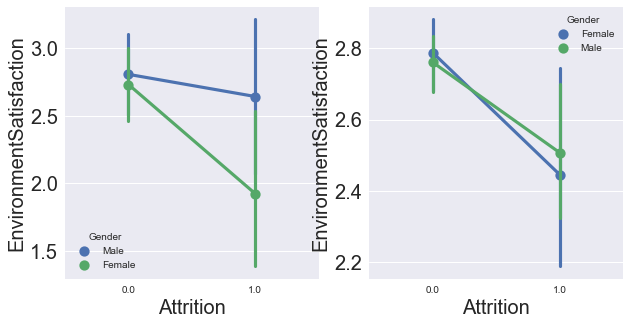

In [246]:
f, ax = plt.subplots(1,2, figsize=(10,5))

sns.pointplot('Attrition','EnvironmentSatisfaction',data=data_talent, hue='Gender',ax=ax[0])
sns.pointplot('Attrition','EnvironmentSatisfaction',data=data_normal, hue='Gender',ax=ax[1])

- mz핵심인재 특히 남자핵심인재들은 environment satisfaction과 퇴사율과 적은 상관관계를 보인다.
- 환경 만족도는 mz핵심인재 중에서도 여자에게 더 신경쓰면 좋을 듯

### JobSatisfaction

<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

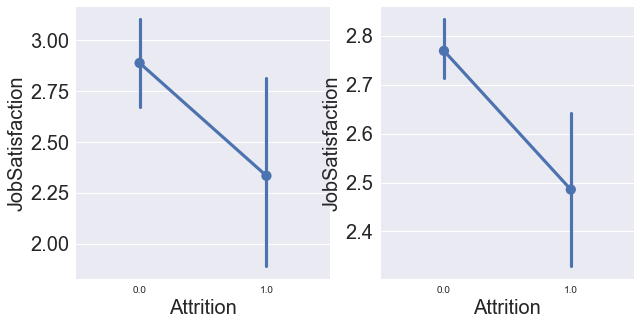

In [247]:
f, ax = plt.subplots(1,2, figsize=(10,5))

sns.pointplot('Attrition','JobSatisfaction',data=data_talent,ax=ax[0])
sns.pointplot('Attrition','JobSatisfaction',data=data_normal,ax=ax[1])

<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

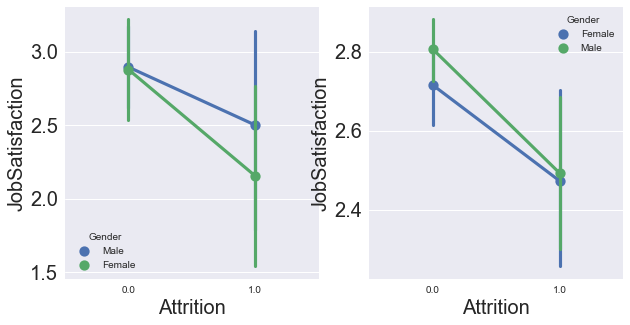

In [248]:
f, ax = plt.subplots(1,2, figsize=(10,5))

sns.pointplot('Attrition','JobSatisfaction',data=data_talent,hue='Gender',ax=ax[0])
sns.pointplot('Attrition','JobSatisfaction',data=data_normal,hue='Gender',ax=ax[1])

In [249]:
print('핵심인재 퇴사자: ',data_talent[data_talent['Attrition']==1]['JobSatisfaction'].mean())
print('핵심인재 재직자: ',data_talent[data_talent['Attrition']==0]['JobSatisfaction'].mean()) #0.55
print('no핵심인재 퇴사자: ',data_normal[data_normal['Attrition']==1]['JobSatisfaction'].mean())
print('no핵심인재 재직자: ',data_normal[data_normal['Attrition']==0]['JobSatisfaction'].mean()) #0.28

핵심인재 퇴사자:  2.3333333333333335
핵심인재 재직자:  2.8877551020408165
no핵심인재 퇴사자:  2.4857142857142858
no핵심인재 재직자:  2.7691629955947135


In [250]:
print("핵심인재 직무만족도 평균: ", data_talent['JobSatisfaction'].mean())
print("핵심인재 직무만족도 평균: ", data_normal['JobSatisfaction'].mean())

핵심인재 직무만족도 평균:  2.768
핵심인재 직무만족도 평균:  2.724907063197026


- job satisfaction 과 attrition은 유의미한 상관관계를 나타내고 있는데,\
핵심인재의 퇴사자와 재직자의 직무만족도 차이는 아닌 그룹보다 훨씬 크다. 0.55 vs 0.28
- 핵심인재가 느끼는 직무만족도의 갭을 줄여줄 필요가 있다..있을까요ㅎㅎ

### RelationshipSatisfaction

<AxesSubplot:xlabel='Attrition', ylabel='RelationshipSatisfaction'>

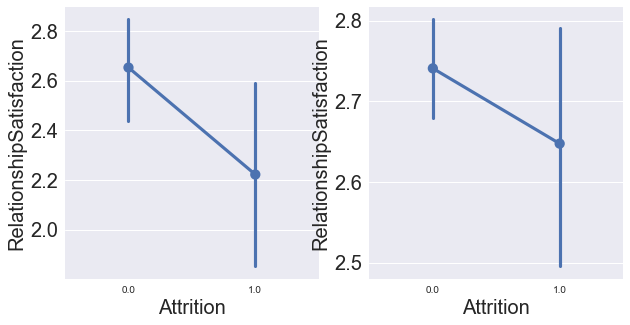

In [251]:
f, ax = plt.subplots(1,2, figsize=(10,5))

sns.pointplot('Attrition','RelationshipSatisfaction',data=data_talent,ax=ax[0])
sns.pointplot('Attrition','RelationshipSatisfaction',data=data_normal,ax=ax[1])

<AxesSubplot:xlabel='Attrition', ylabel='RelationshipSatisfaction'>

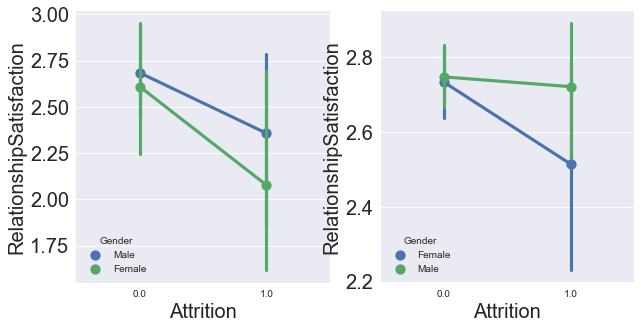

In [252]:
f, ax = plt.subplots(1,2, figsize=(10,5))

sns.pointplot('Attrition','RelationshipSatisfaction',data=data_talent,hue='Gender',ax=ax[0])
sns.pointplot('Attrition','RelationshipSatisfaction',data=data_normal,hue='Gender',ax=ax[1])

- 전체를 봤을 때, RelationshipSatisfaction이 높으면 퇴사를 덜하는 것 같긴 하지만,\
RelationshipSatisfaction이 낮다고 해서 퇴사를 덜하는 것은 아닌 것 같다 는 기존 결과가 있었음.
- 그나마 핵심인재들은 그외그룹보단 둘의 상관관계가 좀보이긴함.

### WorkLifeBalance

<AxesSubplot:xlabel='Attrition', ylabel='WorkLifeBalance'>

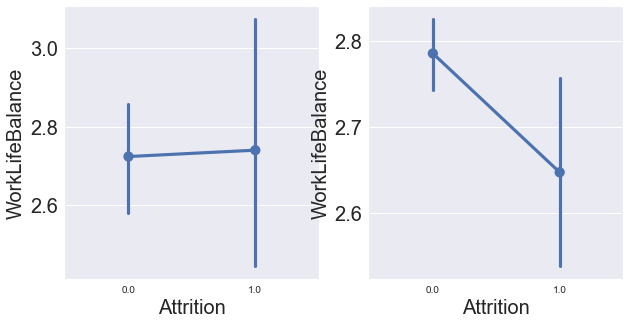

In [253]:
f, ax = plt.subplots(1,2, figsize=(10,5))

sns.pointplot('Attrition','WorkLifeBalance',data=data_talent,ax=ax[0])
sns.pointplot('Attrition','WorkLifeBalance',data=data_normal,ax=ax[1])

<AxesSubplot:xlabel='Attrition', ylabel='WorkLifeBalance'>

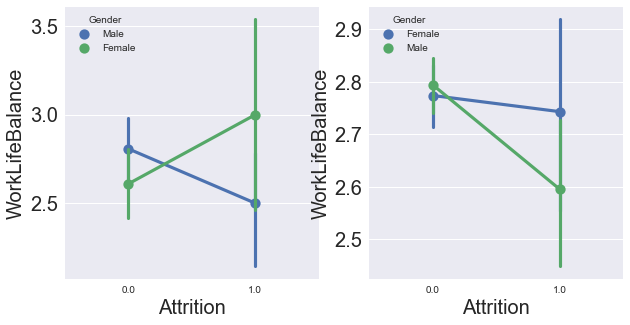

In [254]:
f, ax = plt.subplots(1,2, figsize=(10,5))

sns.pointplot('Attrition','WorkLifeBalance',data=data_talent,hue='Gender',ax=ax[0])
sns.pointplot('Attrition','WorkLifeBalance',data=data_normal,hue='Gender',ax=ax[1])

- 퇴사와 워라밸 만족도는 상관관계가 유의미하지 않다.
- mz핵심인재보다 오히려 그외그룹이 워라밸-퇴사 상관관계가  있다고 볼 수 있다.
>즉, mz핵심인재는 워라밸은 크게 신경쓰지 않는다. 다른거 돈, 효율성 등을 더 중요시여긴다블라블라~~

## MZ Future Key의 퇴사를 막을 수 있는 요인

### StockOptionLevel과 이직

MZ퇴직자들 평균 스톡옵션 : 0.4444
MZ재직자들 평균 스톡옵션 : 0.8673
not MZ퇴직자들 평균 스톡옵션 : 0.5381
not MZ재직자들 평균 스톡옵션 : 0.8432


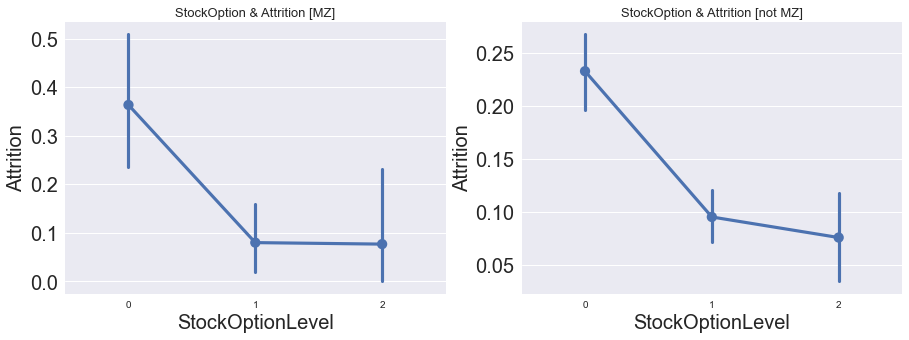

In [297]:
f, ax = plt.subplots(1,2, figsize=(15,5))

data_talent_s = data_talent[data_talent['StockOptionLevel']!=3]
data_normal_s = data_normal[data_normal['StockOptionLevel']!=3]

sns.pointplot('StockOptionLevel','Attrition',data=data_talent_s,ax=ax[0])
sns.pointplot('StockOptionLevel','Attrition',data=data_normal_s,ax=ax[1])

ax[0].set_title("StockOption & Attrition [MZ]",fontsize=13)

ax[1].set_title("StockOption & Attrition [not MZ]",fontsize=13)

print("MZ퇴직자들 평균 스톡옵션 :",round(data_talent[data_talent['Attrition']==1]['StockOptionLevel'].mean(),4))
print("MZ재직자들 평균 스톡옵션 :",round(data_talent[data_talent['Attrition']==0]['StockOptionLevel'].mean(),4))
print("not MZ퇴직자들 평균 스톡옵션 :",round(data_normal[data_normal['Attrition']==1]['StockOptionLevel'].mean(),4))
print("not MZ재직자들 평균 스톡옵션 :",round(data_normal[data_normal['Attrition']==0]['StockOptionLevel'].mean(),4))

- 핵심인재 그룹에서는 퇴사 vs 안퇴사 간의 Stockoptionlevel mean 차이가 0.44
- 아닌 그룹에서는 mean 차이가 0.29
- 임금인상률이 높은 그룹에서 Stockoptionlevel 을 이직 이유로 더 고려함을 알 수 있다. 

### HomeDistance와 이직

MZ퇴직자들 평균 HomeDistance : 2.8148
MZ재직자들 평균 HomeDistance : 2.398
not MZ퇴직자들 평균 HomeDistance : 2.6143
not MZ재직자들 평균 HomeDistance: 2.3885


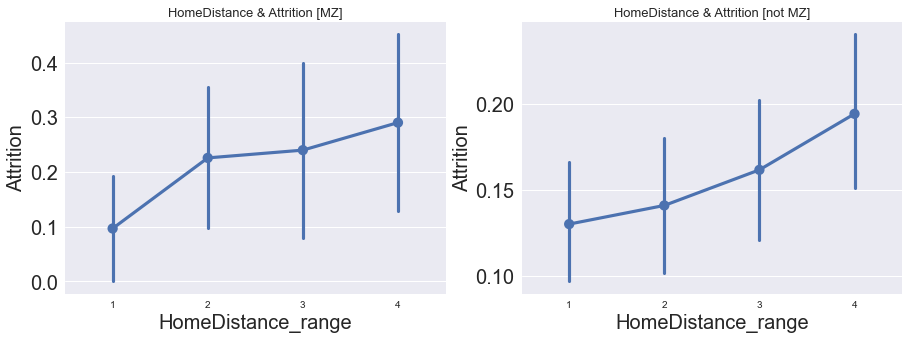

In [300]:
f, ax = plt.subplots(1,2, figsize=(15,5))

sns.pointplot('HomeDistance_range','Attrition',data=data_talent_s,ax=ax[0])
sns.pointplot('HomeDistance_range','Attrition',data=data_normal_s,ax=ax[1])

ax[0].set_title("HomeDistance & Attrition [MZ]",fontsize=13)

ax[1].set_title("HomeDistance & Attrition [not MZ]",fontsize=13)

print("MZ퇴직자들 평균 HomeDistance :",round(data_talent[data_talent['Attrition']==1]['HomeDistance_range'].mean(),4))
print("MZ재직자들 평균 HomeDistance :",round(data_talent[data_talent['Attrition']==0]['HomeDistance_range'].mean(),4))
print("not MZ퇴직자들 평균 HomeDistance :",round(data_normal[data_normal['Attrition']==1]['HomeDistance_range'].mean(),4))
print("not MZ재직자들 평균 HomeDistance:",round(data_normal[data_normal['Attrition']==0]['HomeDistance_range'].mean(),4))



- 핵심인재 그룹에서는 퇴사 vs 안퇴사 간의 HomeDistance mean 차이가 0.42
- 아닌 그룹에서는 mean 차이가 0.23
- 핵심인재 그룹에서 HomeDistance mean을 이직 이유로 더 고려함을 알 수 있다. 

### Monthly income range과 이직

MZ퇴직자들 평균 Income : 1.4074
MZ재직자들 평균 Income : 2.2347
not MZ퇴직자들 평균 Income : 2.1095
not MZ재직자들 평균 Income : 2.6203


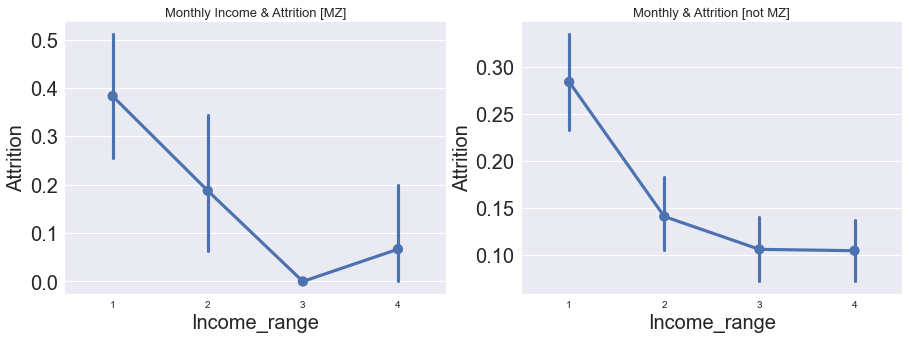

In [299]:
f, ax = plt.subplots(1,2, figsize=(15,5))

sns.pointplot('Income_range','Attrition',data=data_talent_s,ax=ax[0])
sns.pointplot('Income_range','Attrition',data=data_normal_s,ax=ax[1])

ax[0].set_title("Monthly Income & Attrition [MZ]",fontsize=13)

ax[1].set_title("Monthly & Attrition [not MZ]",fontsize=13)

print("MZ퇴직자들 평균 Income :",round(data_talent[data_talent['Attrition']==1]['Income_range'].mean(),4))
print("MZ재직자들 평균 Income :",round(data_talent[data_talent['Attrition']==0]['Income_range'].mean(),4))
print("not MZ퇴직자들 평균 Income :",round(data_normal[data_normal['Attrition']==1]['Income_range'].mean(),4))
print("not MZ재직자들 평균 Income :",round(data_normal[data_normal['Attrition']==0]['Income_range'].mean(),4))


- 핵심인재 그룹에서는 퇴사 vs 안퇴사 간의 income mean 차이가 0.83
- 아닌 그룹에서는 income 차이가 0.52
- 핵심인재 그룹에서 income을 이직 이유로 더 고려함을 알 수 있다. 

### BusinessTravel과 이직 

In [261]:
data_talent["BusinessTravel"].replace("Travel_Frequently", 2, inplace=True)
data_talent["BusinessTravel"].replace("Travel_Rarely", 1, inplace=True)
data_talent["BusinessTravel"].replace("Non-Travel", 0, inplace=True)

data_normal["BusinessTravel"].replace("Travel_Frequently", 2, inplace=True)
data_normal["BusinessTravel"].replace("Travel_Rarely", 1, inplace=True)
data_normal["BusinessTravel"].replace("Non-Travel", 0, inplace=True)

MZ퇴직자들 평균 Income : 1.2222
MZ재직자들 평균 Income : 1.0918
not MZ퇴직자들 평균 Income : 1.2429
not MZ재직자들 평균 Income : 1.0537


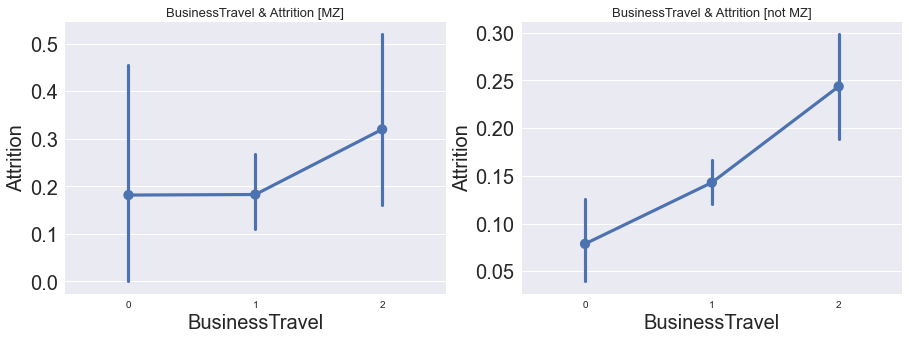

In [304]:
f, ax = plt.subplots(1,2, figsize=(15,5))

sns.pointplot('BusinessTravel','Attrition',data=data_talent_s,ax=ax[0])
sns.pointplot('BusinessTravel','Attrition',data=data_normal_s,ax=ax[1])

ax[0].set_title("BusinessTravel & Attrition [MZ]",fontsize=13)

ax[1].set_title("BusinessTravel & Attrition [not MZ]",fontsize=13)

print("MZ퇴직자들 평균 Income :",round(data_talent[data_talent['Attrition']==1]['BusinessTravel'].mean(),4))
print("MZ재직자들 평균 Income :",round(data_talent[data_talent['Attrition']==0]['BusinessTravel'].mean(),4))
print("not MZ퇴직자들 평균 Income :",round(data_normal[data_normal['Attrition']==1]['BusinessTravel'].mean(),4))
print("not MZ재직자들 평균 Income :",round(data_normal[data_normal['Attrition']==0]['BusinessTravel'].mean(),4))


### WorkLifeBalance와 이직 

MZ퇴직자들 평균 Income : 2.7407
MZ재직자들 평균 Income : 2.7245
not MZ퇴직자들 평균 Income : 2.6476
not MZ재직자들 평균 Income : 2.7859


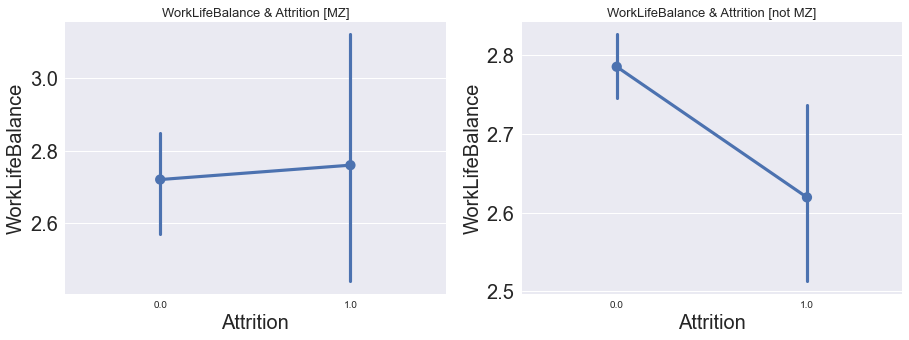

In [307]:
f, ax = plt.subplots(1,2, figsize=(15,5))

sns.pointplot('Attrition','WorkLifeBalance', data=data_talent_s,ax=ax[0])
sns.pointplot('Attrition','WorkLifeBalance', data=data_normal_s,ax=ax[1])

ax[0].set_title("WorkLifeBalance & Attrition [MZ]",fontsize=13)

ax[1].set_title("WorkLifeBalance & Attrition [not MZ]",fontsize=13)

print("MZ퇴직자들 평균 Income :",round(data_talent[data_talent['Attrition']==1]['WorkLifeBalance'].mean(),4))
print("MZ재직자들 평균 Income :",round(data_talent[data_talent['Attrition']==0]['WorkLifeBalance'].mean(),4))
print("not MZ퇴직자들 평균 Income :",round(data_normal[data_normal['Attrition']==1]['WorkLifeBalance'].mean(),4))
print("not MZ재직자들 평균 Income :",round(data_normal[data_normal['Attrition']==0]['WorkLifeBalance'].mean(),4))


- 애초에 이직한 사람과 이직하지 않은 사람간의 워라밸 차이가 적다
- 그러나 핵심인재 그룹에서는 거의 아무런 차이를 보이지 않는다
- 핵심인재그룹은 워라밸을 거의 신경쓰지 않는다고 해석 가능하다 

### OverTime과 이직 

In [266]:
data_talent["OverTime"].replace("Yes", 1, inplace=True)
data_talent["OverTime"].replace("No", 0, inplace=True)

data_normal["OverTime"].replace("Yes", 1, inplace=True)
data_normal["OverTime"].replace("No", 0, inplace=True)

MZ퇴직자들 평균 Income : 0.5556
MZ재직자들 평균 Income : 0.1633
not MZ퇴직자들 평균 Income : 0.5333
not MZ재직자들 평균 Income : 0.2405


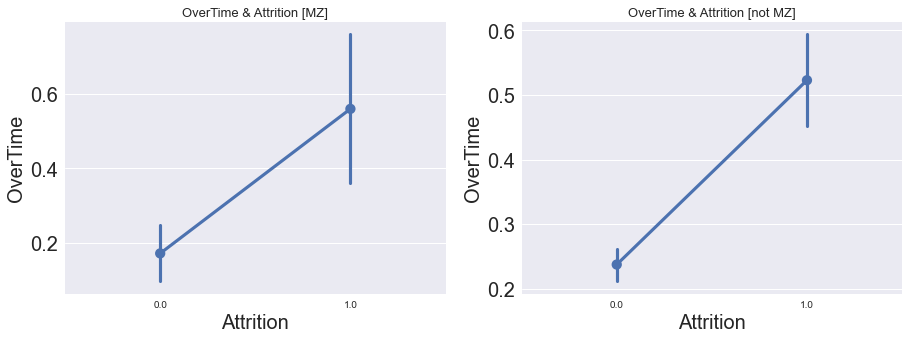

In [308]:
f, ax = plt.subplots(1,2, figsize=(15,5))

sns.pointplot('Attrition','OverTime', data=data_talent_s,ax=ax[0])
sns.pointplot('Attrition','OverTime', data=data_normal_s,ax=ax[1])

ax[0].set_title("OverTime & Attrition [MZ]",fontsize=13)

ax[1].set_title("OverTime & Attrition [not MZ]",fontsize=13)

print("MZ퇴직자들 평균 Income :",round(data_talent[data_talent['Attrition']==1]['OverTime'].mean(),4))
print("MZ재직자들 평균 Income :",round(data_talent[data_talent['Attrition']==0]['OverTime'].mean(),4))
print("not MZ퇴직자들 평균 Income :",round(data_normal[data_normal['Attrition']==1]['OverTime'].mean(),4))
print("not MZ재직자들 평균 Income :",round(data_normal[data_normal['Attrition']==0]['OverTime'].mean(),4))

- 두 그룹간의 유의미한 차이가 보이지 않는다.
- 핵심인재 그룹이나 일반 그룹이나 초과근무 많이 시키면 회사 나간다